In [37]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 200)
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


In [2]:
data_folder = "./data"

year = 2020
so_survey_results_2020 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2020 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2019
so_survey_results_2019 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2019 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2018
so_survey_results_2018 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2018 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2017
so_survey_results_2017 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2017 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"

# Getting a quick look at the 2017 data

In [3]:
df_2017 = pd.read_csv(so_survey_results_2017)
print(df_2017.shape)

(51392, 154)


In [4]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2017.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [6]:
df_2017.Country.value_counts()

United States               11455
India                        5197
United Kingdom               4395
Germany                      4143
Canada                       2233
                            ...  
Comoros                         1
Djibouti                        1
Guinea                          1
Falkland Islands                1
Northern Mariana Islands        1
Name: Country, Length: 201, dtype: int64

In [7]:
eastern_eu = ["Russian Federation", "Ukraine", "Poland", "Romania", "Czech Republic", "Hungary", 
              "Belarus", "Bulgaria", "Slovak Republic", "Moldavia", "Turkey", "Georgia", "Azerbaidjan", "Cyprus"]
northern_eu = ["United Kingdom", "Sweden", "Denmark", "Finland", "Norway", "Ireland", 
               "Lithuania", "Latvia", "Estonia", "Iceland"]
western_eu = ["Germany", "France", "Netherlands", "Belgium", "Austria", "Switzerland", "Luxembourg", "Monaco",
             "Lichtenstein"]
southern_eu = ["Italy", "Spain", "Greece", "Portugal", "Serbia", "Croatia", "Bosnia-Herzegovina",
              "Albania", "Macedonia", "Slovenia", "Montenegro", "Malta", "Andorra", "San Marino", "Vatican",
              "Vatican"]
europe_countries = eastern_eu + northern_eu + western_eu + southern_eu

df_2017_eu = df_2017[df_2017.Country.isin(europe_countries)]
print(df_2017_eu.shape)

(22892, 154)


In [8]:
df_2017_eu.Country.value_counts()

United Kingdom        4395
Germany               4143
France                1740
Poland                1290
Russian Federation     873
Spain                  864
Netherlands            855
Italy                  781
Sweden                 611
Switzerland            595
Romania                561
Austria                477
Czech Republic         411
Belgium                404
Turkey                 363
Ukraine                356
Ireland                345
Hungary                332
Slovenia               303
Denmark                300
Greece                 298
Finland                287
Portugal               271
Norway                 259
Bulgaria               258
Serbia                 228
Lithuania              176
Croatia                172
Slovak Republic        170
Latvia                  98
Belarus                 91
Estonia                 90
Albania                 76
Bosnia-Herzegovina      66
Moldavia                65
Macedonia               56
Georgia                 46
M

In [9]:
df_2017_non_eu = df_2017[~df_2017.Country.isin(europe_countries)]
print(df_2017_non_eu.shape)

(28500, 154)


In [10]:
df_2017_non_eu.Country.value_counts()

United States                     11455
India                              5197
Canada                             2233
Australia                           913
Brazil                              777
Israel                              575
Iran                                507
Pakistan                            454
South Africa                        380
Mexico                              351
Philippines                         328
Indonesia                           289
Argentina                           255
New Zealand                         252
Japan                               248
China                               239
Malaysia                            192
Bangladesh                          184
Singapore                           177
Nigeria                             171
Sri Lanka                           170
South Korea                         164
Colombia                            149
I prefer not to say                 140
Egypt                               134


## Check schema for data in 2017

In [13]:
df_2017_schema = pd.read_csv(so_survey_schema_2017)
df_2017_schema.shape

(154, 2)

In [14]:
df_2017_schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [15]:
df_2017.dtypes

Respondent                            int64
Professional                         object
ProgramHobby                         object
Country                              object
University                           object
EmploymentStatus                     object
FormalEducation                      object
MajorUndergrad                       object
HomeRemote                           object
CompanySize                          object
CompanyType                          object
YearsProgram                         object
YearsCodedJob                        object
YearsCodedJobPast                    object
DeveloperType                        object
WebDeveloperType                     object
MobileDeveloperType                  object
NonDeveloperType                     object
CareerSatisfaction                  float64
JobSatisfaction                     float64
ExCoderReturn                        object
ExCoderNotForMe                      object
ExCoderBalance                  

In [16]:
df_2017['Year'] = 2017

# Process categorical data

In [38]:
def proces_multiple_tags_cat_col(df, column_name):
    cat_vals_count = df[column_name].value_counts().reset_index()
    cat_vals_count.rename(columns={'index': 'catval', column_name: 'count'}, inplace=True)
    df_exploded = pd.concat([pd.Series(row['count'], row['catval'].split(';')) for _, row in cat_vals_count.iterrows()]).reset_index()
    df_exploded.rename(columns={"index": "catval", 0: "count"}, inplace=True)
    
    # remove extra spaces from categorical values
    df_exploded['catval'] = df_exploded['catval'].apply(lambda x: x.strip())
    return df_exploded

def process_and_plot_multiple_tags_cat_col(df, column_name, plot_title=None, missing_method="dropna", plot=True):
    null_entries = len(df[df[column_name].isnull()])
    print(f"null entries for {column_name}: {null_entries}")
    if null_entries > 0.0:
        # we can drop or add missing values at this point
        if missing_method == "fill_mode":
            col_mode = df[column_name].mode()[0]
            print(f"replacing nulls with mode(most often value) of the column: {col_mode}")
            df[column_name].fillna(col_mode, inplace=True)
        elif missing_method == "dropna":
            print(f"droping nulls of the column: {column_name}")
            df.dropna(subset=[column_name], axis=0, inplace=True)
        null_entries = len(df[df[column_name].isnull()])
        print(f"updated null entries for {column_name}: {null_entries}")
    df_exploded = proces_multiple_tags_cat_col(df, column_name)
    
    df_exploded_grouped = df_exploded.groupby(['catval']).sum().sort_values(["count"], ascending=False).rename(columns={"count" : "total_catvals"}).reset_index()
    print(df_exploded_grouped)
    # plot proportion of cat vals types from total of respondents to the survey
    total_values = df.shape[0] - (null_entries if missing_method=="dropna" else 0)
    if plot:
        ax = (df_exploded_grouped["total_catvals"]/total_values).plot(kind="bar")
        plt.title(plot_title)
        ax.set_xticklabels(df_exploded_grouped["catval"])
        plt.show()
    return df_exploded_grouped, total_values

null entries for DeveloperType: 0
                                               catval  total_catvals
0                                       Web developer           5388
1                      Desktop applications developer           2013
2                                    Mobile developer           1993
3                              Database administrator           1206
4                                   DevOps specialist            932
5                               Systems administrator            891
6   Developer with a statistics or mathematics bac...            802
7                                      Data scientist            603
8             Embedded applications/devices developer            518
9                                               Other            412
10                                   Graphic designer            310
11                        Machine learning specialist            300
12                               Graphics programming            268


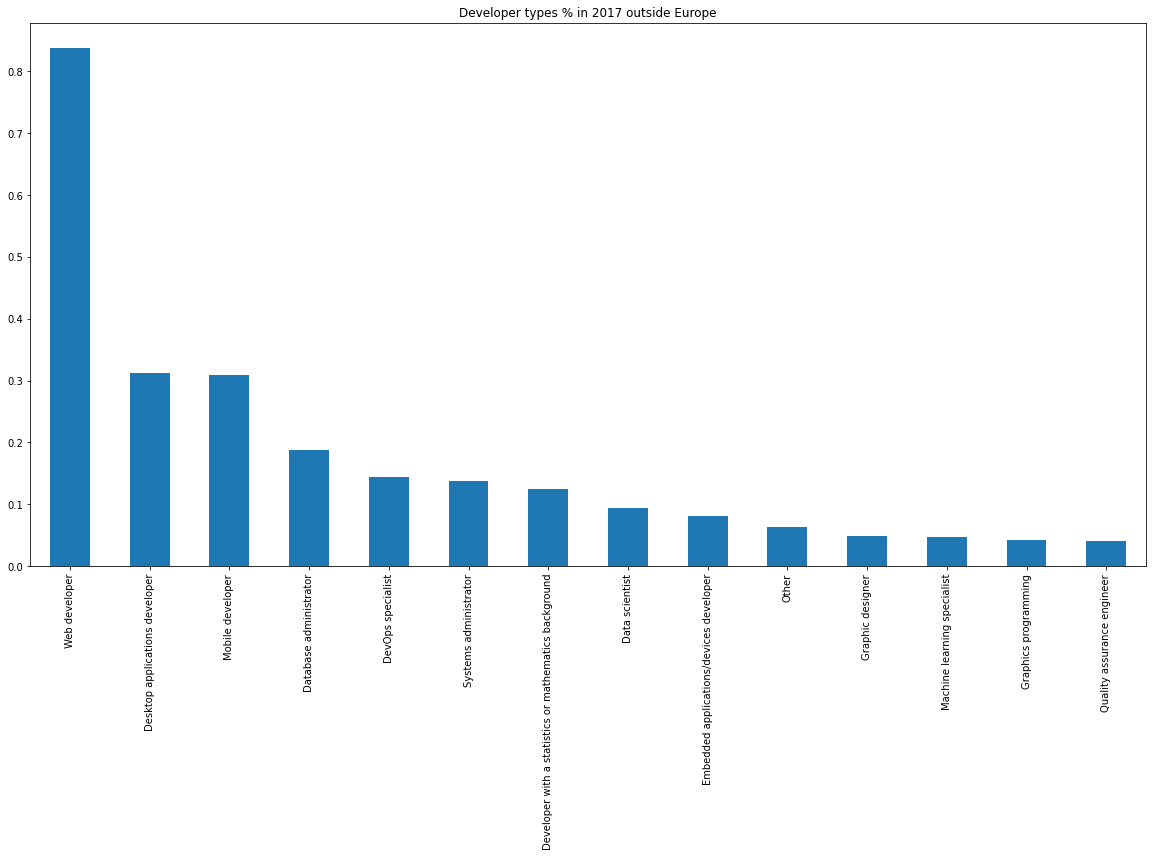

In [39]:
df_exploded_grouped_2017, total_vals_2017 = process_and_plot_multiple_tags_cat_col(df_2017_non_eu, "DeveloperType", 
                                                                                   "Developer types % in 2017 outside Europe")

null entries for DeveloperType: 0
                                               catval  total_catvals
0                                       Web developer           4111
1                      Desktop applications developer           1670
2                                    Mobile developer           1379
3                              Database administrator            842
4                                   DevOps specialist            747
5                               Systems administrator            691
6   Developer with a statistics or mathematics bac...            532
7             Embedded applications/devices developer            461
8                                      Data scientist            456
9                                               Other            300
10                               Graphics programming            277
11                                   Graphic designer            226
12                        Machine learning specialist            225


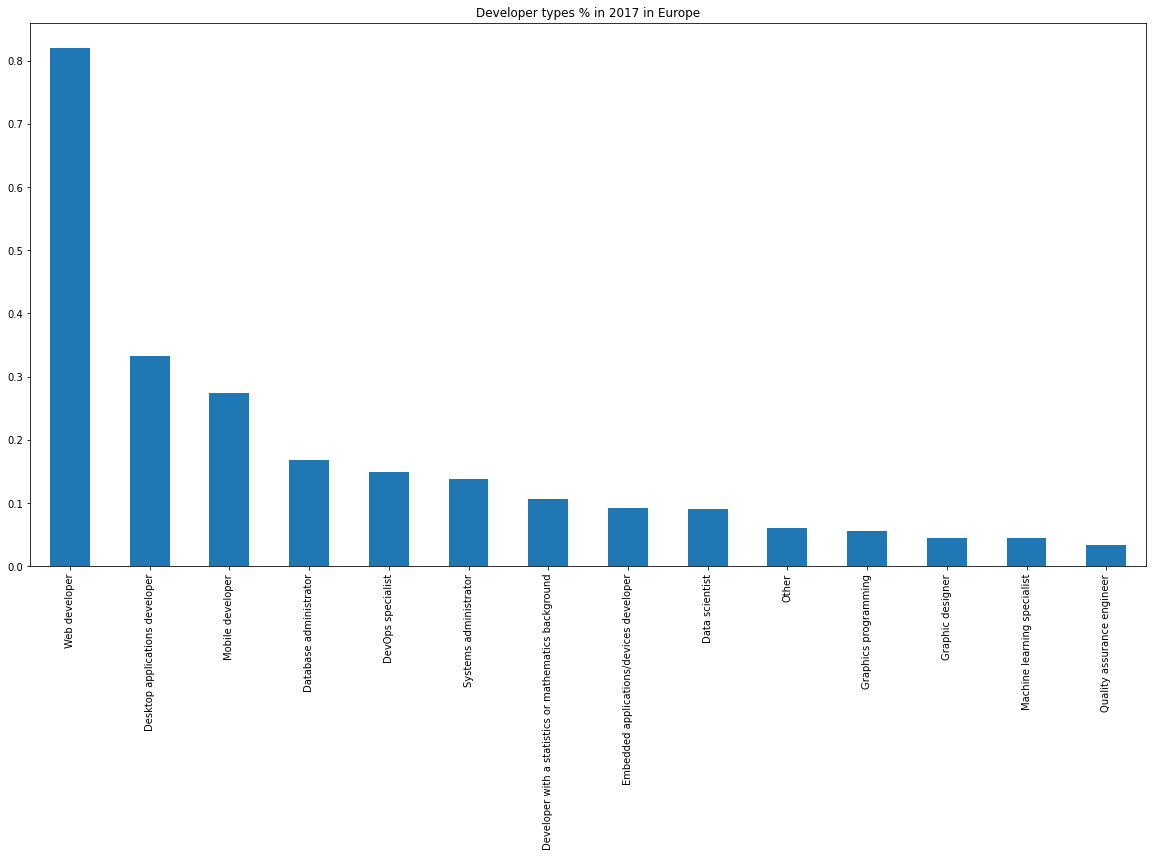

In [40]:
df_exploded_grouped_2017_eu, total_vals_2017_eu = process_and_plot_multiple_tags_cat_col(df_2017_eu, 
                                                                                         "DeveloperType", "Developer types % in 2017 in Europe")


In [41]:
def compare_and_plot_df(df_non_country_specific, df_country_specific, country, year, rows_year, rows_country_year):
    merged_df = pd.DataFrame()
    merged_df["catval"] = df_non_country_specific["catval"]
    merged_df[f"{year}"] = df_non_country_specific["total_catvals"]/rows_year
    merged_df[f"{country} {year}"] = df_country_specific["total_catvals"]/rows_country_year
    merged_df["diff"] = merged_df[f"{year}"] - merged_df[f"{country} {year}"]
    print(merged_df)
    
    merged_df.style.bar(subset=['diff'], align='mid', color=['#d65f5f', '#5fba7d'])
    
    labels = merged_df["catval"]
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, merged_df[f"{year}"], width, label=f"{year}")
    rects2 = ax.bar(x + width/2, merged_df[f"{country} {year}"] , width, label=f"{country} {year}")

#     ax.set_ylabel('')
#     ax.set_title('')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)
    ax.legend()

                                               catval      2017  Europe 2017  \
0                                       Web developer  0.836646     0.819251   
1                      Desktop applications developer  0.312578     0.332802   
2                                    Mobile developer  0.309472     0.274811   
3                              Database administrator  0.187267     0.167796   
4                                   DevOps specialist  0.144720     0.148864   
5                               Systems administrator  0.138354     0.137704   
6   Developer with a statistics or mathematics bac...  0.124534     0.106018   
7                                      Data scientist  0.093634     0.091869   
8             Embedded applications/devices developer  0.080435     0.090873   
9                                               Other  0.063975     0.059785   
10                                   Graphic designer  0.048137     0.055201   
11                        Machine learni

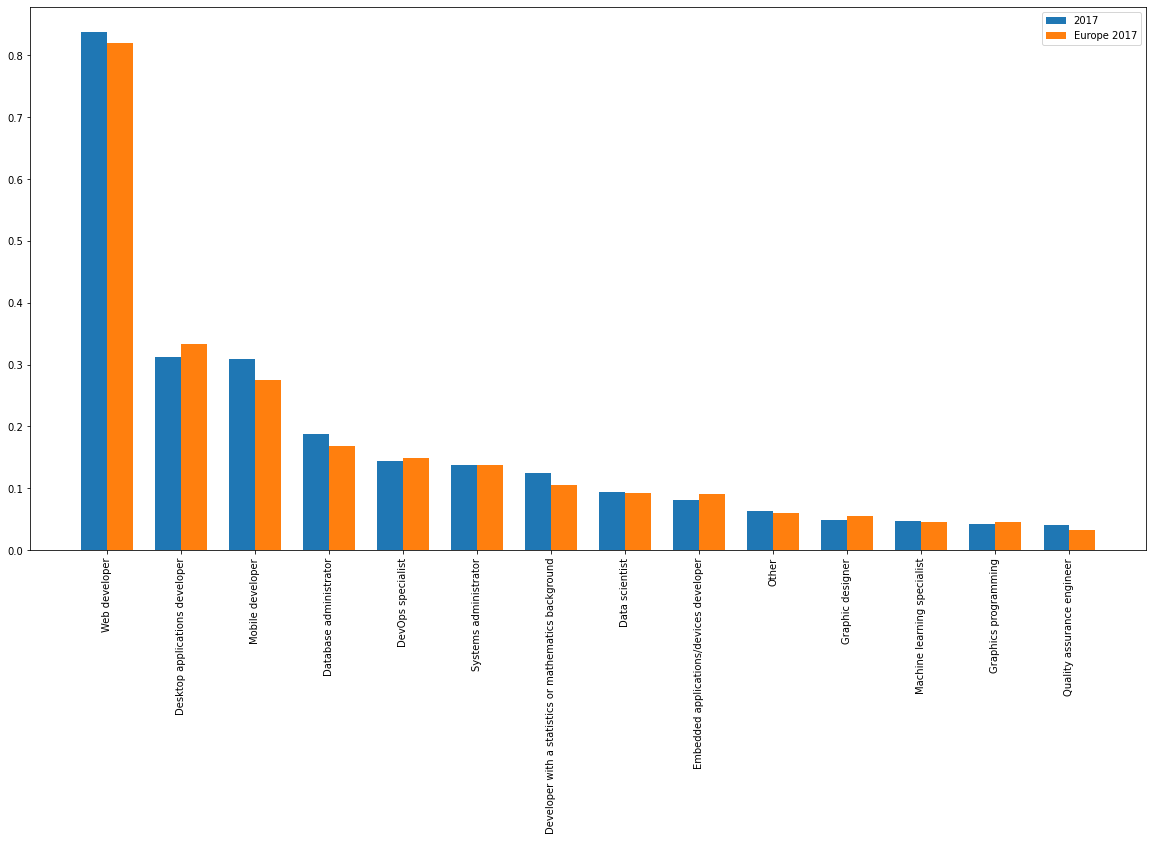

In [42]:
compare_and_plot_df(df_exploded_grouped_2017, df_exploded_grouped_2017_eu, "Europe", 2017, 
                    total_vals_2017, total_vals_2017_eu)

In [43]:
def process_and_compare_col_global_local(df, df_country, column_name, year, country):
    print(f"processing yearly data for year {year} and {column_name}")
    df_exploded_grouped, total_vals = process_and_plot_multiple_tags_cat_col(df, column_name, f"{column_name} % in {year} in the world")
    print(f"processing yearly data for year {year} and {column_name} in {country}")
    df_exploded_grouped__country_specific, total_vals_country = process_and_plot_multiple_tags_cat_col(df_country, column_name, f"{column_name} % in {year} in {country}")
    compare_and_plot_df(df_exploded_grouped, df_exploded_grouped__country_specific, country, year, total_vals, total_vals_country)
    return df_exploded_grouped, df_exploded_grouped__country_specific

processing yearly data for year 2017 and HaveWorkedLanguage
null entries for HaveWorkedLanguage: 0
            catval  total_catvals
0       JavaScript           5254
1              SQL           4122
2               C#           2980
3             Java           2736
4           Python           2033
5              PHP           2020
6              C++           1148
7       TypeScript           1054
8                C            960
9             Ruby            847
10     Objective-C            598
11          VB.NET            597
12           Swift            596
13              Go            407
14    CoffeeScript            358
15           Scala            338
16               R            268
17          Groovy            264
18        Assembly            259
19            Perl            250
20             VBA            243
21  Visual Basic 6            219
22          Matlab            210
23             Lua            157
24          Elixir            106
25              F

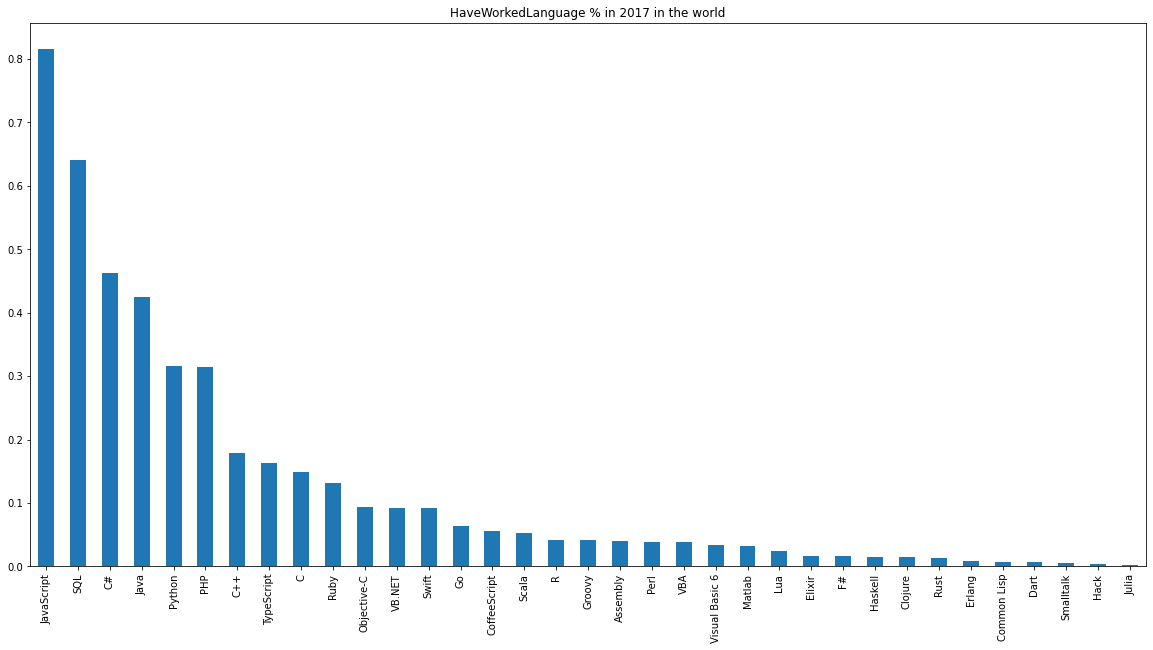

processing yearly data for year 2017 and HaveWorkedLanguage in Europe
null entries for HaveWorkedLanguage: 0
            catval  total_catvals
0       JavaScript           4143
1              SQL           3222
2               C#           2439
3             Java           1996
4              PHP           1726
5           Python           1381
6       TypeScript            975
7              C++            928
8                C            745
9             Ruby            516
10     Objective-C            413
11           Swift            384
12          VB.NET            343
13              Go            320
14    CoffeeScript            304
15           Scala            278
16          Groovy            225
17             VBA            210
18               R            189
19        Assembly            178
20            Perl            164
21             Lua            161
22          Matlab            160
23              F#            133
24  Visual Basic 6            122
25     

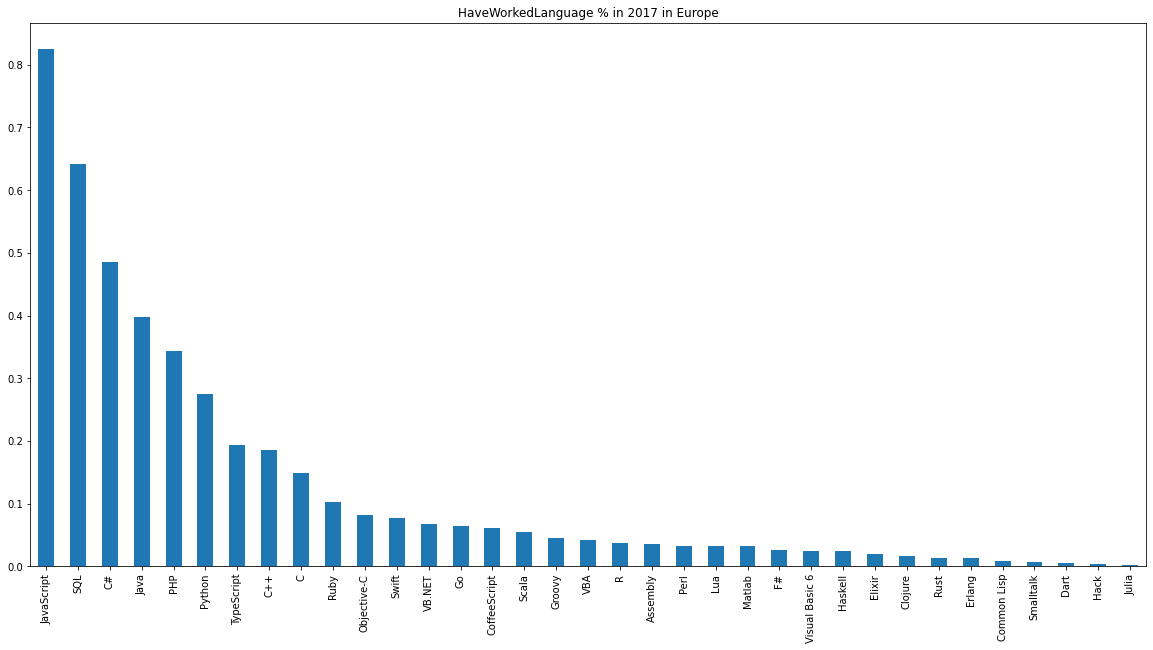

            catval      2017  Europe 2017      diff
0       JavaScript  0.815839     0.825628 -0.009789
1              SQL  0.640062     0.642088 -0.002026
2               C#  0.462733     0.486050 -0.023317
3             Java  0.424845     0.397768  0.027077
4           Python  0.315683     0.343962 -0.028279
5              PHP  0.313665     0.275209  0.038455
6              C++  0.178261     0.194301 -0.016040
7       TypeScript  0.163665     0.184934 -0.021270
8                C  0.149068     0.148466  0.000603
9             Ruby  0.131522     0.102830  0.028692
10     Objective-C  0.092857     0.082304  0.010553
11          VB.NET  0.092702     0.076525  0.016177
12           Swift  0.092547     0.068354  0.024193
13              Go  0.063199     0.063770 -0.000572
14    CoffeeScript  0.055590     0.060582 -0.004992
15           Scala  0.052484     0.055401 -0.002916
16               R  0.041615     0.044839 -0.003224
17          Groovy  0.040994     0.041849 -0.000856
18        As

(            catval  total_catvals
 0       JavaScript           5254
 1              SQL           4122
 2               C#           2980
 3             Java           2736
 4           Python           2033
 5              PHP           2020
 6              C++           1148
 7       TypeScript           1054
 8                C            960
 9             Ruby            847
 10     Objective-C            598
 11          VB.NET            597
 12           Swift            596
 13              Go            407
 14    CoffeeScript            358
 15           Scala            338
 16               R            268
 17          Groovy            264
 18        Assembly            259
 19            Perl            250
 20             VBA            243
 21  Visual Basic 6            219
 22          Matlab            210
 23             Lua            157
 24          Elixir            106
 25              F#            102
 26         Haskell             99
 27         Clojure 

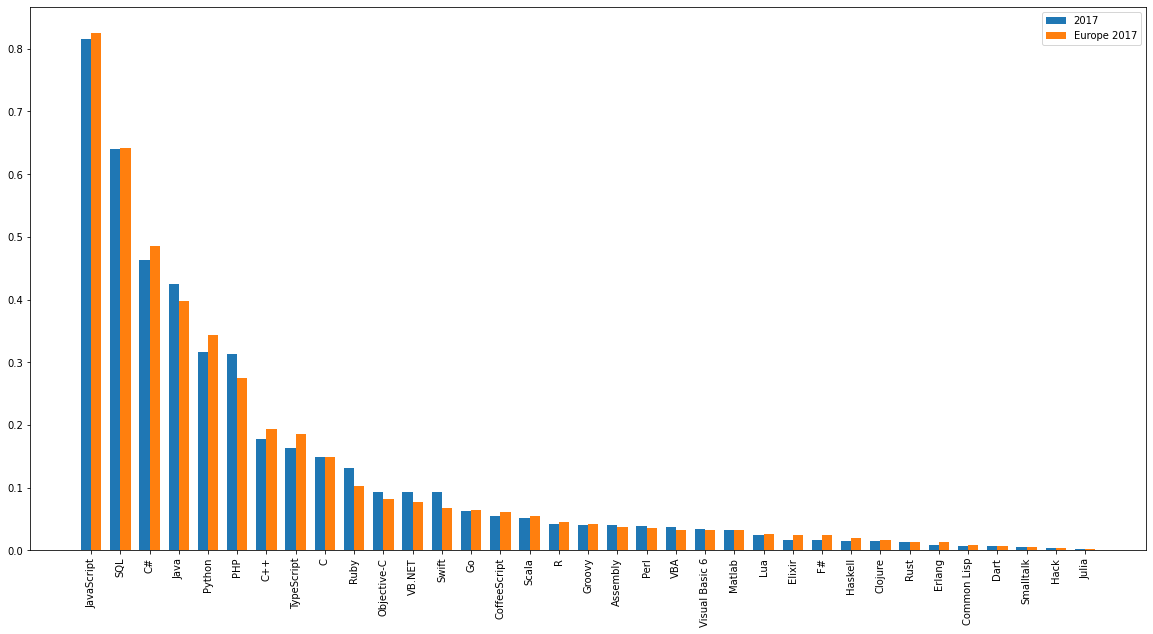

In [44]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "HaveWorkedLanguage", year=2017, country="Europe")

## What do people wanted to work in actually

processing yearly data for year 2017 and WantWorkLanguage
null entries for WantWorkLanguage: 0
            catval  total_catvals
0       JavaScript           3823
1              SQL           2545
2               C#           2364
3           Python           2330
4             Java           1824
5       TypeScript           1630
6               Go           1472
7            Swift           1195
8              C++           1094
9             Ruby            939
10             PHP            935
11           Scala            736
12               C            718
13               R            570
14              F#            561
15            Rust            540
16     Objective-C            489
17          Elixir            439
18         Haskell            408
19         Clojure            327
20        Assembly            279
21    CoffeeScript            266
22          Erlang            264
23             Lua            199
24          Groovy            186
25          VB.NET   

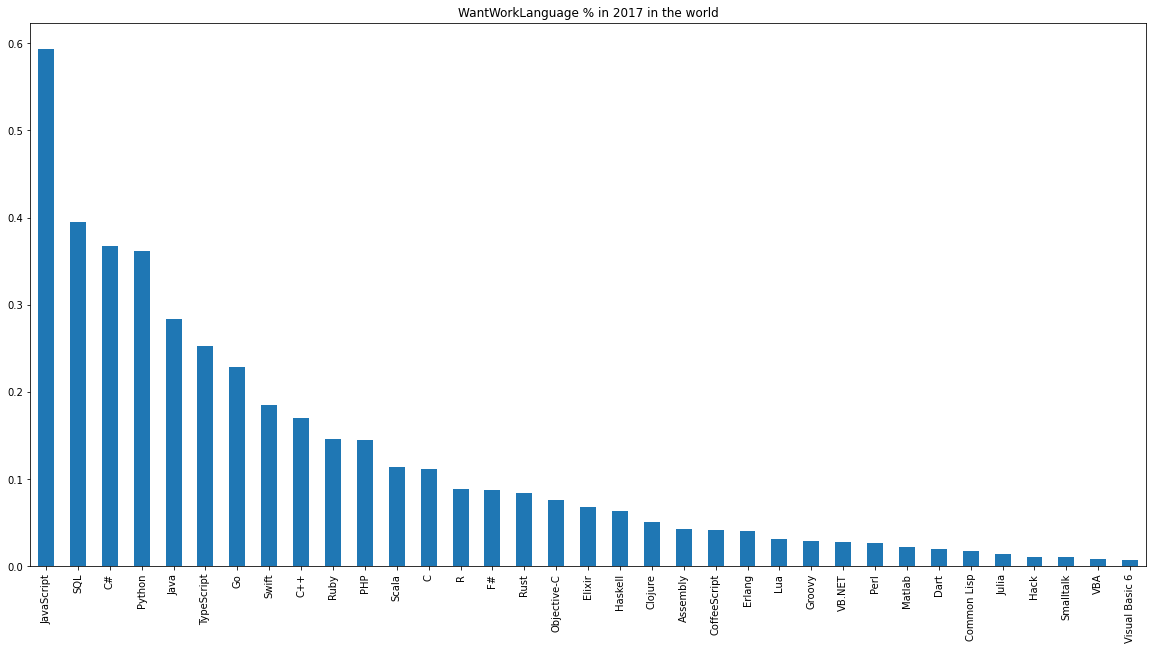

processing yearly data for year 2017 and WantWorkLanguage in Europe
null entries for WantWorkLanguage: 0
            catval  total_catvals
0       JavaScript           2876
1               C#           1944
2              SQL           1878
3           Python           1461
4       TypeScript           1412
5             Java           1318
6               Go           1030
7              C++            908
8              PHP            832
9            Swift            686
10               C            539
11            Ruby            527
12           Scala            515
13              F#            477
14            Rust            459
15          Elixir            354
16         Haskell            339
17               R            319
18     Objective-C            270
19         Clojure            230
20          Erlang            217
21    CoffeeScript            205
22        Assembly            201
23             Lua            153
24          Groovy            133
25         

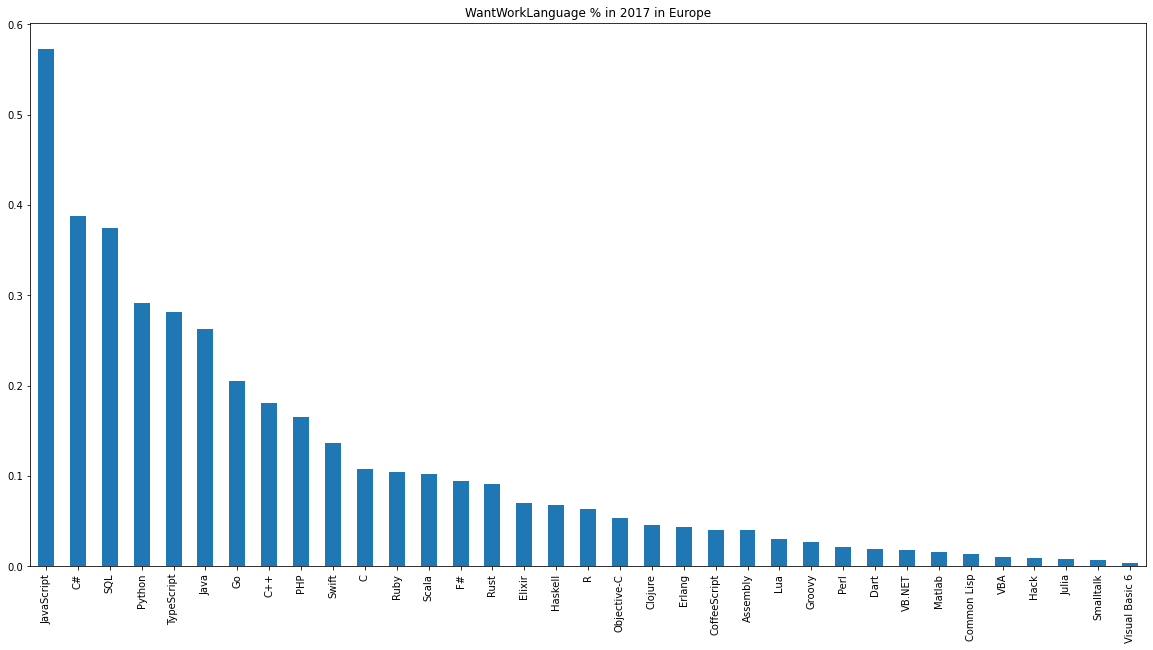

            catval      2017  Europe 2017      diff
0       JavaScript  0.593634     0.573137  0.020497
1              SQL  0.395186     0.387405  0.007781
2               C#  0.367081     0.374253 -0.007172
3           Python  0.361801     0.291152  0.070649
4             Java  0.283230     0.281387  0.001843
5       TypeScript  0.253106     0.262654 -0.009549
6               Go  0.228571     0.205261  0.023310
7            Swift  0.185559     0.180949  0.004610
8              C++  0.169876     0.165803  0.004073
9             Ruby  0.145807     0.136708  0.009100
10             PHP  0.145186     0.107413  0.037773
11           Scala  0.114286     0.105022  0.009264
12               C  0.111491     0.102631  0.008860
13               R  0.088509     0.095058 -0.006548
14              F#  0.087112     0.091471 -0.004359
15            Rust  0.083851     0.070546  0.013305
16     Objective-C  0.075932     0.067557  0.008375
17          Elixir  0.068168     0.063571  0.004597
18         H

(            catval  total_catvals
 0       JavaScript           3823
 1              SQL           2545
 2               C#           2364
 3           Python           2330
 4             Java           1824
 5       TypeScript           1630
 6               Go           1472
 7            Swift           1195
 8              C++           1094
 9             Ruby            939
 10             PHP            935
 11           Scala            736
 12               C            718
 13               R            570
 14              F#            561
 15            Rust            540
 16     Objective-C            489
 17          Elixir            439
 18         Haskell            408
 19         Clojure            327
 20        Assembly            279
 21    CoffeeScript            266
 22          Erlang            264
 23             Lua            199
 24          Groovy            186
 25          VB.NET            183
 26            Perl            173
 27          Matlab 

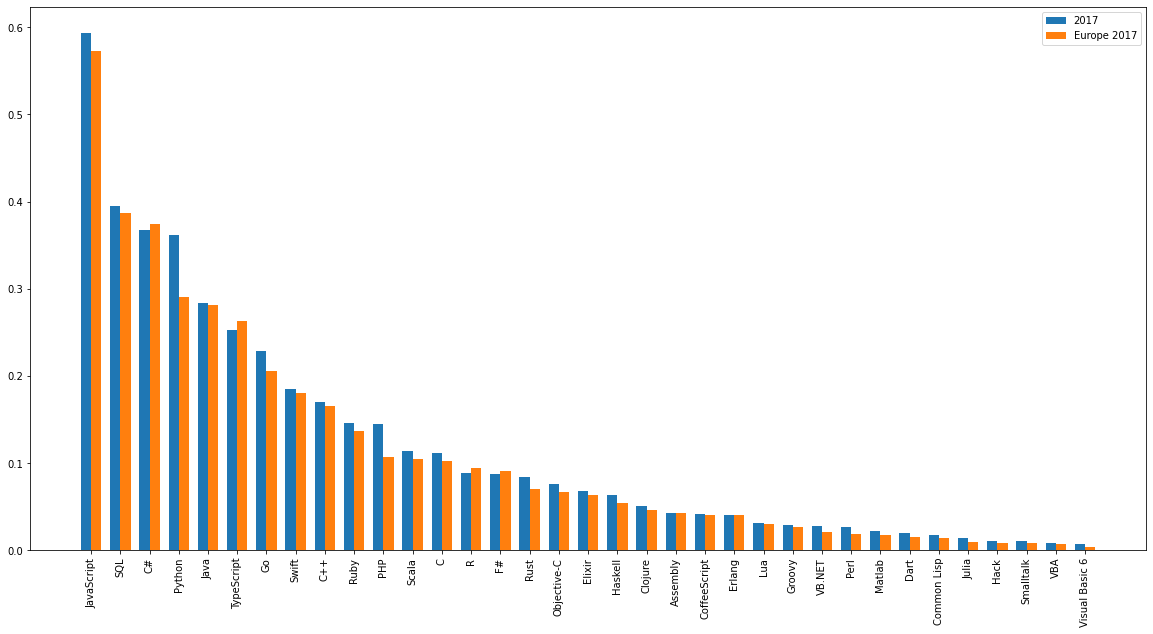

In [45]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "WantWorkLanguage", year=2017, country="Europe")

## How many people actually work with the language they want?

In [26]:
def check_lang_matching(row):
    worked_langs = sorted([lang.strip() for lang in row["HaveWorkedLanguage"].split(";")])
    want_to_work_langs = sorted([lang.strip() for lang in row["WantWorkLanguage"].split(";")])
    lang_intersect = sorted(list(set(worked_langs) & set(want_to_work_langs)))
    if lang_intersect == worked_langs:
        return "Perfect match"
    elif len(lang_intersect) == 0:
        return "No match"
    else:
        return "Some match"
    
df_2017["LangSatisfaction"] = df_2017.apply(check_lang_matching, axis=1)

AttributeError: ("'float' object has no attribute 'split'", 'occurred at index 4')

In [ ]:
df_2017.LangSatisfaction.value_counts()

In [ ]:
def check_lang_matching(row):
    worked_langs = sorted([lang.strip() for lang in row["HaveWorkedLanguage"].split(";")])
    want_to_work_langs = sorted([lang.strip() for lang in row["WantWorkLanguage"].split(";")])
    lang_intersect = sorted(list(set(worked_langs) & set(want_to_work_langs)))
    joined_intersect = ";".join([l for l in lang_intersect if l])
    return joined_intersect
df_2017["LangMatched"] = df_2017.apply(check_lang_matching, axis=1)

## What is the programming language(s) that gives most satisfaction ?

In [ ]:
process_and_plot_multiple_tags_cat_col(df_2017[df_2017["LangMatched"] != "No Match"], "LangMatched")

In [ ]:
proces_multiple_tags_cat_col(df_2017, "WantWorkLanguage")

In [ ]:
df_2017.CareerSatisfaction.value_counts()

In [ ]:
df_2017.JobSatisfaction.value_counts()

In [ ]:
df_2017.groupby(['HaveWorkedLanguage', 'CareerSatisfaction']).count()['Respondent'].plot(rot=90)

## Process Frameworks 

processing yearly data for year 2017 and HaveWorkedFramework
null entries for HaveWorkedFramework: 5140
droping nulls of the column: HaveWorkedFramework
updated null entries for HaveWorkedFramework: 0
      catval  total_catvals
0  AngularJS           3975
1    Node.js           3882
2  .NET Core           2689
3      React           1774
4    Cordova            926
5   Firebase            912
6    Xamarin            642
7     Hadoop            494
8      Spark            417


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


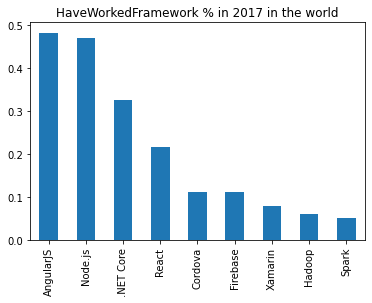

processing yearly data for year 2017 and HaveWorkedFramework in Europe
null entries for HaveWorkedFramework: 4996
droping nulls of the column: HaveWorkedFramework
updated null entries for HaveWorkedFramework: 0
      catval  total_catvals
0    Node.js           3190
1  AngularJS           3134
2  .NET Core           2127
3      React           1439
4    Cordova            796
5    Xamarin            534
6   Firebase            485
7     Hadoop            320
8      Spark            269


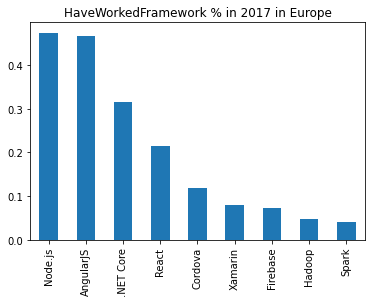

      catval      2017  Europe 2017      diff
0  AngularJS  0.482696     0.474208  0.008487
1    Node.js  0.471403     0.465884  0.005519
2  .NET Core  0.326533     0.316188  0.010345
3      React  0.215422     0.213914  0.001508
4    Cordova  0.112447     0.118329 -0.005882
5   Firebase  0.110747     0.079382  0.031365
6    Xamarin  0.077960     0.072098  0.005862
7     Hadoop  0.059988     0.047569  0.012418
8      Spark  0.050638     0.039988  0.010649


(      catval  total_catvals
 0  AngularJS           3975
 1    Node.js           3882
 2  .NET Core           2689
 3      React           1774
 4    Cordova            926
 5   Firebase            912
 6    Xamarin            642
 7     Hadoop            494
 8      Spark            417,       catval  total_catvals
 0    Node.js           3190
 1  AngularJS           3134
 2  .NET Core           2127
 3      React           1439
 4    Cordova            796
 5    Xamarin            534
 6   Firebase            485
 7     Hadoop            320
 8      Spark            269)

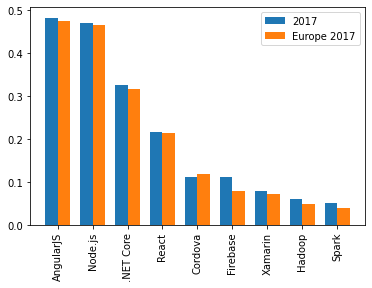

In [27]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "HaveWorkedFramework", year=2017, country="Europe")

processing yearly data for year 2017 and HaveWorkedDatabase
null entries for HaveWorkedDatabase: 767
droping nulls of the column: HaveWorkedDatabase
updated null entries for HaveWorkedDatabase: 0
       catval  total_catvals
0       MySQL           3960
1  SQL Server           3477
2  PostgreSQL           2149
3     MongoDB           2072
4      SQLite           2026
5       Redis           1395
6      Oracle           1137
7   Cassandra            311


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


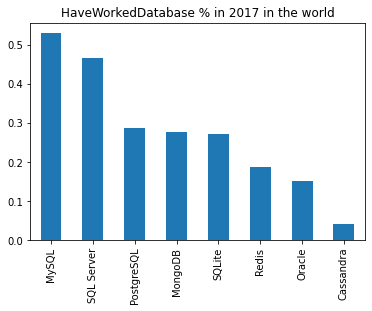

processing yearly data for year 2017 and HaveWorkedDatabase in Europe
null entries for HaveWorkedDatabase: 717
droping nulls of the column: HaveWorkedDatabase
updated null entries for HaveWorkedDatabase: 0
       catval  total_catvals
0       MySQL           3139
1  SQL Server           2501
2  PostgreSQL           1837
3     MongoDB           1780
4      SQLite           1602
5       Redis           1184
6      Oracle            941
7   Cassandra            231


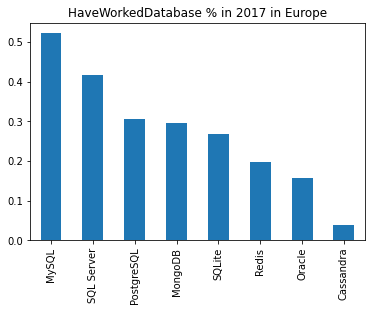

       catval      2017  Europe 2017      diff
0       MySQL  0.530262     0.522296  0.007966
1  SQL Server  0.465587     0.416140  0.049447
2  PostgreSQL  0.287761     0.305657 -0.017896
3     MongoDB  0.277450     0.296173 -0.018723
4      SQLite  0.271291     0.266556  0.004735
5       Redis  0.186797     0.197005 -0.010208
6      Oracle  0.152250     0.156572 -0.004323
7   Cassandra  0.041644     0.038436  0.003208


(       catval  total_catvals
 0       MySQL           3960
 1  SQL Server           3477
 2  PostgreSQL           2149
 3     MongoDB           2072
 4      SQLite           2026
 5       Redis           1395
 6      Oracle           1137
 7   Cassandra            311,        catval  total_catvals
 0       MySQL           3139
 1  SQL Server           2501
 2  PostgreSQL           1837
 3     MongoDB           1780
 4      SQLite           1602
 5       Redis           1184
 6      Oracle            941
 7   Cassandra            231)

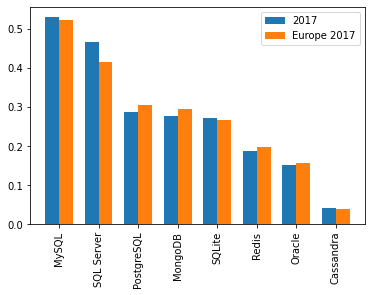

In [28]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "HaveWorkedDatabase", year=2017, country="Europe")

processing yearly data for year 2017 and HaveWorkedPlatform
null entries for HaveWorkedPlatform: 1028
droping nulls of the column: HaveWorkedPlatform
updated null entries for HaveWorkedPlatform: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                       catval  total_catvals
0   Amazon Web Services (AWS)           2808
1             Windows Desktop           2397
2                     Android           2050
3               Linux Desktop           1859
4                      Mac OS           1415
5                         iOS           1274
6                   WordPress           1217
7             Microsoft Azure           1136
8                Raspberry Pi            904
9                     Arduino            614
10                 SharePoint            313
11              Windows Phone            281
12                 Salesforce            267
13                 Serverless            235
14                  Mainframe             75


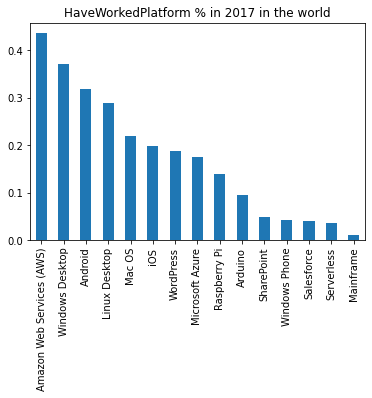

processing yearly data for year 2017 and HaveWorkedPlatform in Europe
null entries for HaveWorkedPlatform: 992
droping nulls of the column: HaveWorkedPlatform
updated null entries for HaveWorkedPlatform: 0
                       catval  total_catvals
0             Windows Desktop           2040
1   Amazon Web Services (AWS)           1605
2                     Android           1561
3               Linux Desktop           1409
4                         iOS           1009
5                Raspberry Pi            988
6                      Mac OS            967
7             Microsoft Azure            935
8                   WordPress            859
9                     Arduino            488
10              Windows Phone            301
11                 SharePoint            211
12                 Serverless            138
13                 Salesforce            125
14                  Mainframe             74


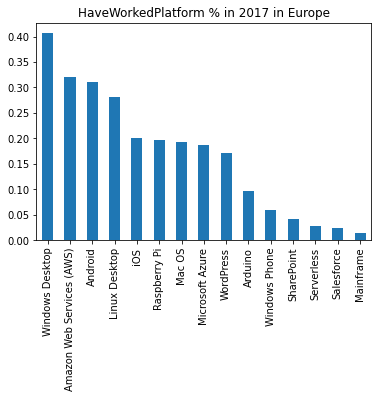

                       catval      2017  Europe 2017      diff
0   Amazon Web Services (AWS)  0.436025     0.406536  0.029488
1             Windows Desktop  0.372205     0.319849  0.052356
2                     Android  0.318323     0.311080  0.007243
3               Linux Desktop  0.288665     0.280789  0.007875
4                      Mac OS  0.219720     0.201076  0.018644
5                         iOS  0.197826     0.196891  0.000935
6                   WordPress  0.188975     0.192706 -0.003731
7             Microsoft Azure  0.176398     0.186329 -0.009932
8                Raspberry Pi  0.140373     0.171184 -0.030811
9                     Arduino  0.095342     0.097250 -0.001908
10                 SharePoint  0.048602     0.059984 -0.011382
11              Windows Phone  0.043634     0.042049  0.001585
12                 Salesforce  0.041460     0.027501  0.013959
13                 Serverless  0.036491     0.024910  0.011580
14                  Mainframe  0.011646     0.014747 -0

(                       catval  total_catvals
 0   Amazon Web Services (AWS)           2808
 1             Windows Desktop           2397
 2                     Android           2050
 3               Linux Desktop           1859
 4                      Mac OS           1415
 5                         iOS           1274
 6                   WordPress           1217
 7             Microsoft Azure           1136
 8                Raspberry Pi            904
 9                     Arduino            614
 10                 SharePoint            313
 11              Windows Phone            281
 12                 Salesforce            267
 13                 Serverless            235
 14                  Mainframe             75,
                        catval  total_catvals
 0             Windows Desktop           2040
 1   Amazon Web Services (AWS)           1605
 2                     Android           1561
 3               Linux Desktop           1409
 4                         iOS   

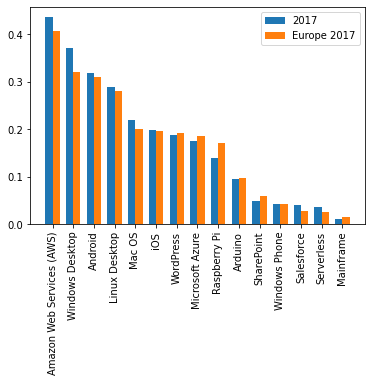

In [29]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "HaveWorkedPlatform", year=2017, country="Europe")

# Process 2018 Data

In [32]:
def process_yearly_data(file_path, year, country, columns_index=None):
    print(f"processing data for year {year} from {file_path}")
    df = pd.read_csv(file_path)
    print('original data shape: ', df.shape)
    df['Year'] = year
    print('original data shape + year: ', df.shape)
    if country == 'Europe':
        df_country_specific = df[df.Country.isin(europe_countries)]
        df_non_country_specific = df[~df.Country.isin(europe_countries)]
    else:
        df_country_specific = df[df.Country == country]
        df_non_country_specific = df[df.Country != country]
    print('country specific data shape: ', df_country_specific.shape)
    if columns_index is not None:
        print('old column index: ', columns_index.tolist())
        print('old columns index len: ', len(columns_index))
        print('new columns index len: ', len(df_country_specific.columns))
        print('new column index: ', df_country_specific.columns.tolist())    
        diff_old_new = columns_index.difference(df_country_specific.columns)
        print('extra old columns index len: ', len(diff_old_new))
        print('extra old columns index ', diff_old_new.tolist())
        diff_new_old = df_country_specific.columns.difference(columns_index)
        print('extra new columns index len: ', len(diff_new_old))
        print('extra new columns index ', diff_new_old.tolist())
        new_column_index = columns_index.intersection(df_country_specific.columns)
        print('intersection columns index len: ', len(new_column_index))
        print('intersection columns index: ', new_column_index.tolist())


    return df_non_country_specific, df_country_specific, new_column_index

In [33]:
cols_intersect = df_2017_eu.columns

In [34]:
df_2018, df_2018_eu, cols_intersect = process_yearly_data(so_survey_results_2018, 2018, 'Europe', cols_intersect)

processing data for year 2018 from ./data/developer_survey_2018/survey_results_public.csv


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


original data shape:  (98855, 129)
original data shape + year:  (98855, 130)
country specific data shape:  (39390, 130)
old column index:  ['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJo

## Process Developer types in 2018

processing yearly data for year 2018 and DevType
null entries for DevType: 0
                                           catval  total_catvals
0                              Back-end developer          26411
1                            Full-stack developer          22930
2                             Front-end developer          17929
3                                Mobile developer          10027
4    Desktop or enterprise applications developer           7543
5                                         Student           7160
6                          Database administrator           6688
7                                        Designer           6554
8                            System administrator           4965
9                               DevOps specialist           4661
10                       Data or business analyst           4104
11  Data scientist or machine learning specialist           3573
12                           QA or test developer           3329
13           

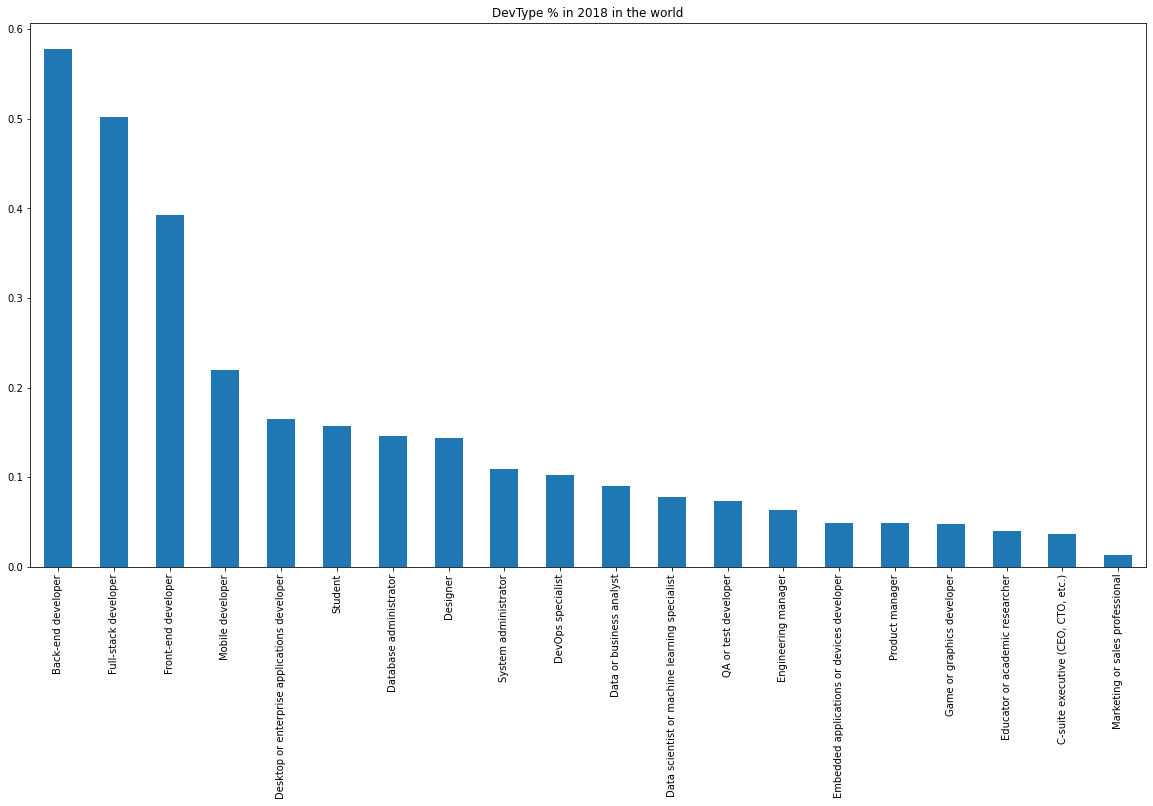

processing yearly data for year 2018 and DevType in Europe
null entries for DevType: 0
                                           catval  total_catvals
0                              Back-end developer          18725
1                            Full-stack developer          14929
2                             Front-end developer          11376
3    Desktop or enterprise applications developer           6187
4                                Mobile developer           5568
5                                         Student           5229
6                          Database administrator           4569
7                            System administrator           3918
8                               DevOps specialist           3684
9                                        Designer           3397
10  Data scientist or machine learning specialist           2414
11                       Data or business analyst           2318
12                           QA or test developer           2014
13 

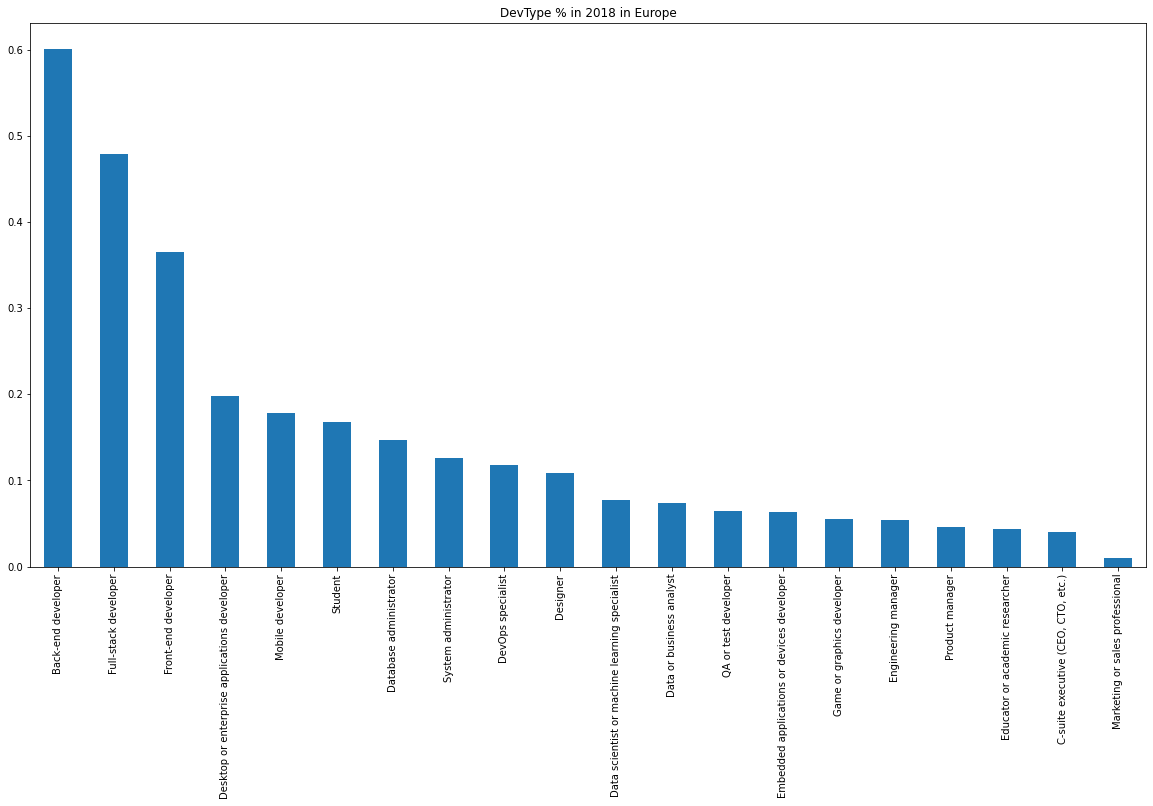

                                           catval      2018  Europe 2018  \
0                              Back-end developer  0.578035     0.600661   
1                            Full-stack developer  0.501849     0.478893   
2                             Front-end developer  0.392397     0.364919   
3                                Mobile developer  0.219452     0.198467   
4    Desktop or enterprise applications developer  0.165087     0.178610   
5                                         Student  0.156705     0.167736   
6                          Database administrator  0.146375     0.146564   
7                                        Designer  0.143442     0.125682   
8                            System administrator  0.108665     0.118175   
9                               DevOps specialist  0.102011     0.108969   
10                       Data or business analyst  0.089821     0.077436   
11  Data scientist or machine learning specialist  0.078199     0.074357   
12          

(                                           catval  total_catvals
 0                              Back-end developer          26411
 1                            Full-stack developer          22930
 2                             Front-end developer          17929
 3                                Mobile developer          10027
 4    Desktop or enterprise applications developer           7543
 5                                         Student           7160
 6                          Database administrator           6688
 7                                        Designer           6554
 8                            System administrator           4965
 9                               DevOps specialist           4661
 10                       Data or business analyst           4104
 11  Data scientist or machine learning specialist           3573
 12                           QA or test developer           3329
 13                            Engineering manager           2872
 14     Em

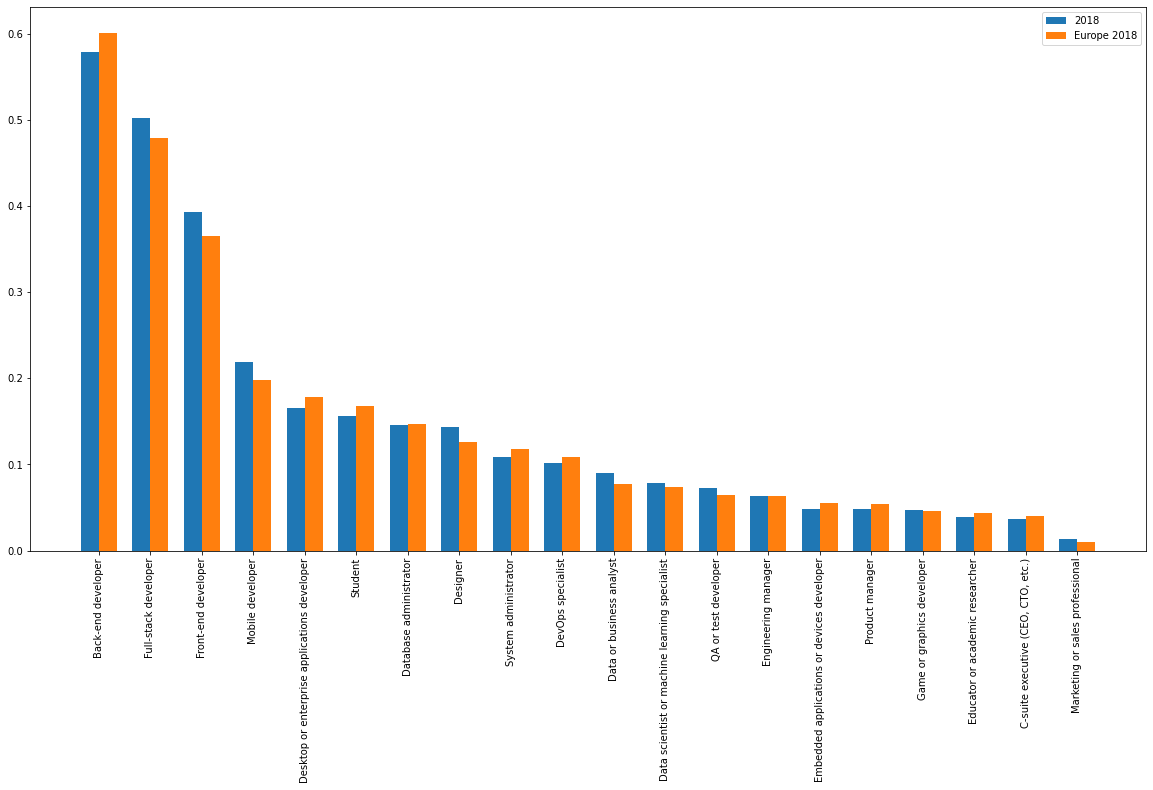

In [47]:
process_and_compare_col_global_local(df_2018, df_2018_eu, "DevType", year=2018, country="Europe")

## Process Languages worked in 2018

processing yearly data for year 2018 and LanguageWorkedWith
null entries for LanguageWorkedWith: 0
                  catval  total_catvals
0             JavaScript          32485
1                   HTML          31926
2                    CSS          30387
3                    SQL          26258
4                   Java          21065
5                 Python          17690
6             Bash/Shell          17212
7                     C#          15231
8                    PHP          13893
9                    C++          11445
10                     C          10859
11            TypeScript           7753
12                  Ruby           5084
13                 Swift           4010
14           Objective-C           3522
15                VB.NET           3420
16              Assembly           3327
17                    Go           3260
18                     R           2833
19                Matlab           2463
20                   VBA           2036
21        Visual Basi

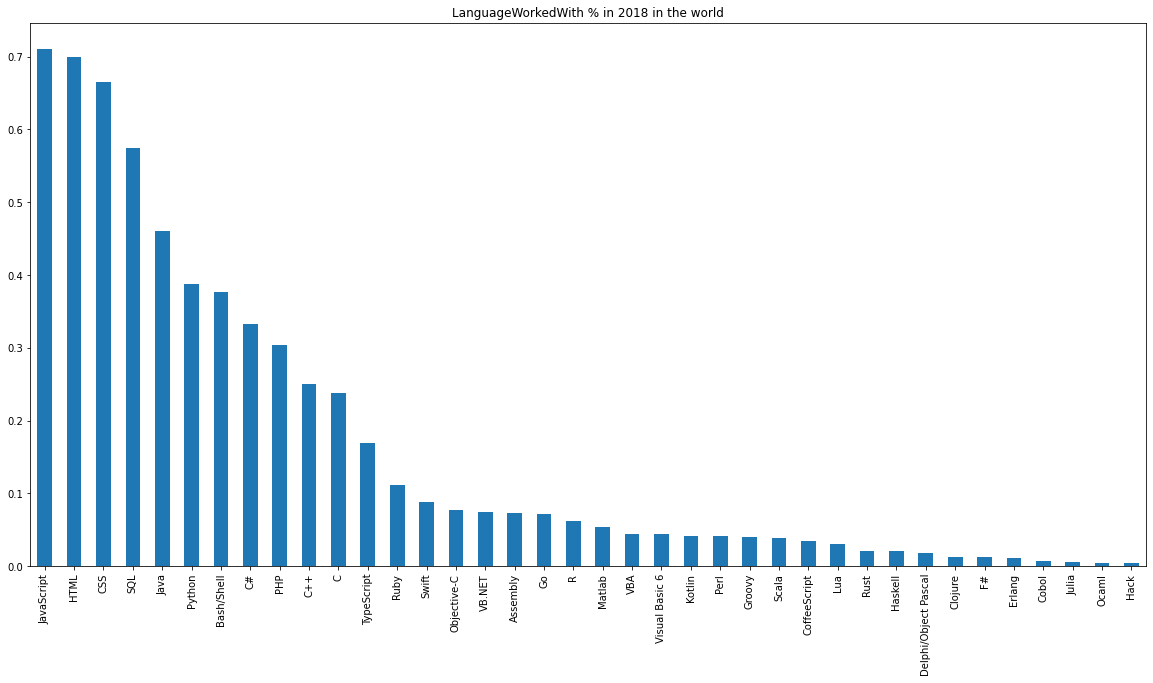

processing yearly data for year 2018 and LanguageWorkedWith in Europe
null entries for LanguageWorkedWith: 0
                  catval  total_catvals
0             JavaScript          21534
1                   HTML          20973
2                    CSS          19955
3                    SQL          17866
4                   Java          13951
5             Bash/Shell          13434
6                 Python          11945
7                     C#          11352
8                    PHP           9883
9                    C++           7956
10                     C           6746
11            TypeScript           5787
12                  Ruby           2718
13              Assembly           2262
14                 Swift           2225
15                    Go           2185
16                Matlab           1967
17           Objective-C           1922
18                     R           1836
19                VB.NET           1744
20                   VBA           1620
21         

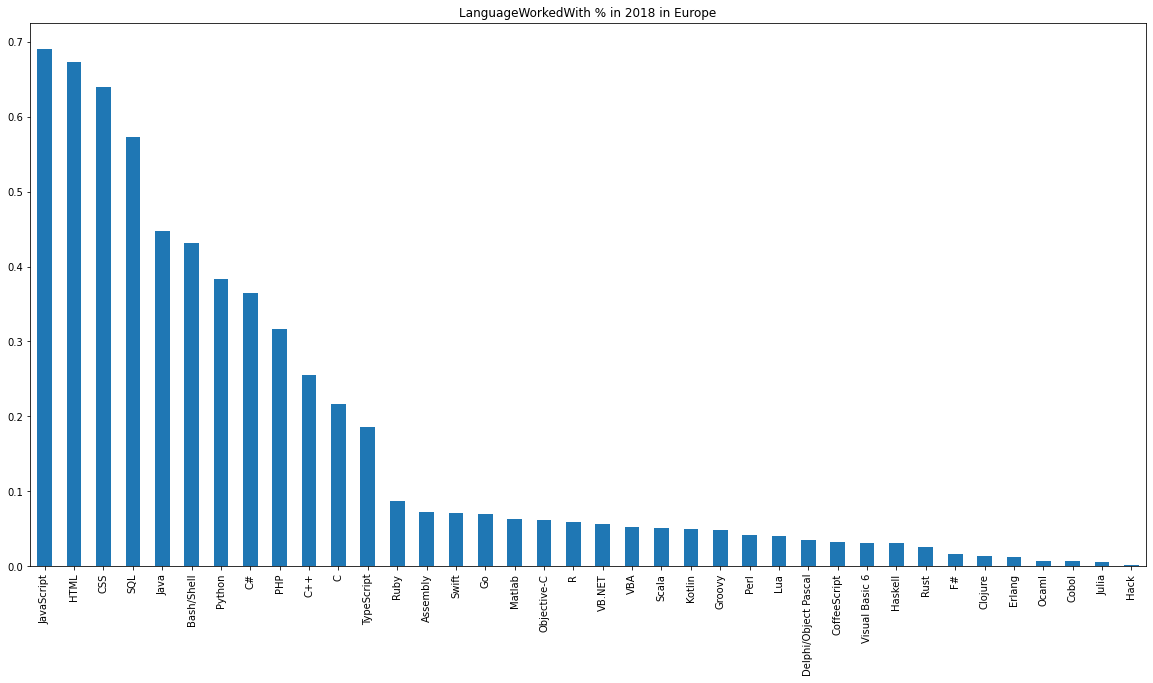

                  catval      2018  Europe 2018      diff
0             JavaScript  0.710972     0.690768  0.020204
1                   HTML  0.698737     0.672772  0.025965
2                    CSS  0.665054     0.640117  0.024938
3                    SQL  0.574686     0.573106  0.001581
4                   Java  0.461032     0.447520  0.013511
5                 Python  0.387166     0.430936 -0.043770
6             Bash/Shell  0.376704     0.383172 -0.006467
7                     C#  0.333348     0.364150 -0.030802
8                    PHP  0.304064     0.317027 -0.012963
9                    C++  0.250487     0.255213 -0.004726
10                     C  0.237662     0.216398  0.021263
11            TypeScript  0.169683     0.185635 -0.015952
12                  Ruby  0.111269     0.087188  0.024081
13                 Swift  0.087763     0.072560  0.015203
14           Objective-C  0.077083     0.071374  0.005709
15                VB.NET  0.074851     0.070090  0.004760
16            

(                  catval  total_catvals
 0             JavaScript          32485
 1                   HTML          31926
 2                    CSS          30387
 3                    SQL          26258
 4                   Java          21065
 5                 Python          17690
 6             Bash/Shell          17212
 7                     C#          15231
 8                    PHP          13893
 9                    C++          11445
 10                     C          10859
 11            TypeScript           7753
 12                  Ruby           5084
 13                 Swift           4010
 14           Objective-C           3522
 15                VB.NET           3420
 16              Assembly           3327
 17                    Go           3260
 18                     R           2833
 19                Matlab           2463
 20                   VBA           2036
 21        Visual Basic 6           2035
 22                Kotlin           1913
 23             

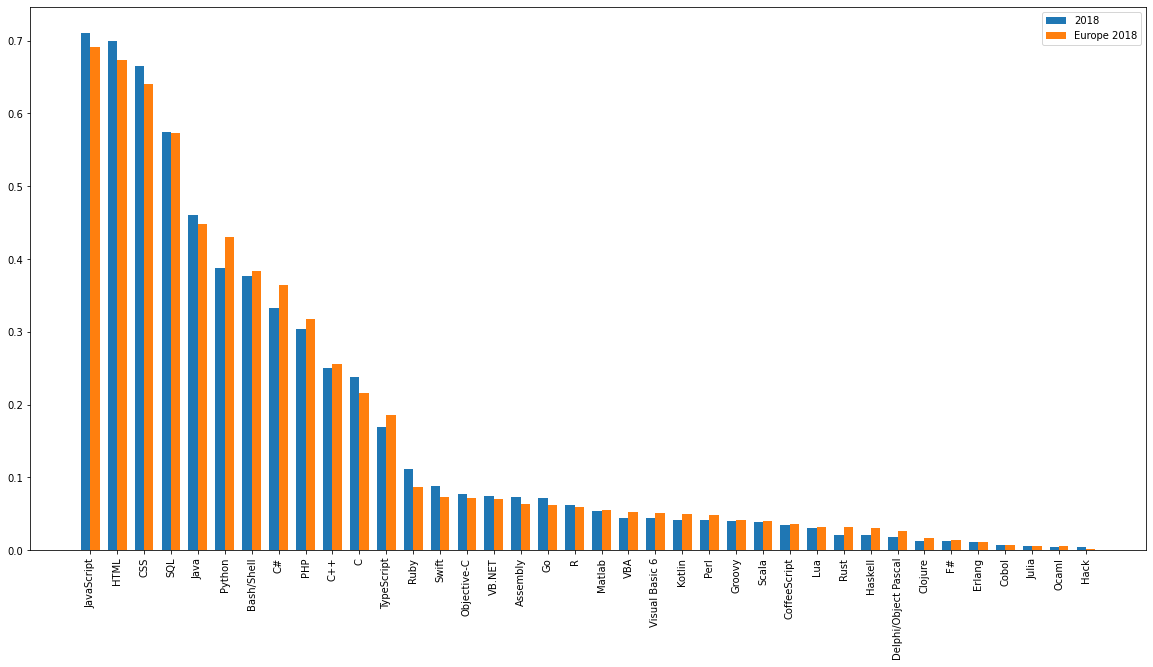

In [48]:
process_and_compare_col_global_local(df_2018, df_2018_eu, "LanguageWorkedWith", year=2018, country="Europe")

## Process Framework worked in 2018

processing yearly data for year 2018 and FrameworkWorkedWith
null entries for FrameworkWorkedWith: 15232
droping nulls of the column: FrameworkWorkedWith
updated null entries for FrameworkWorkedWith: 0
           catval  total_catvals
0         Node.js          15540
1         Angular          11709
2           React           8890
3       .NET Core           8040
4          Spring           5021
5          Django           4211
6         Cordova           2725
7      TensorFlow           2452
8         Xamarin           2150
9          Hadoop           1587
10          Spark           1491
11  Torch/PyTorch            550


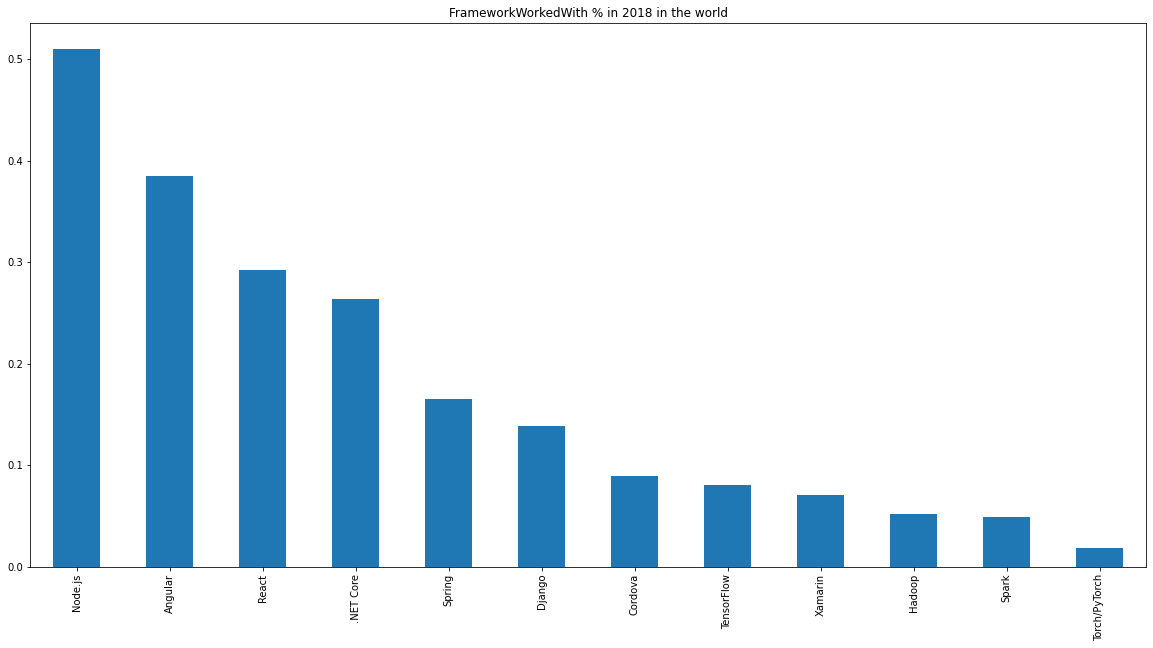

processing yearly data for year 2018 and FrameworkWorkedWith in Europe
null entries for FrameworkWorkedWith: 10678
droping nulls of the column: FrameworkWorkedWith
updated null entries for FrameworkWorkedWith: 0
           catval  total_catvals
0         Node.js           9784
1         Angular           7164
2       .NET Core           5810
3           React           5332
4          Spring           3959
5          Django           2413
6         Cordova           1608
7         Xamarin           1585
8      TensorFlow           1497
9           Spark            933
10         Hadoop            808
11  Torch/PyTorch            287


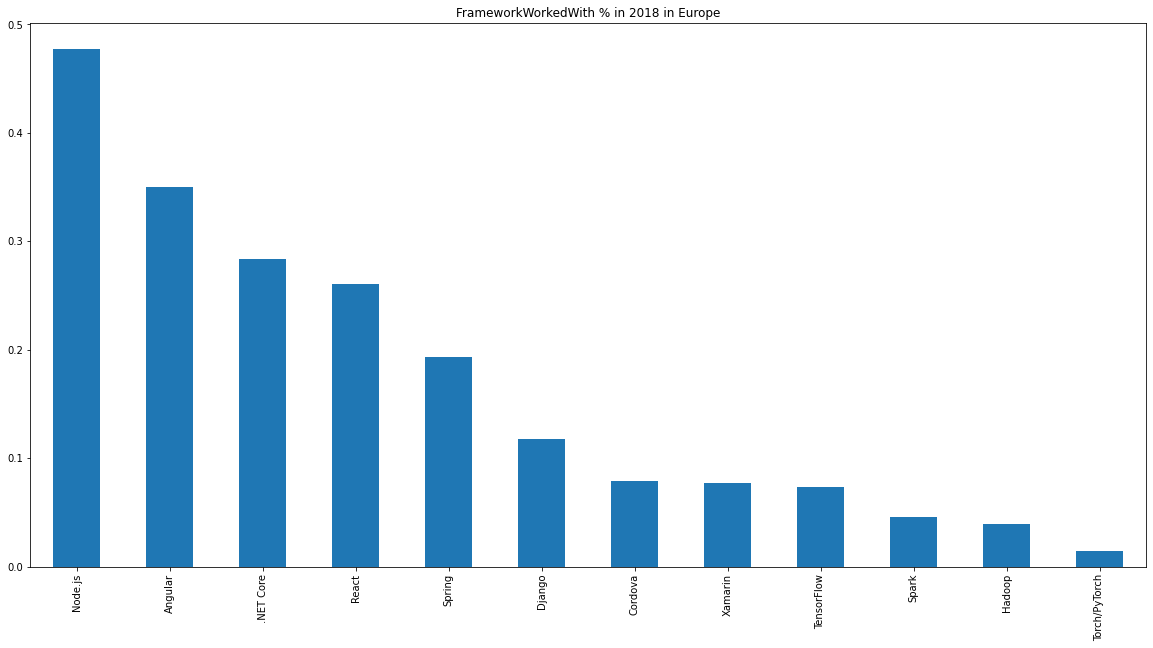

           catval      2018  Europe 2018      diff
0         Node.js  0.510194     0.477361  0.032833
1         Angular  0.384418     0.349532  0.034887
2           React  0.291868     0.283470  0.008398
3       .NET Core  0.263961     0.260148  0.003813
4          Spring  0.164845     0.193160 -0.028315
5          Django  0.138251     0.117730  0.020521
6         Cordova  0.089465     0.078454  0.011010
7      TensorFlow  0.080502     0.077332  0.003169
8         Xamarin  0.070587     0.073039 -0.002452
9          Hadoop  0.052103     0.045521  0.006582
10          Spark  0.048951     0.039422  0.009529
11  Torch/PyTorch  0.018057     0.014003  0.004054


(           catval  total_catvals
 0         Node.js          15540
 1         Angular          11709
 2           React           8890
 3       .NET Core           8040
 4          Spring           5021
 5          Django           4211
 6         Cordova           2725
 7      TensorFlow           2452
 8         Xamarin           2150
 9          Hadoop           1587
 10          Spark           1491
 11  Torch/PyTorch            550,            catval  total_catvals
 0         Node.js           9784
 1         Angular           7164
 2       .NET Core           5810
 3           React           5332
 4          Spring           3959
 5          Django           2413
 6         Cordova           1608
 7         Xamarin           1585
 8      TensorFlow           1497
 9           Spark            933
 10         Hadoop            808
 11  Torch/PyTorch            287)

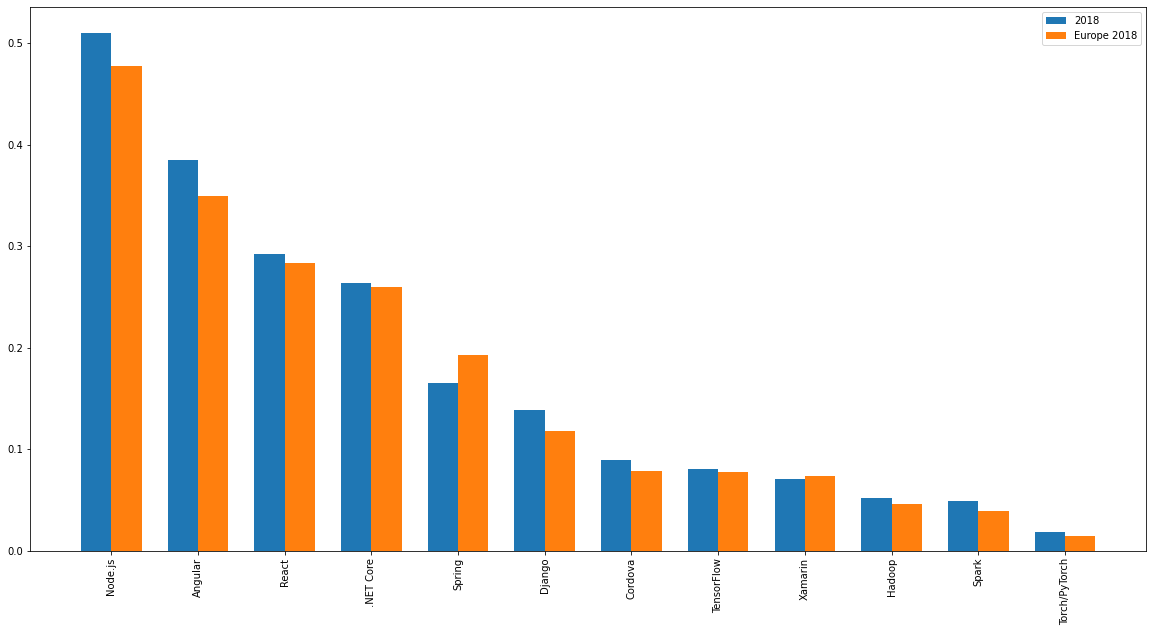

In [49]:
process_and_compare_col_global_local(df_2018, df_2018_eu, "FrameworkWorkedWith", year=2018, country="Europe")

## Process Databases worked in 2018

processing yearly data for year 2018 and DatabaseWorkedWith
null entries for DatabaseWorkedWith: 2283
droping nulls of the column: DatabaseWorkedWith
updated null entries for DatabaseWorkedWith: 0
                                          catval  total_catvals
0                                          MySQL          17000
1                                     SQL Server          12672
2                                     PostgreSQL           9949
3                                        MongoDB           9139
4                                          Redis           5944
5                                         SQLite           5591
6                                  Elasticsearch           4269
7                                         Oracle           3367
8                                        MariaDB           3357
9   Microsoft Azure (Tables, CosmosDB, SQL, etc)           2570
10                               Amazon DynamoDB           2082
11                             Amaz

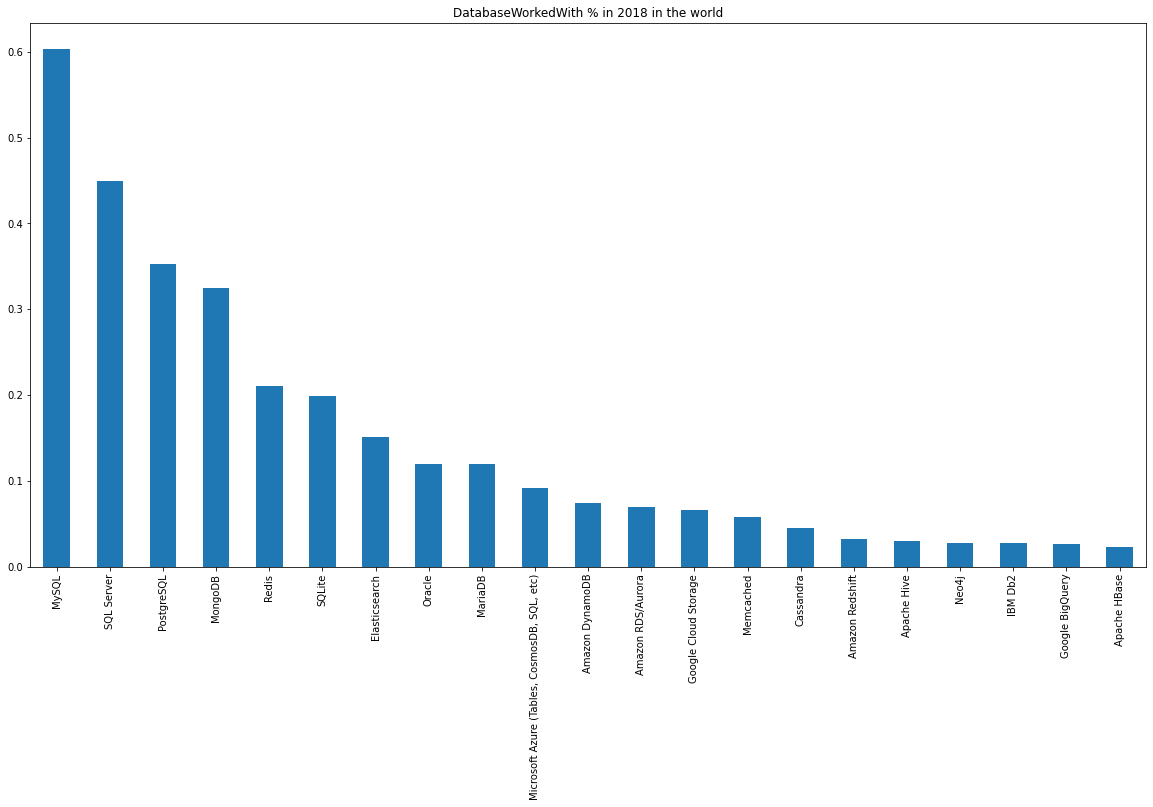

processing yearly data for year 2018 and DatabaseWorkedWith in Europe
null entries for DatabaseWorkedWith: 1802
droping nulls of the column: DatabaseWorkedWith
updated null entries for DatabaseWorkedWith: 0
                                          catval  total_catvals
0                                          MySQL          10626
1                                     SQL Server           7719
2                                     PostgreSQL           7191
3                                        MongoDB           5797
4                                          Redis           4006
5                                         SQLite           3656
6                                  Elasticsearch           3475
7                                        MariaDB           3066
8                                         Oracle           2047
9   Microsoft Azure (Tables, CosmosDB, SQL, etc)           1752
10                                     Memcached           1262
11                       

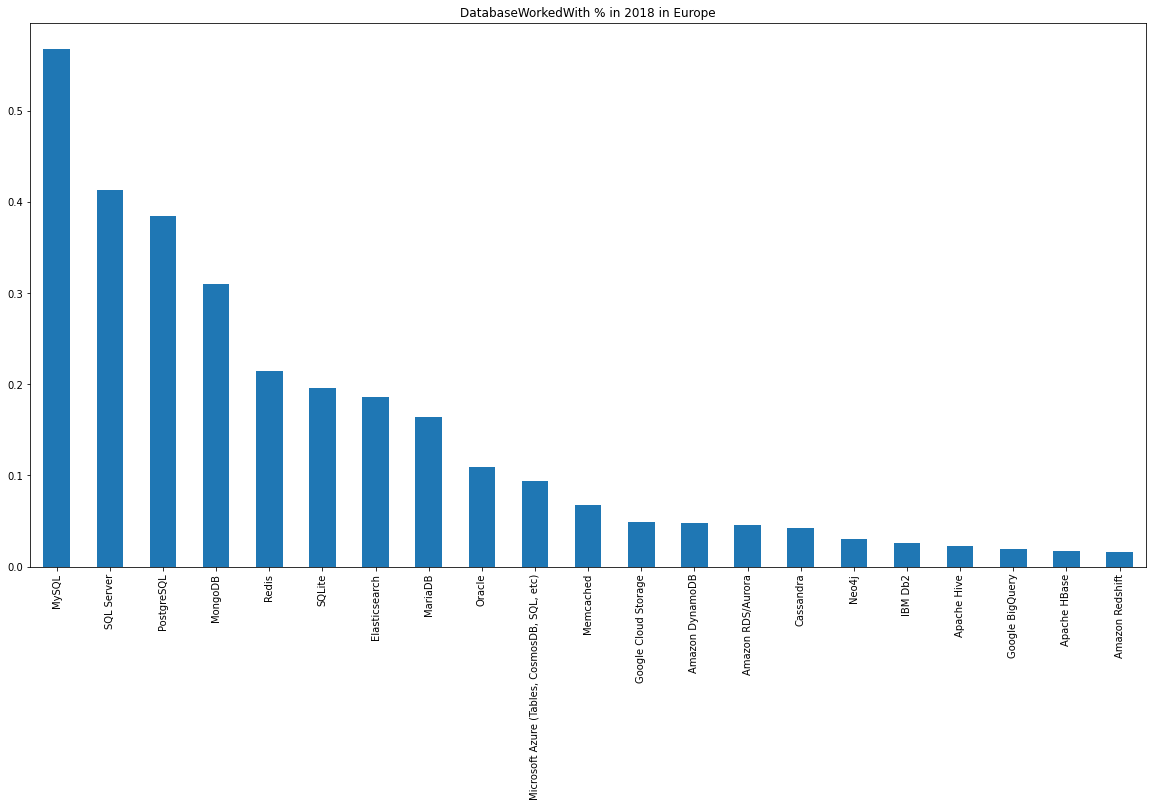

                                          catval      2018  Europe 2018  \
0                                          MySQL  0.603350     0.568418   
1                                     SQL Server  0.449744     0.412913   
2                                     PostgreSQL  0.353102     0.384669   
3                                        MongoDB  0.324354     0.310099   
4                                          Redis  0.210960     0.214293   
5                                         SQLite  0.198431     0.195571   
6                                  Elasticsearch  0.151512     0.185889   
7                                         Oracle  0.119499     0.164010   
8                                        MariaDB  0.119144     0.109500   
9   Microsoft Azure (Tables, CosmosDB, SQL, etc)  0.091212     0.093720   
10                               Amazon DynamoDB  0.073893     0.067508   
11                             Amazon RDS/Aurora  0.068995     0.048625   
12                       

(                                          catval  total_catvals
 0                                          MySQL          17000
 1                                     SQL Server          12672
 2                                     PostgreSQL           9949
 3                                        MongoDB           9139
 4                                          Redis           5944
 5                                         SQLite           5591
 6                                  Elasticsearch           4269
 7                                         Oracle           3367
 8                                        MariaDB           3357
 9   Microsoft Azure (Tables, CosmosDB, SQL, etc)           2570
 10                               Amazon DynamoDB           2082
 11                             Amazon RDS/Aurora           1944
 12                          Google Cloud Storage           1868
 13                                     Memcached           1629
 14                      

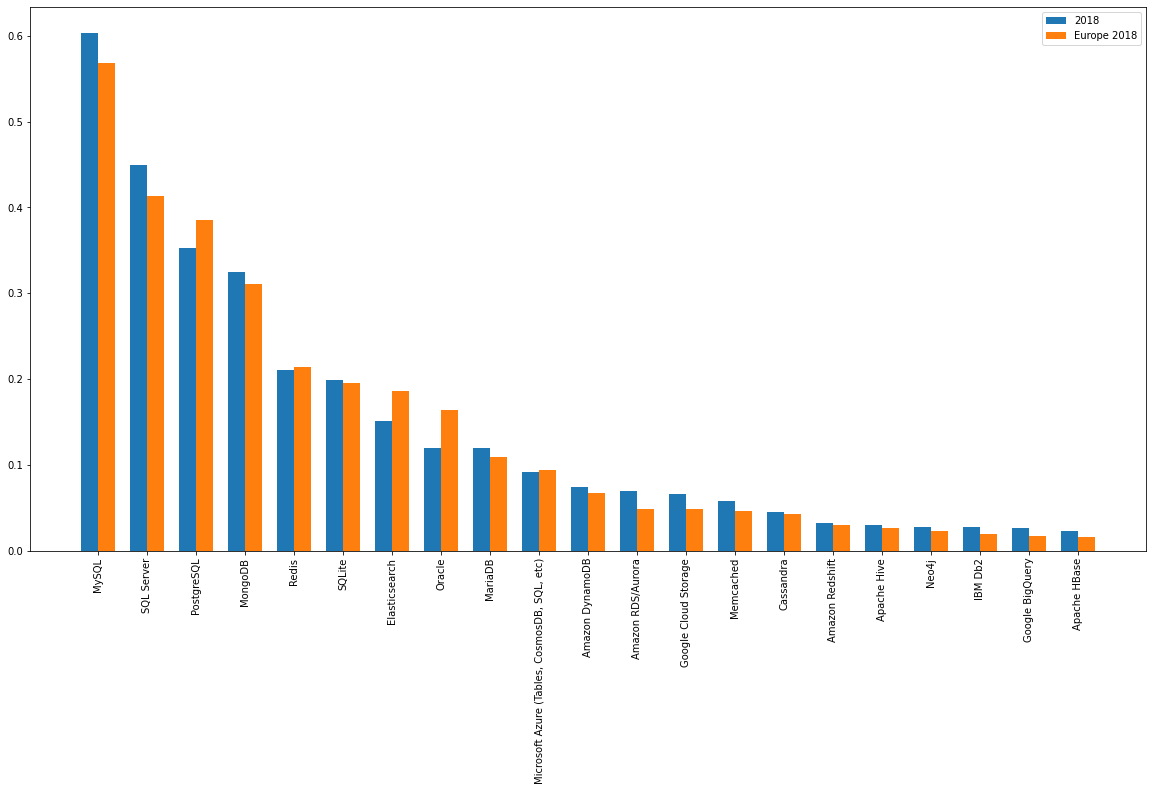

In [50]:
process_and_compare_col_global_local(df_2018, df_2018_eu, "DatabaseWorkedWith", year=2018, country="Europe")

## Process Platforms worked in 2018

processing yearly data for year 2018 and PlatformWorkedWith
null entries for PlatformWorkedWith: 2869
droping nulls of the column: PlatformWorkedWith
updated null entries for PlatformWorkedWith: 0
                              catval  total_catvals
0                              Linux          12313
1                                AWS           8615
2          Windows Desktop or Server           8479
3                            Android           7905
4                             Mac OS           5127
5                           Firebase           4721
6                          WordPress           4661
7                                iOS           4132
8                             Heroku           3872
9                       Raspberry Pi           3768
10                             Azure           3633
11  Google Cloud Platform/App Engine           2722
12                           Arduino           2671
13                        Serverless           1721
14                     

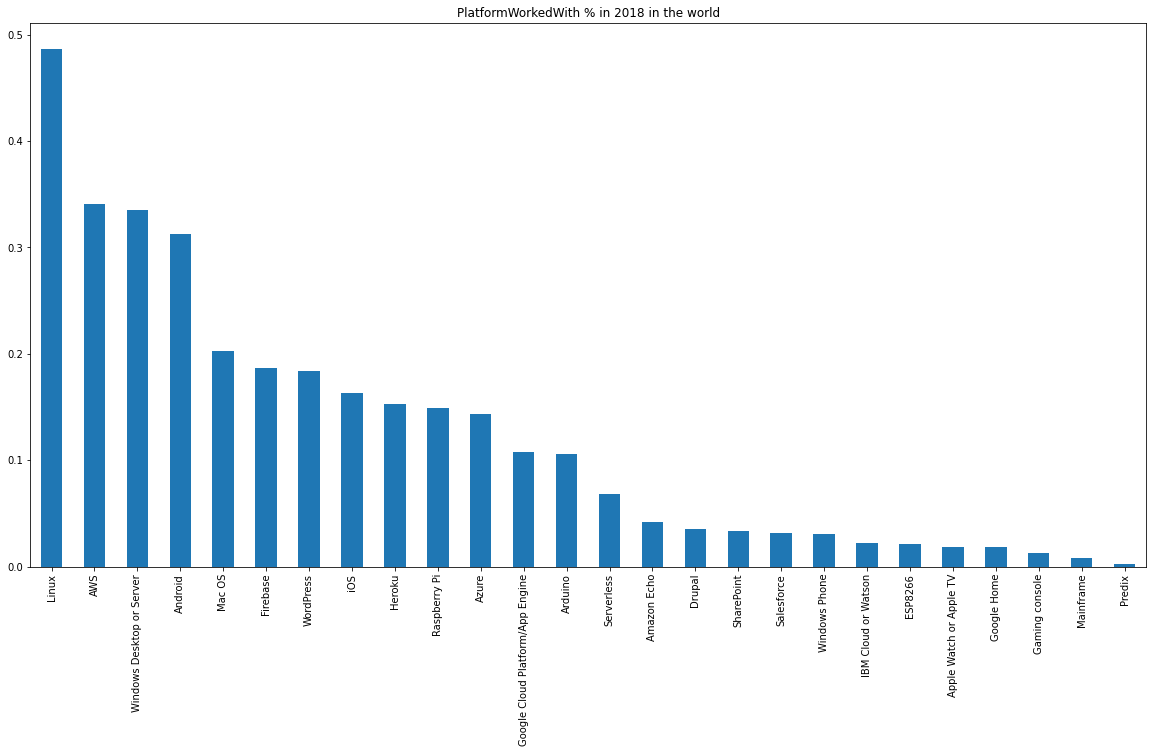

processing yearly data for year 2018 and PlatformWorkedWith in Europe
null entries for PlatformWorkedWith: 1872
droping nulls of the column: PlatformWorkedWith
updated null entries for PlatformWorkedWith: 0
                              catval  total_catvals
0                              Linux           8815
1          Windows Desktop or Server           6442
2                            Android           5134
3                                AWS           4254
4                       Raspberry Pi           3631
5                             Mac OS           3154
6                          WordPress           2807
7                                iOS           2639
8                              Azure           2502
9                           Firebase           2170
10                           Arduino           2026
11                            Heroku           1965
12  Google Cloud Platform/App Engine           1460
13                        Serverless            901
14           

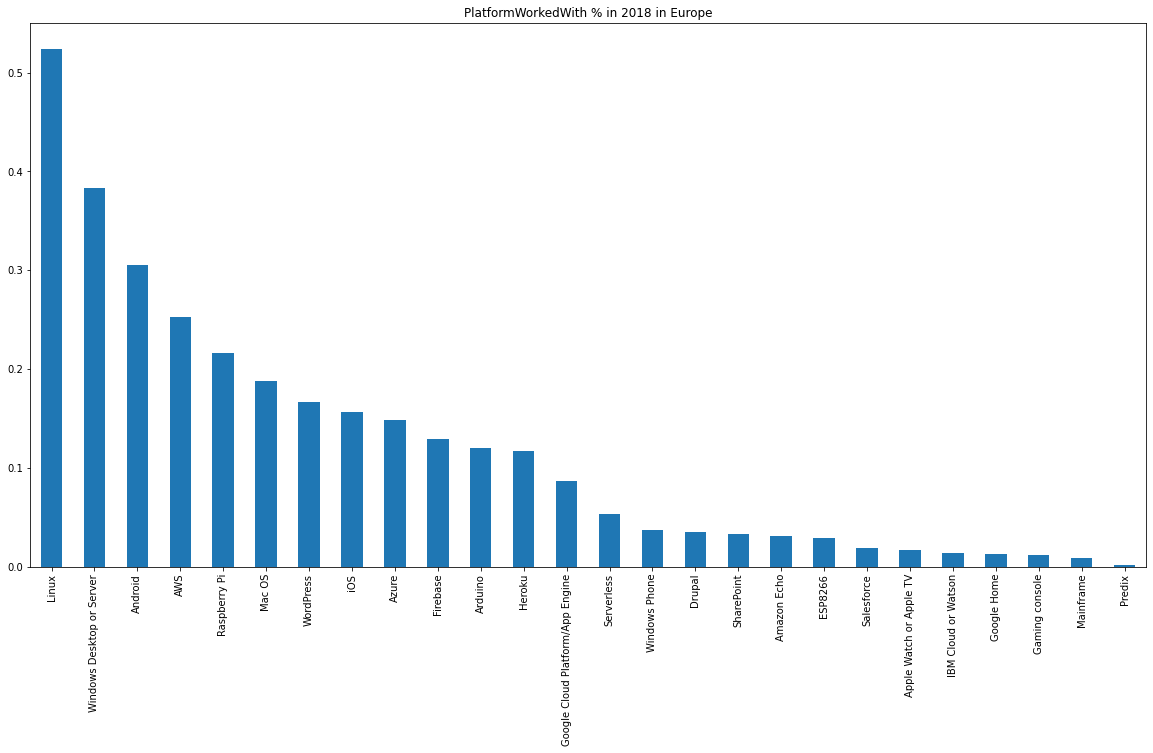

                              catval      2018  Europe 2018      diff
0                              Linux  0.486545     0.524016 -0.037471
1                                AWS  0.340420     0.382951 -0.042531
2          Windows Desktop or Server  0.335046     0.305196  0.029850
3                            Android  0.312364     0.252883  0.059481
4                             Mac OS  0.202592     0.215848 -0.013256
5                           Firebase  0.186549     0.187493 -0.000943
6                          WordPress  0.184178     0.166865  0.017313
7                                iOS  0.163275     0.156878  0.006397
8                             Heroku  0.153001     0.148734  0.004267
9                       Raspberry Pi  0.148892     0.128998  0.019894
10                             Azure  0.143557     0.120438  0.023120
11  Google Cloud Platform/App Engine  0.107559     0.116811 -0.009252
12                           Arduino  0.105544     0.086791  0.018753
13                  

(                              catval  total_catvals
 0                              Linux          12313
 1                                AWS           8615
 2          Windows Desktop or Server           8479
 3                            Android           7905
 4                             Mac OS           5127
 5                           Firebase           4721
 6                          WordPress           4661
 7                                iOS           4132
 8                             Heroku           3872
 9                       Raspberry Pi           3768
 10                             Azure           3633
 11  Google Cloud Platform/App Engine           2722
 12                           Arduino           2671
 13                        Serverless           1721
 14                       Amazon Echo           1048
 15                            Drupal            897
 16                        SharePoint            834
 17                        Salesforce         

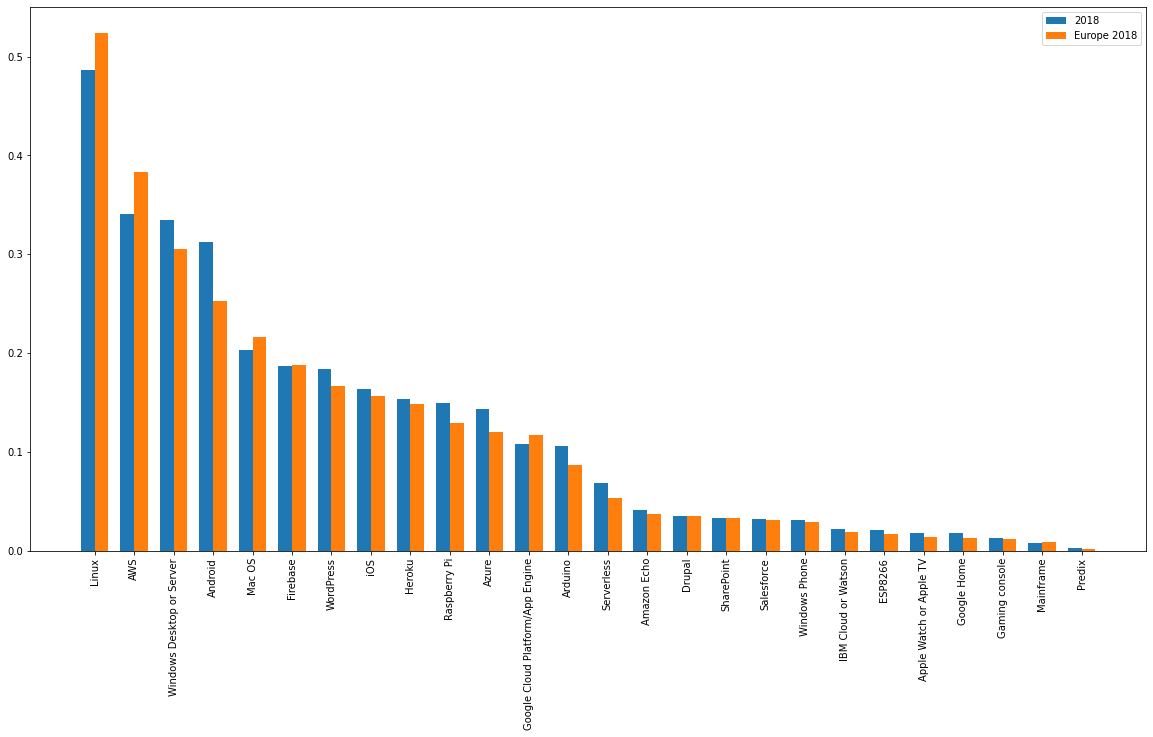

In [52]:
process_and_compare_col_global_local(df_2018, df_2018_eu, "PlatformWorkedWith", year=2018, country="Europe")

# Process 2019 Data

In [53]:
df_2019, df_2019_eu, cols_intersect = process_yearly_data(so_survey_results_2019, 2019, 'Europe', cols_intersect)

processing data for year 2019 from ./data/developer_survey_2019/survey_results_public.csv
original data shape:  (88883, 85)
original data shape + year:  (88883, 86)
country specific data shape:  (36468, 86)
old column index:  ['Respondent', 'Country', 'FormalEducation', 'CompanySize', 'CareerSatisfaction', 'JobSatisfaction', 'LastNewJob', 'Currency', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'IDE', 'Methodology', 'VersionControl', 'CheckInCode', 'Gender', 'Salary']
old columns index len:  17
new columns index len:  86
new column index:  ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 

processing yearly data for year 2019 and DevType
null entries for DevType: 4456
droping nulls of the column: DevType
updated null entries for DevType: 0
                                           catval  total_catvals
0                           Developer, full-stack          25584
1                             Developer, back-end          23495
2                            Developer, front-end          16379
3   Developer, desktop or enterprise applications           9905
4                               Developer, mobile           9257
5                                         Student           7307
6                                        Designer           6111
7                          Database administrator           5749
8                            System administrator           5031
9                               DevOps specialist           4802
10    Developer, embedded applications or devices           4142
11                       Data or business analyst           4091
12

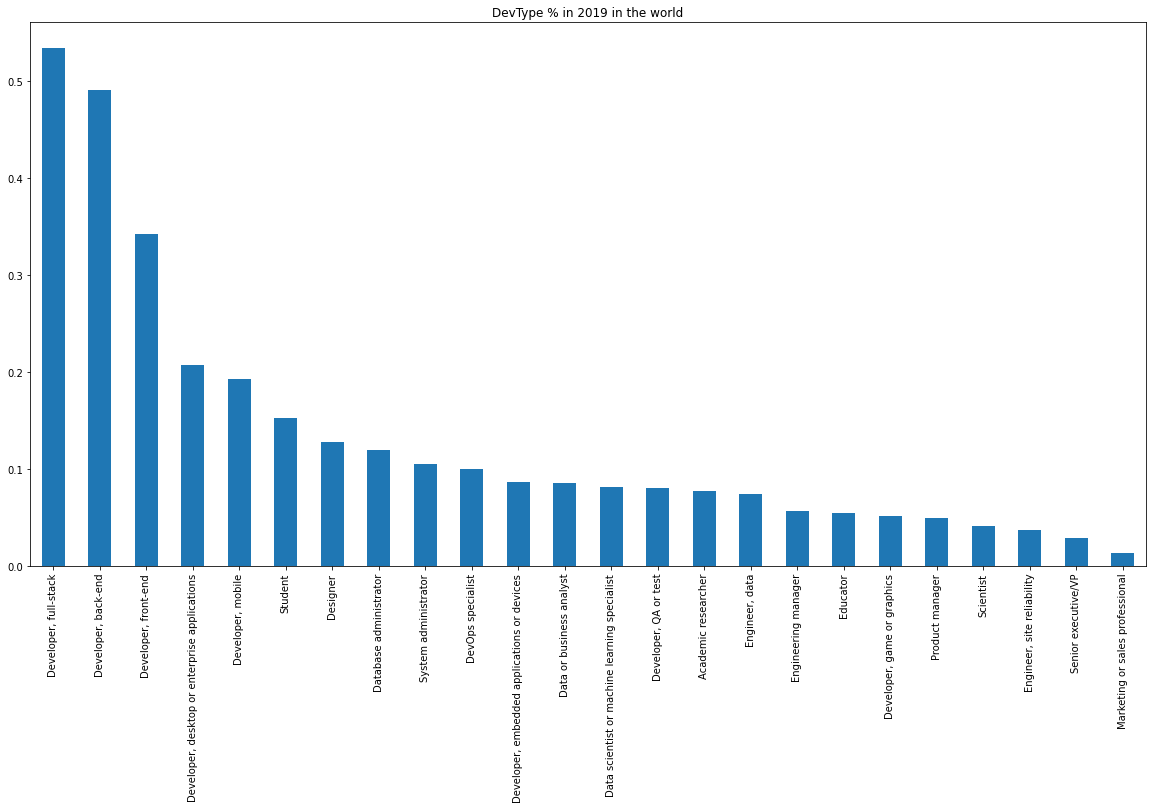

processing yearly data for year 2019 and DevType in Europe
null entries for DevType: 3092
droping nulls of the column: DevType
updated null entries for DevType: 0
                                           catval  total_catvals
0                             Developer, back-end          17170
1                           Developer, full-stack          16638
2                            Developer, front-end          10270
3   Developer, desktop or enterprise applications           7411
4                               Developer, mobile           5441
5                                         Student           4614
6                               DevOps specialist           4060
7                            System administrator           3898
8                          Database administrator           3771
9     Developer, embedded applications or devices           3106
10                                       Designer           3071
11  Data scientist or machine learning specialist        

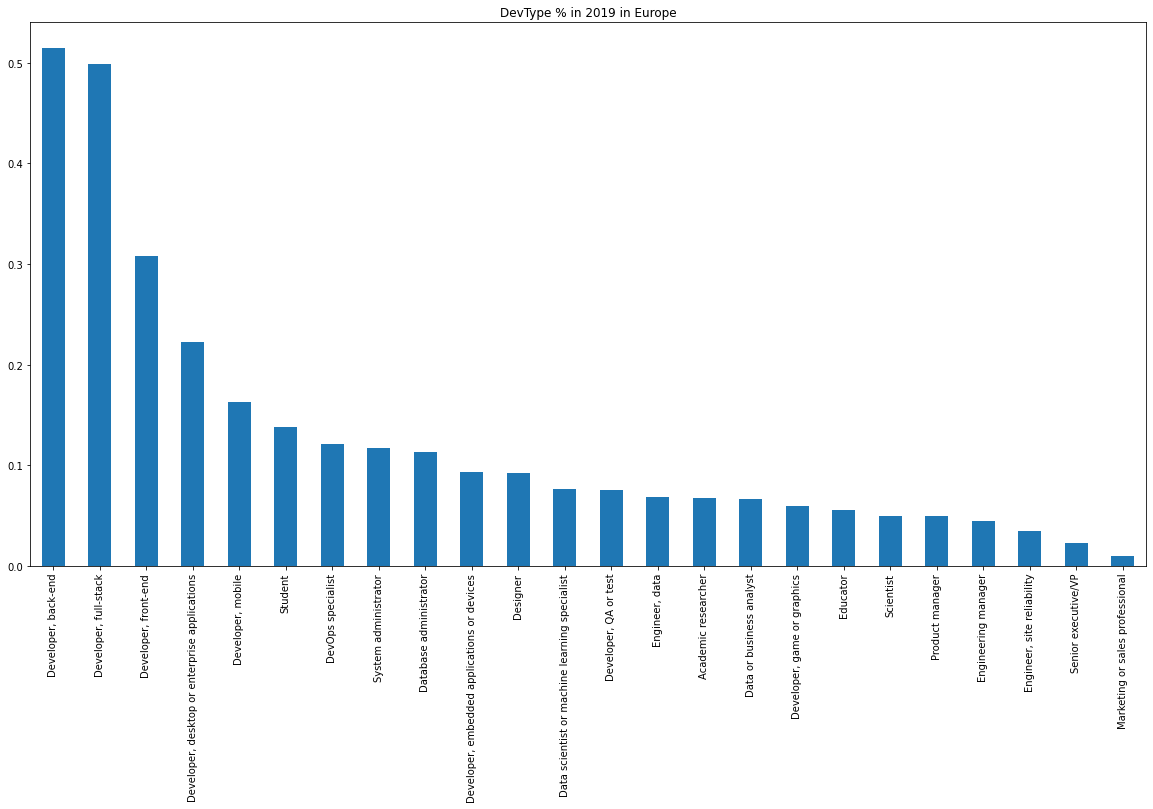

                                           catval      2019  Europe 2019  \
0                           Developer, full-stack  0.533456     0.514442   
1                             Developer, back-end  0.489898     0.498502   
2                            Developer, front-end  0.341521     0.307706   
3   Developer, desktop or enterprise applications  0.206531     0.222046   
4                               Developer, mobile  0.193019     0.163021   
5                                         Student  0.152359     0.138243   
6                                        Designer  0.127421     0.121644   
7                          Database administrator  0.119873     0.116791   
8                            System administrator  0.104902     0.112985   
9                               DevOps specialist  0.100127     0.093061   
10    Developer, embedded applications or devices  0.086365     0.092012   
11                       Data or business analyst  0.085302     0.076762   
12  Data sci

(                                           catval  total_catvals
 0                           Developer, full-stack          25584
 1                             Developer, back-end          23495
 2                            Developer, front-end          16379
 3   Developer, desktop or enterprise applications           9905
 4                               Developer, mobile           9257
 5                                         Student           7307
 6                                        Designer           6111
 7                          Database administrator           5749
 8                            System administrator           5031
 9                               DevOps specialist           4802
 10    Developer, embedded applications or devices           4142
 11                       Data or business analyst           4091
 12  Data scientist or machine learning specialist           3898
 13                          Developer, QA or test           3846
 14       

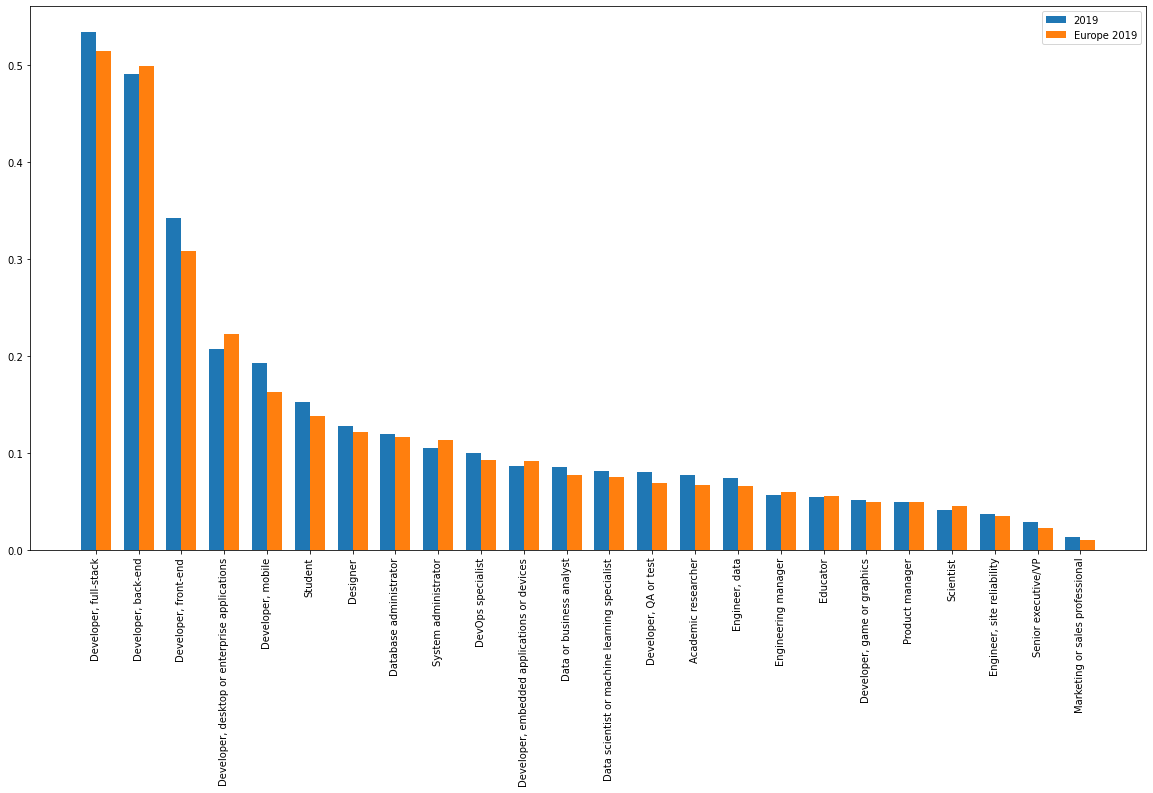

In [54]:
process_and_compare_col_global_local(df_2019, df_2019_eu, "DevType", year=2019, country="Europe")

processing yearly data for year 2019 and LanguageWorkedWith
null entries for LanguageWorkedWith: 573
droping nulls of the column: LanguageWorkedWith
updated null entries for LanguageWorkedWith: 0
                   catval  total_catvals
0              JavaScript          33435
1                HTML/CSS          31063
2                     SQL          26883
3                  Python          19622
4                    Java          19382
5   Bash/Shell/PowerShell          16716
6                      C#          14510
7                     PHP          12512
8                     C++          10616
9              TypeScript          10335
10                      C           9581
11                   Ruby           4570
12                     Go           4091
13              Other(s):           3989
14                  Swift           3374
15                      R           2909
16                 Kotlin           2900
17               Assembly           2881
18                    VBA

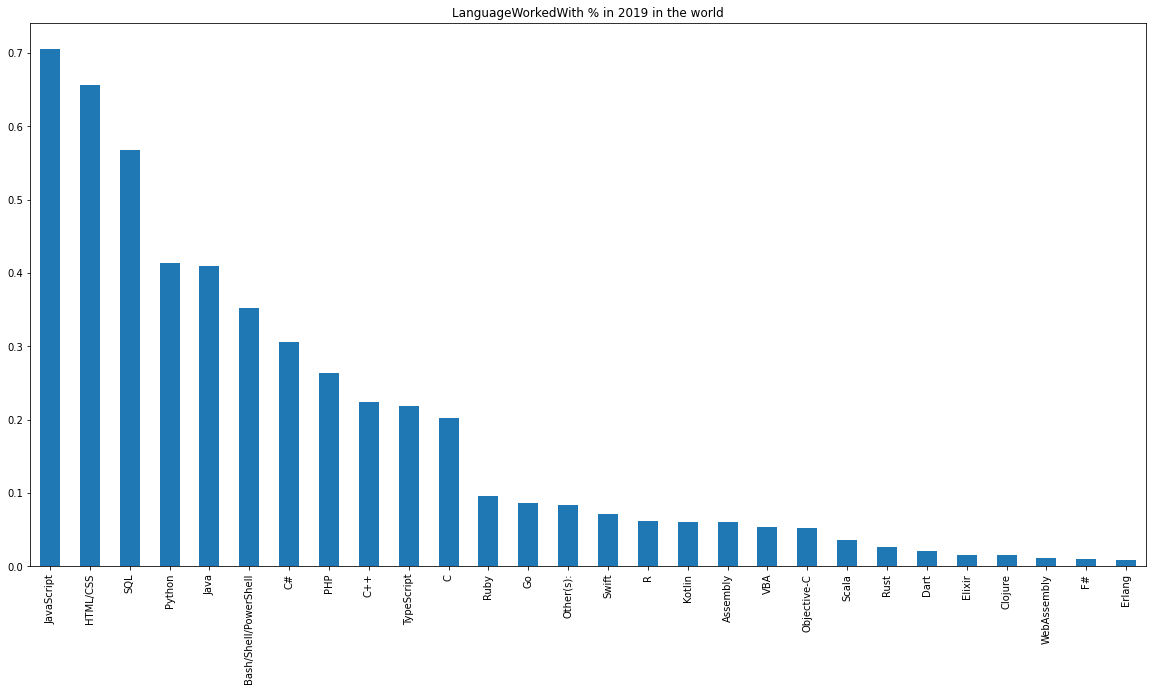

processing yearly data for year 2019 and LanguageWorkedWith in Europe
null entries for LanguageWorkedWith: 230
droping nulls of the column: LanguageWorkedWith
updated null entries for LanguageWorkedWith: 0
                   catval  total_catvals
0              JavaScript          21966
1                HTML/CSS          20259
2                     SQL          18040
3                    Java          13311
4                  Python          12965
5   Bash/Shell/PowerShell          12957
6                      C#          10778
7                     PHP           8757
8              TypeScript           7531
9                     C++           7265
10                      C           5979
11              Other(s):           3151
12                     Go           2658
13                   Ruby           2352
14                 Kotlin           2334
15                  Swift           1962
16               Assembly           1932
17                    VBA           1798
18             

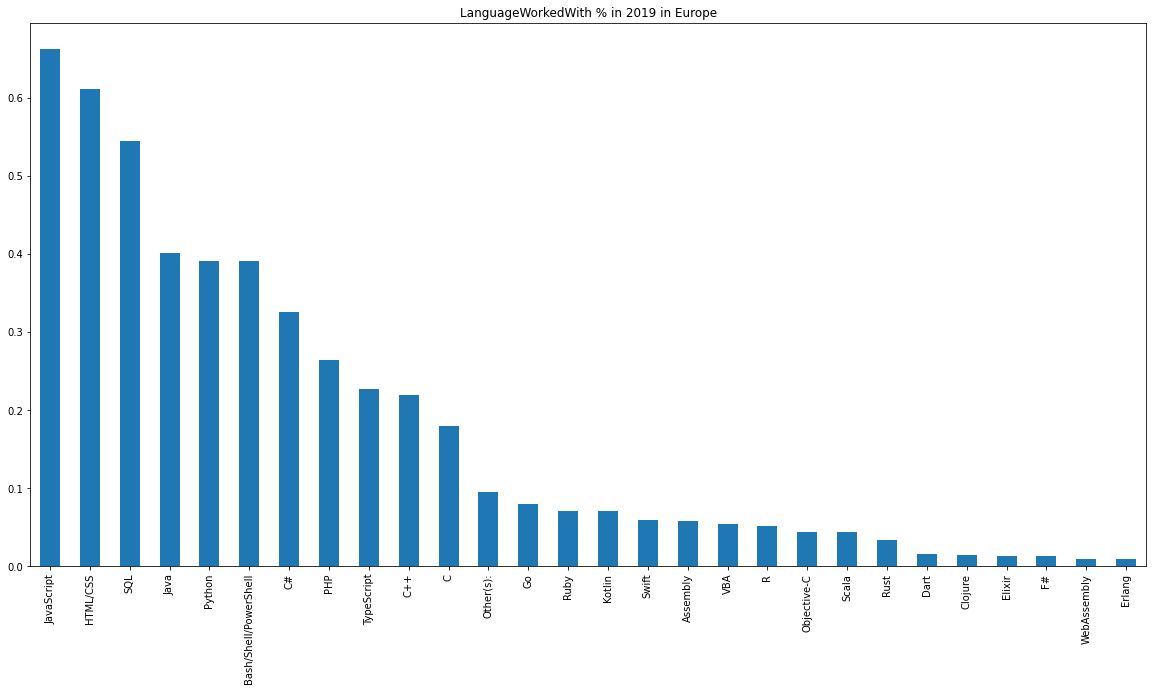

                   catval      2019  Europe 2019      diff
0              JavaScript  0.705588     0.662704  0.042884
1                HTML/CSS  0.655531     0.611205  0.044326
2                     SQL  0.567319     0.544259  0.023061
3                  Python  0.414089     0.401587  0.012502
4                    Java  0.409024     0.391148  0.017876
5   Bash/Shell/PowerShell  0.352762     0.390907 -0.038144
6                      C#  0.306209     0.325167 -0.018959
7                     PHP  0.264044     0.264195 -0.000151
8                     C++  0.224032     0.227207 -0.003174
9              TypeScript  0.218102     0.219182 -0.001079
10                      C  0.202191     0.180384  0.021807
11                   Ruby  0.096442     0.095064  0.001378
12                     Go  0.086334     0.080191  0.006143
13              Other(s):  0.084181     0.070959  0.013222
14                  Swift  0.071202     0.070416  0.000787
15                      R  0.061389     0.059193  0.0021

(                   catval  total_catvals
 0              JavaScript          33435
 1                HTML/CSS          31063
 2                     SQL          26883
 3                  Python          19622
 4                    Java          19382
 5   Bash/Shell/PowerShell          16716
 6                      C#          14510
 7                     PHP          12512
 8                     C++          10616
 9              TypeScript          10335
 10                      C           9581
 11                   Ruby           4570
 12                     Go           4091
 13              Other(s):           3989
 14                  Swift           3374
 15                      R           2909
 16                 Kotlin           2900
 17               Assembly           2881
 18                    VBA           2566
 19            Objective-C           2492
 20                  Scala           1694
 21                   Rust           1286
 22                   Dart        

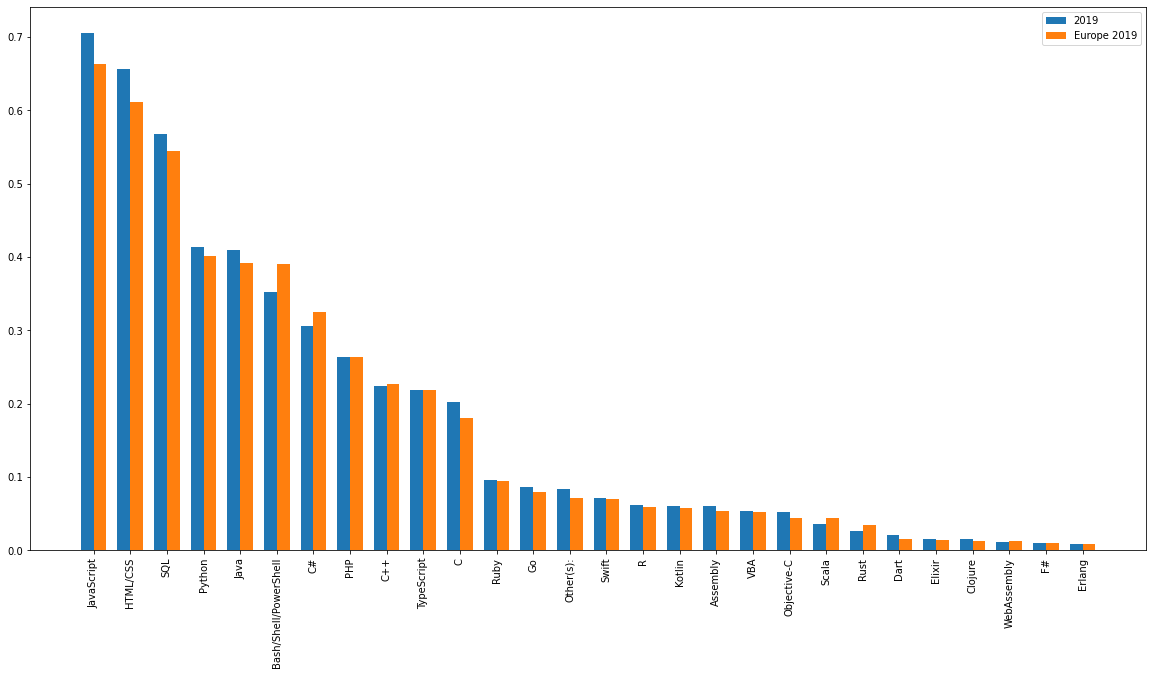

In [55]:
process_and_compare_col_global_local(df_2019, df_2019_eu, "LanguageWorkedWith", year=2019, country="Europe")

processing yearly data for year 2019 and WebFrameWorkedWith
null entries for WebFrameWorkedWith: 10778
droping nulls of the column: WebFrameWorkedWith
updated null entries for WebFrameWorkedWith: 0
                catval  total_catvals
0               jQuery          18116
1             React.js          11945
2   Angular/Angular.js          11507
3              ASP.NET           9714
4              Express           7726
5               Spring           5494
6               Vue.js           5285
7               Django           4863
8                Flask           4502
9              Laravel           4191
10       Ruby on Rails           3431
11           Other(s):           2499
12              Drupal           1256


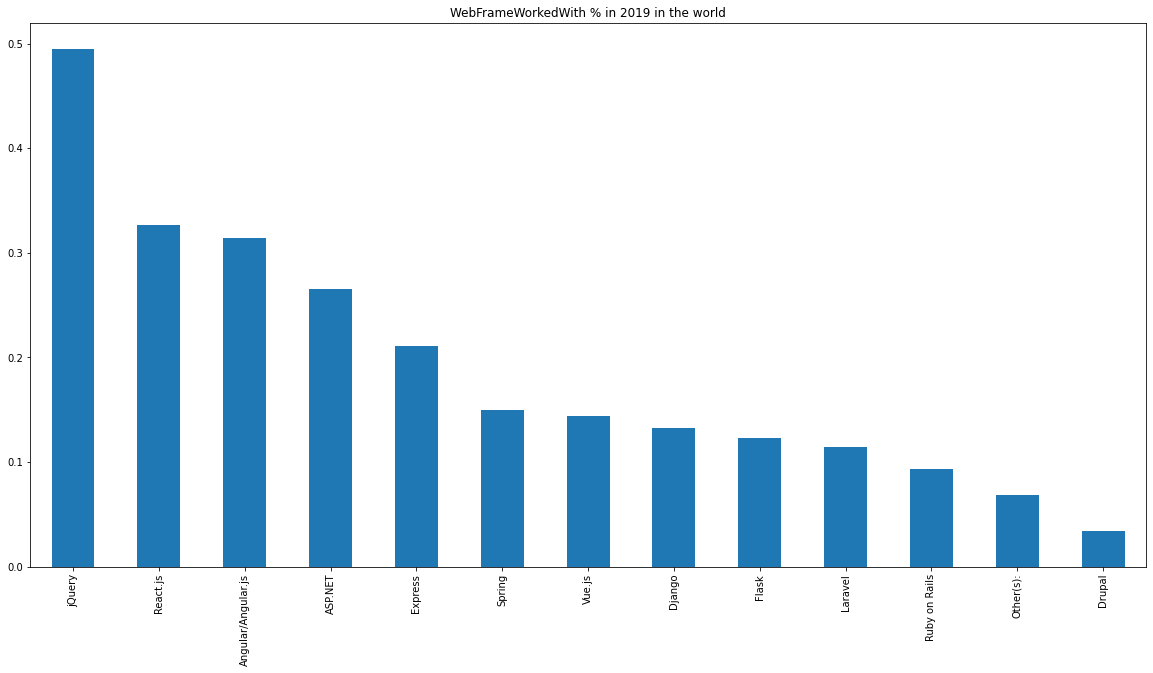

processing yearly data for year 2019 and WebFrameWorkedWith in Europe
null entries for WebFrameWorkedWith: 8494
droping nulls of the column: WebFrameWorkedWith
updated null entries for WebFrameWorkedWith: 0
                catval  total_catvals
0               jQuery          11072
1   Angular/Angular.js           7314
2             React.js           7065
3              ASP.NET           6269
4               Spring           4453
5              Express           4076
6               Vue.js           3898
7               Django           2750
8                Flask           2598
9            Other(s):           2444
10             Laravel           2134
11       Ruby on Rails           1515
12              Drupal            812


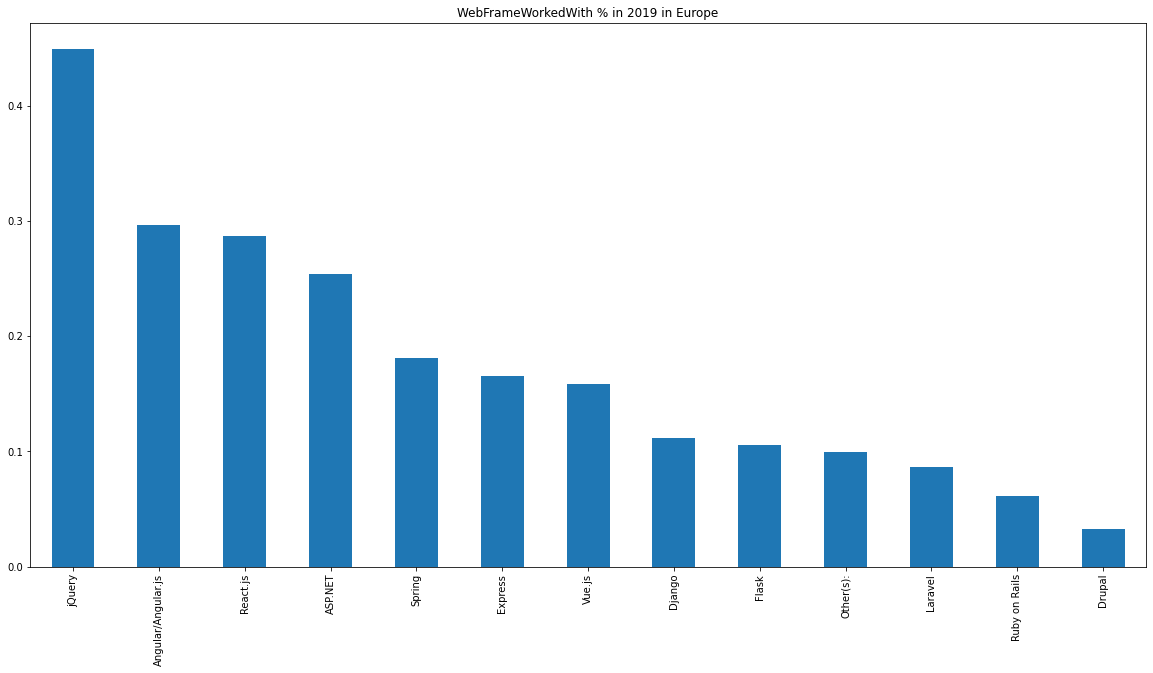

                catval      2019  Europe 2019      diff
0               jQuery  0.494865     0.449132  0.045733
1             React.js  0.326295     0.296690  0.029605
2   Angular/Angular.js  0.314330     0.286589  0.027741
3              ASP.NET  0.265352     0.254300  0.011052
4              Express  0.211047     0.180634  0.030412
5               Spring  0.150076     0.165342 -0.015265
6               Vue.js  0.144367     0.158121 -0.013754
7               Django  0.132840     0.111553  0.021287
8                Flask  0.122979     0.105387  0.017592
9              Laravel  0.114483     0.099140  0.015343
10       Ruby on Rails  0.093723     0.086565  0.007158
11           Other(s):  0.068264     0.061455  0.006808
12              Drupal  0.034309     0.032939  0.001371


(                catval  total_catvals
 0               jQuery          18116
 1             React.js          11945
 2   Angular/Angular.js          11507
 3              ASP.NET           9714
 4              Express           7726
 5               Spring           5494
 6               Vue.js           5285
 7               Django           4863
 8                Flask           4502
 9              Laravel           4191
 10       Ruby on Rails           3431
 11           Other(s):           2499
 12              Drupal           1256,                 catval  total_catvals
 0               jQuery          11072
 1   Angular/Angular.js           7314
 2             React.js           7065
 3              ASP.NET           6269
 4               Spring           4453
 5              Express           4076
 6               Vue.js           3898
 7               Django           2750
 8                Flask           2598
 9            Other(s):           2444
 10             Laravel  

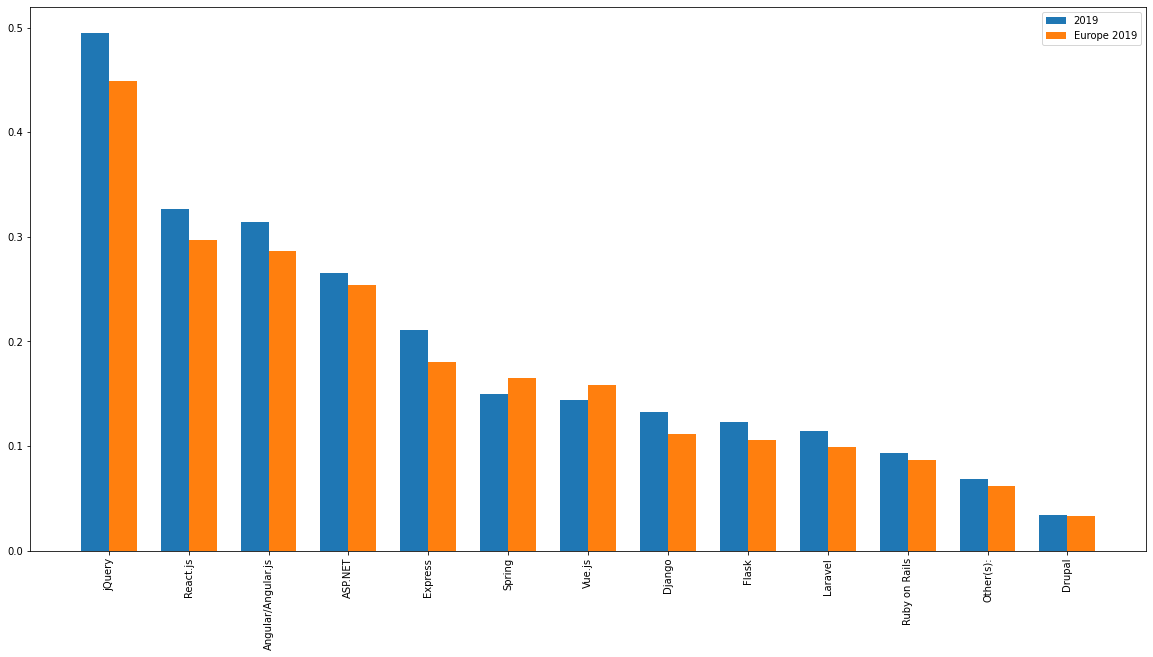

In [57]:
process_and_compare_col_global_local(df_2019, df_2019_eu, "WebFrameWorkedWith", year=2019, country="Europe")

processing yearly data for year 2019 and PlatformWorkedWith
null entries for PlatformWorkedWith: 1972
droping nulls of the column: PlatformWorkedWith
updated null entries for PlatformWorkedWith: 0
                   catval  total_catvals
0                   Linux          17529
1                 Windows          16515
2                     AWS          11813
3                  Docker          11210
4                 Android           9104
5                   Slack           8384
6                   MacOS           8273
7               WordPress           5998
8                  Heroku           5022
9   Google Cloud Platform           5019
10        Microsoft Azure           4867
11           Raspberry Pi           4419
12                    iOS           4334
13                Arduino           3190
14             Kubernetes           3121
15              Other(s):           1042
16    IBM Cloud or Watson            806


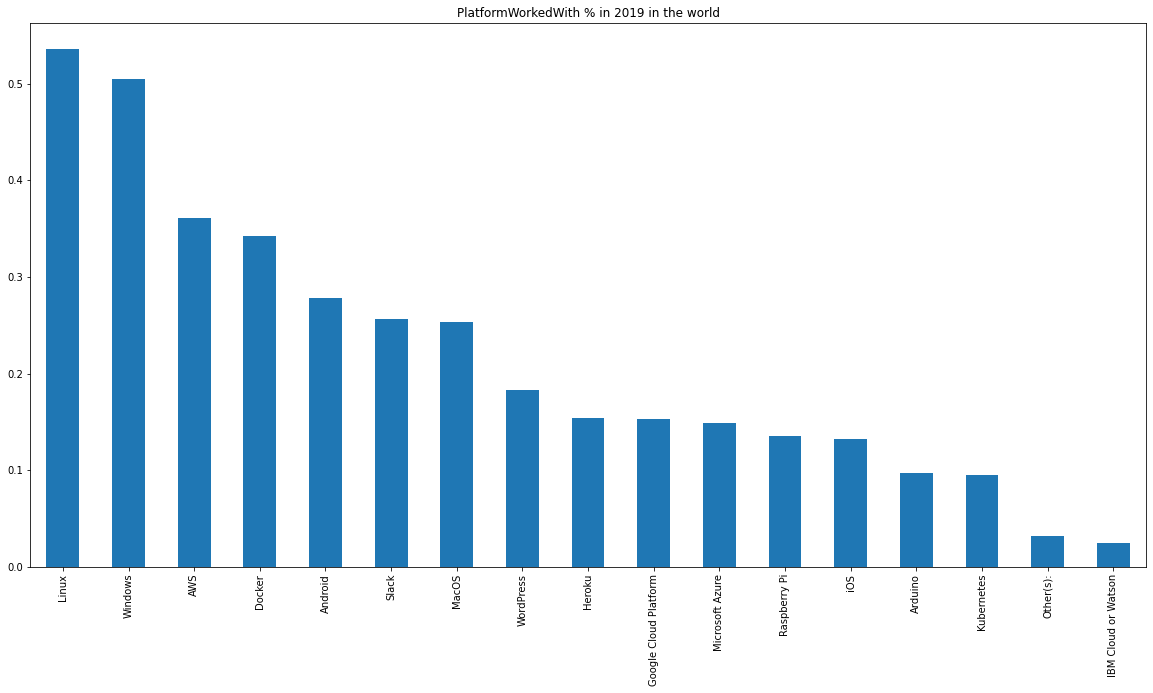

processing yearly data for year 2019 and PlatformWorkedWith in Europe
null entries for PlatformWorkedWith: 1138
droping nulls of the column: PlatformWorkedWith
updated null entries for PlatformWorkedWith: 0
                   catval  total_catvals
0                   Linux          12508
1                 Windows          11526
2                  Docker           9499
3                     AWS           5966
4                 Android           5657
5                   Slack           5409
6                   MacOS           5134
7            Raspberry Pi           4069
8               WordPress           3537
9         Microsoft Azure           3299
10  Google Cloud Platform           2817
11                    iOS           2747
12             Kubernetes           2517
13                 Heroku           2435
14                Arduino           2291
15              Other(s):            704
16    IBM Cloud or Watson            330


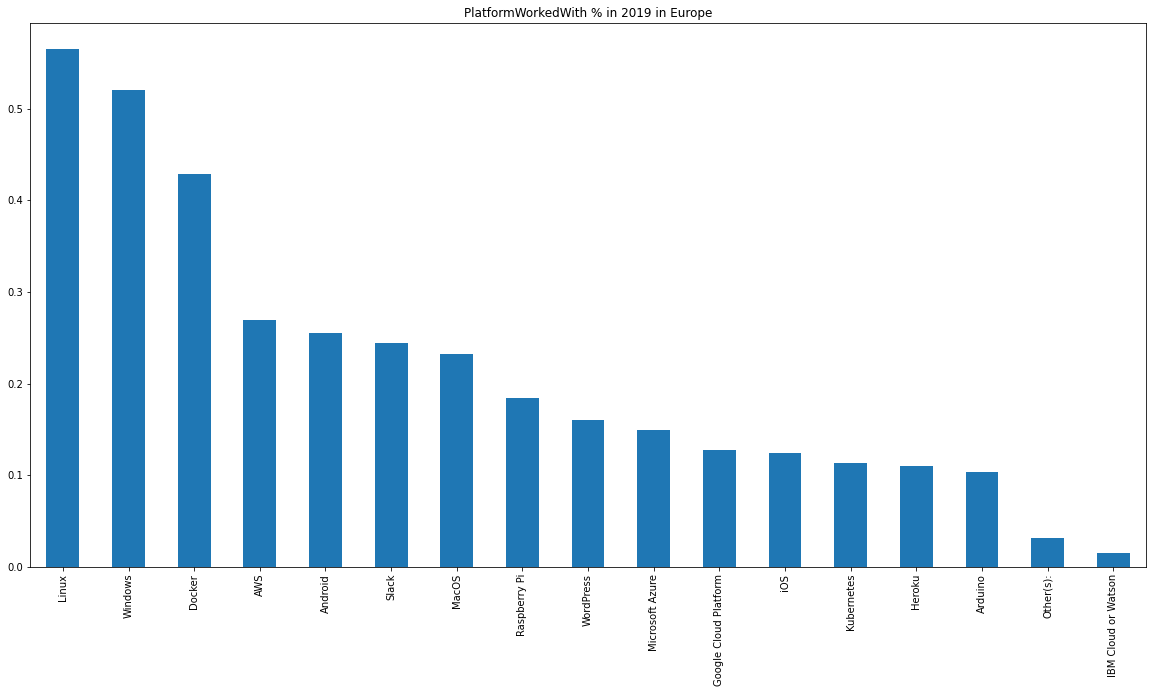

                   catval      2019  Europe 2019      diff
0                   Linux  0.536071     0.565103 -0.029032
1                 Windows  0.505061     0.520737 -0.015676
2                     AWS  0.361265     0.429159 -0.067894
3                  Docker  0.342824     0.269540  0.073284
4                 Android  0.278418     0.255580  0.022839
5                   Slack  0.256399     0.244375  0.012024
6                   MacOS  0.253005     0.231951  0.021054
7               WordPress  0.183431     0.183835 -0.000404
8                  Heroku  0.153583     0.159799 -0.006217
9   Google Cloud Platform  0.153491     0.149047  0.004444
10        Microsoft Azure  0.148842     0.127270  0.021572
11           Raspberry Pi  0.135142     0.124108  0.011034
12                    iOS  0.132542     0.113716  0.018826
13                Arduino  0.097557     0.110012 -0.012455
14             Kubernetes  0.095446     0.103506 -0.008060
15              Other(s):  0.031866     0.031806  0.0000

(                   catval  total_catvals
 0                   Linux          17529
 1                 Windows          16515
 2                     AWS          11813
 3                  Docker          11210
 4                 Android           9104
 5                   Slack           8384
 6                   MacOS           8273
 7               WordPress           5998
 8                  Heroku           5022
 9   Google Cloud Platform           5019
 10        Microsoft Azure           4867
 11           Raspberry Pi           4419
 12                    iOS           4334
 13                Arduino           3190
 14             Kubernetes           3121
 15              Other(s):           1042
 16    IBM Cloud or Watson            806,
                    catval  total_catvals
 0                   Linux          12508
 1                 Windows          11526
 2                  Docker           9499
 3                     AWS           5966
 4                 Android       

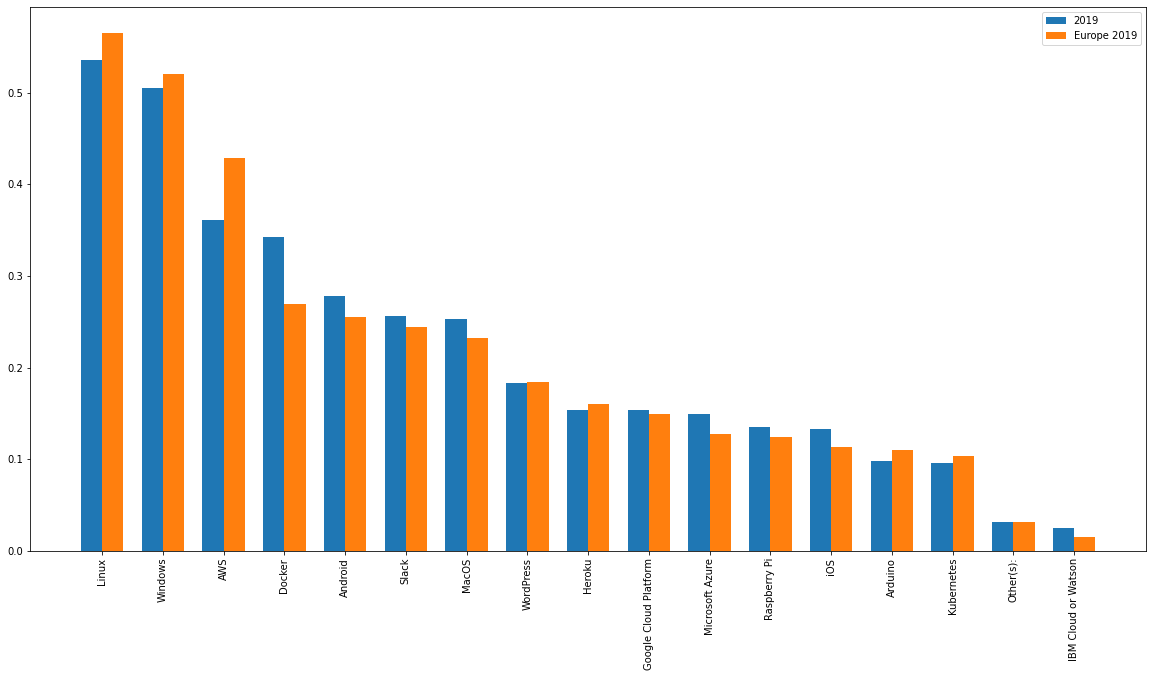

In [59]:
process_and_compare_col_global_local(df_2019, df_2019_eu, "PlatformWorkedWith", year=2019, country="Europe")

processing yearly data for year 2019 and MiscTechWorkedWith
null entries for MiscTechWorkedWith: 7046
droping nulls of the column: MiscTechWorkedWith
updated null entries for MiscTechWorkedWith: 0
           catval  total_catvals
0         Node.js          14811
1            .NET           9743
2       .NET Core           6352
3    React Native           3473
4          Pandas           3060
5      TensorFlow           2408
6        Unity 3D           2330
7         Cordova           2243
8         Ansible           2166
9         Xamarin           1753
10   Apache Spark           1548
11         Hadoop           1318
12        Flutter            983
13      Other(s):            864
14           Chef            836
15  Torch/PyTorch            801
16  Unreal Engine            681
17         Puppet            680
18      CryEngine            127


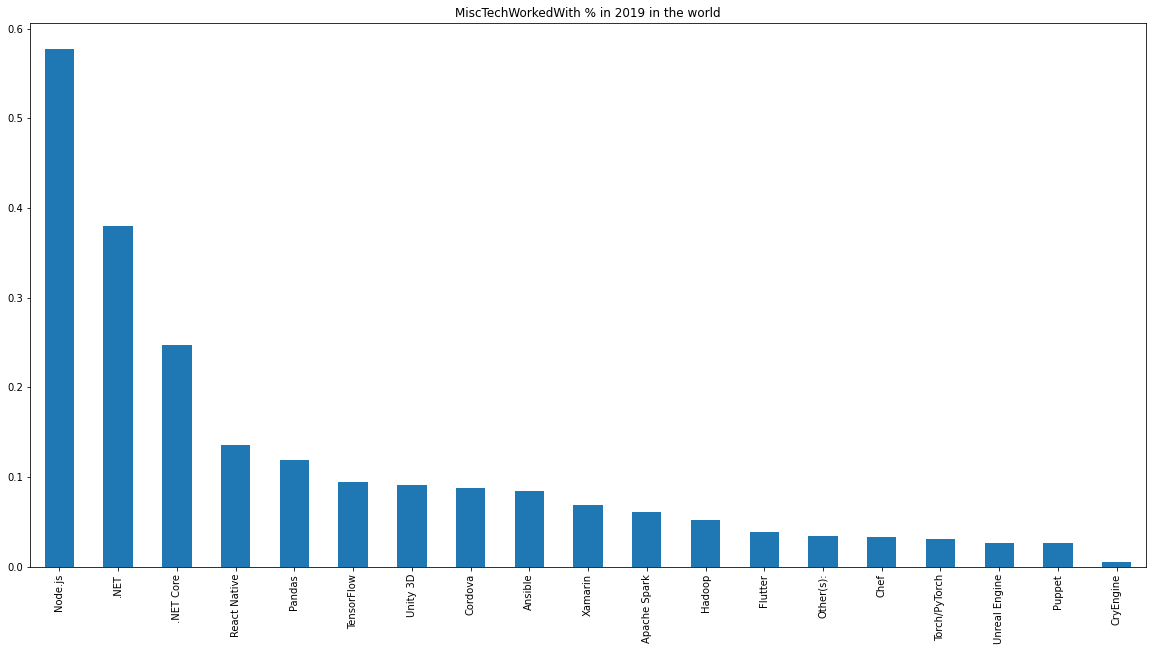

processing yearly data for year 2019 and MiscTechWorkedWith in Europe
null entries for MiscTechWorkedWith: 5072
droping nulls of the column: MiscTechWorkedWith
updated null entries for MiscTechWorkedWith: 0
           catval  total_catvals
0         Node.js           9199
1            .NET           6773
2       .NET Core           4941
3         Ansible           2090
4        Unity 3D           1743
5    React Native           1719
6          Pandas           1660
7      TensorFlow           1464
8         Cordova           1393
9         Xamarin           1218
10   Apache Spark            820
11      Other(s):            721
12         Hadoop            669
13         Puppet            554
14  Unreal Engine            523
15        Flutter            466
16  Torch/PyTorch            380
17           Chef            320
18      CryEngine             89


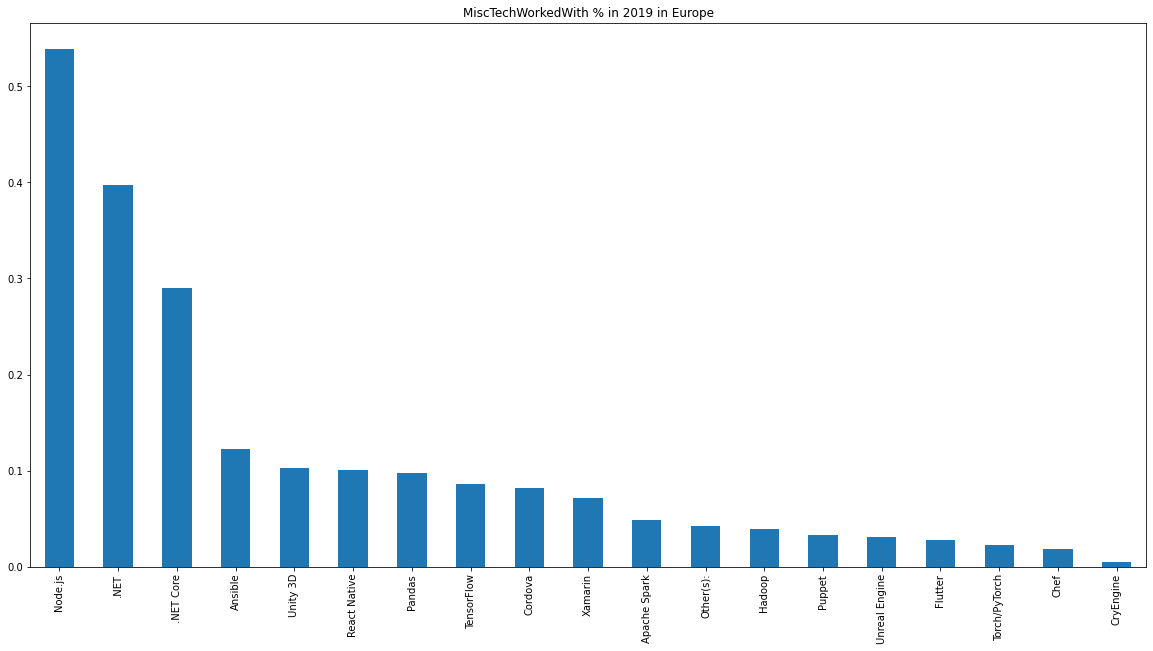

           catval      2019  Europe 2019      diff
0         Node.js  0.577359     0.539151  0.038208
1            .NET  0.379800     0.396964 -0.017164
2       .NET Core  0.247612     0.289591 -0.041979
3    React Native  0.135384     0.122494  0.012889
4          Pandas  0.119284     0.102157  0.017127
5      TensorFlow  0.093868     0.100750 -0.006882
6        Unity 3D  0.090828     0.097292 -0.006465
7         Cordova  0.087436     0.085805  0.001631
8         Ansible  0.084435     0.081643  0.002791
9         Xamarin  0.068335     0.071387 -0.003052
10   Apache Spark  0.060344     0.048060  0.012284
11         Hadoop  0.051378     0.042258  0.009120
12        Flutter  0.038319     0.039210 -0.000891
13      Other(s):  0.033680     0.032470  0.001210
14           Chef  0.032589     0.030653  0.001936
15  Torch/PyTorch  0.031224     0.027312  0.003912
16  Unreal Engine  0.026547     0.022272  0.004275
17         Puppet  0.026508     0.018755  0.007752
18      CryEngine  0.004951    

(           catval  total_catvals
 0         Node.js          14811
 1            .NET           9743
 2       .NET Core           6352
 3    React Native           3473
 4          Pandas           3060
 5      TensorFlow           2408
 6        Unity 3D           2330
 7         Cordova           2243
 8         Ansible           2166
 9         Xamarin           1753
 10   Apache Spark           1548
 11         Hadoop           1318
 12        Flutter            983
 13      Other(s):            864
 14           Chef            836
 15  Torch/PyTorch            801
 16  Unreal Engine            681
 17         Puppet            680
 18      CryEngine            127,            catval  total_catvals
 0         Node.js           9199
 1            .NET           6773
 2       .NET Core           4941
 3         Ansible           2090
 4        Unity 3D           1743
 5    React Native           1719
 6          Pandas           1660
 7      TensorFlow           1464
 8         Cor

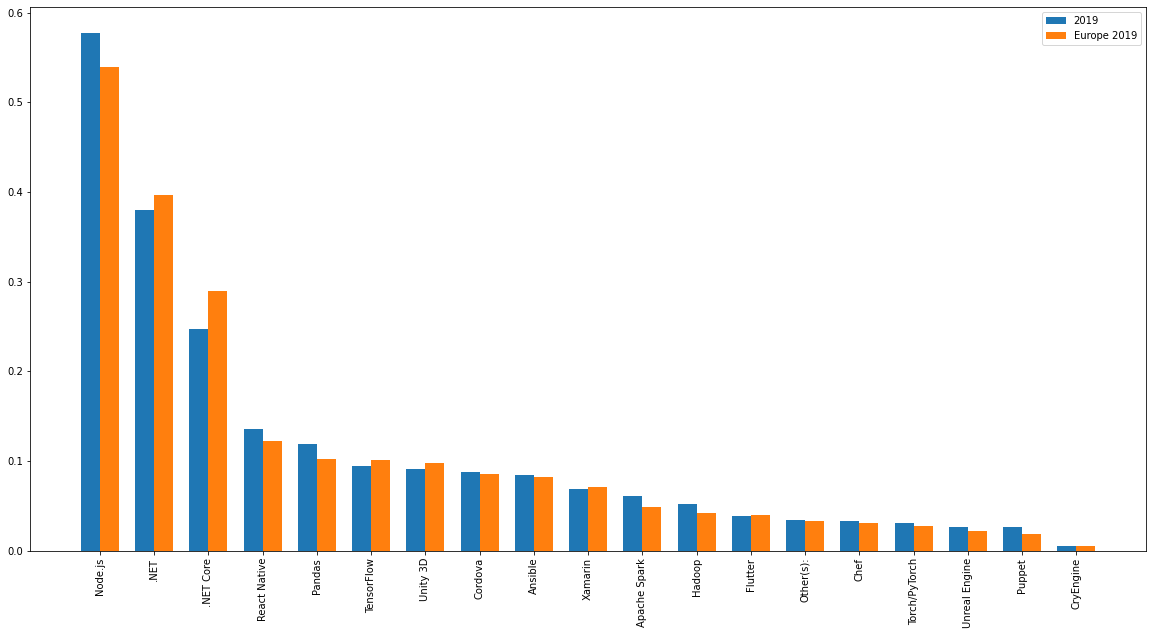

In [60]:
process_and_compare_col_global_local(df_2019, df_2019_eu, "MiscTechWorkedWith", year=2019, country="Europe")

# Process 2020 Data

In [61]:
df_2020, df_2020_eu, cols_intersect = process_yearly_data(so_survey_results_2020, 2020, 'Europe', cols_intersect)

processing data for year 2020 from ./data/developer_survey_2020/survey_results_public.csv
original data shape:  (64461, 61)
original data shape + year:  (64461, 62)
country specific data shape:  (25201, 62)
old column index:  ['Respondent', 'Country', 'Gender']
old columns index len:  3
new columns index len:  62
new column index:  ['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck

processing yearly data for year 2020 and DevType
null entries for DevType: 10153
droping nulls of the column: DevType
updated null entries for DevType: 0
                                           catval  total_catvals
0                           Developer, full-stack          16376
1                             Developer, back-end          15803
2                            Developer, front-end          11396
3   Developer, desktop or enterprise applications           6786
4                               Developer, mobile           6104
5                                        Designer           3563
6                          Database administrator           3490
7                               DevOps specialist           3219
8                            System administrator           2895
9     Developer, embedded applications or devices           2733
10                       Data or business analyst           2670
11  Data scientist or machine learning specialist           2440
1

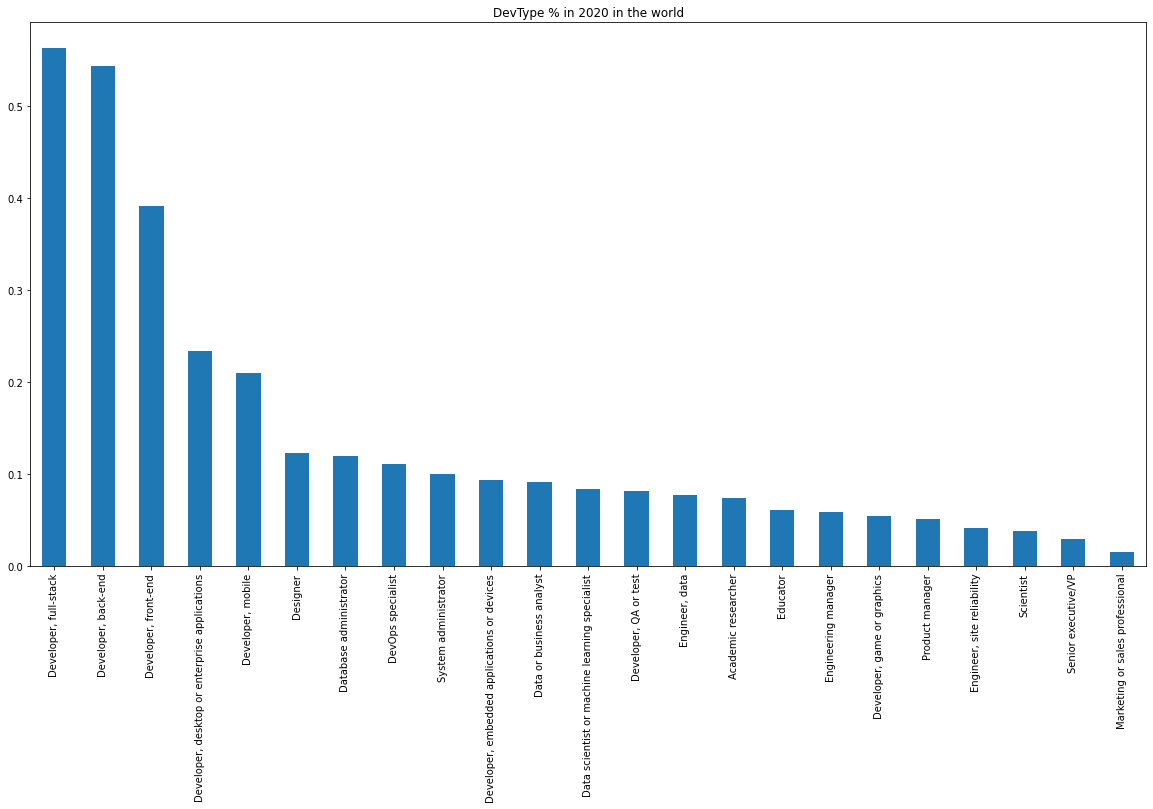

processing yearly data for year 2020 and DevType in Europe
null entries for DevType: 4938
droping nulls of the column: DevType
updated null entries for DevType: 0
                                           catval  total_catvals
0                             Developer, back-end          11425
1                           Developer, full-stack          10749
2                            Developer, front-end           6900
3   Developer, desktop or enterprise applications           4998
4                               Developer, mobile           3378
5                               DevOps specialist           2750
6                            System administrator           2347
7                          Database administrator           2232
8     Developer, embedded applications or devices           2017
9                                        Designer           1758
10                          Developer, QA or test           1578
11  Data scientist or machine learning specialist        

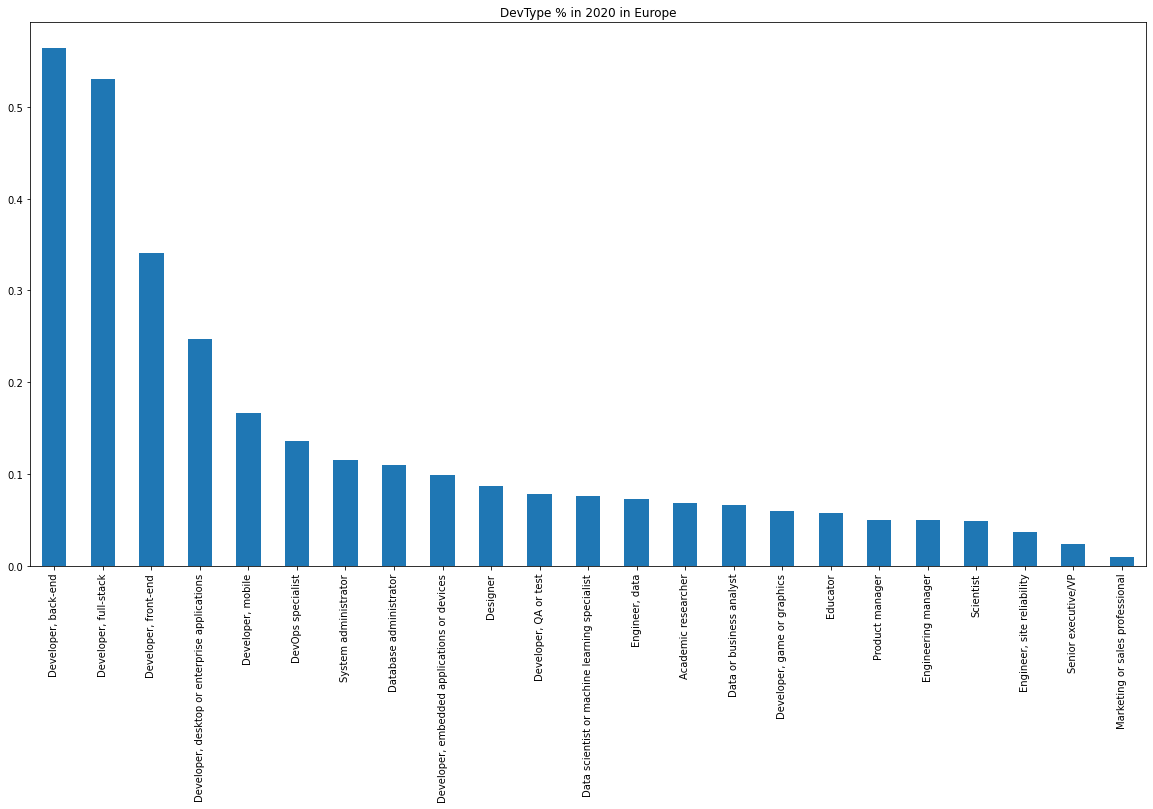

                                           catval      2020  Europe 2020  \
0                           Developer, full-stack  0.562614     0.563836   
1                             Developer, back-end  0.542928     0.530474   
2                            Developer, front-end  0.391521     0.340522   
3   Developer, desktop or enterprise applications  0.233140     0.246656   
4                               Developer, mobile  0.209709     0.166708   
5                                        Designer  0.122410     0.135715   
6                          Database administrator  0.119902     0.115827   
7                               DevOps specialist  0.110592     0.110152   
8                            System administrator  0.099461     0.099541   
9     Developer, embedded applications or devices  0.093895     0.086759   
10                       Data or business analyst  0.091731     0.077876   
11  Data scientist or machine learning specialist  0.083829     0.076395   
12          

(                                           catval  total_catvals
 0                           Developer, full-stack          16376
 1                             Developer, back-end          15803
 2                            Developer, front-end          11396
 3   Developer, desktop or enterprise applications           6786
 4                               Developer, mobile           6104
 5                                        Designer           3563
 6                          Database administrator           3490
 7                               DevOps specialist           3219
 8                            System administrator           2895
 9     Developer, embedded applications or devices           2733
 10                       Data or business analyst           2670
 11  Data scientist or machine learning specialist           2440
 12                          Developer, QA or test           2369
 13                                 Engineer, data           2252
 14       

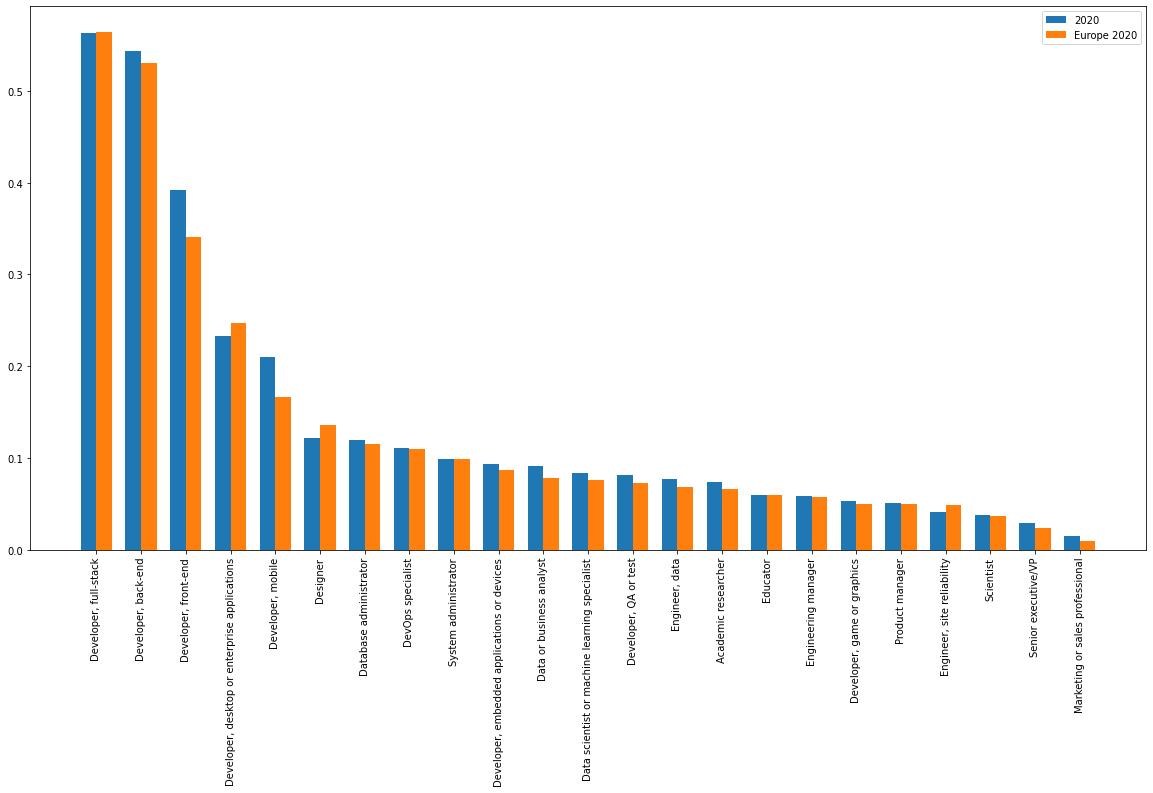

In [62]:
process_and_compare_col_global_local(df_2020, df_2020_eu, "DevType", year=2020, country="Europe")

processing yearly data for year 2020 and LanguageWorkedWith
null entries for LanguageWorkedWith: 2054
droping nulls of the column: LanguageWorkedWith
updated null entries for LanguageWorkedWith: 0
                   catval  total_catvals
0              JavaScript          19367
1                HTML/CSS          17589
2                     SQL          15669
3                  Python          11408
4                    Java          10408
5   Bash/Shell/PowerShell           8737
6                      C#           8569
7              TypeScript           7363
8                     PHP           7134
9                     C++           5546
10                      C           5145
11                     Go           2497
12                   Ruby           2220
13                 Kotlin           2012
14                  Swift           1804
15                    VBA           1650
16                      R           1457
17            Objective-C           1267
18               Assembl

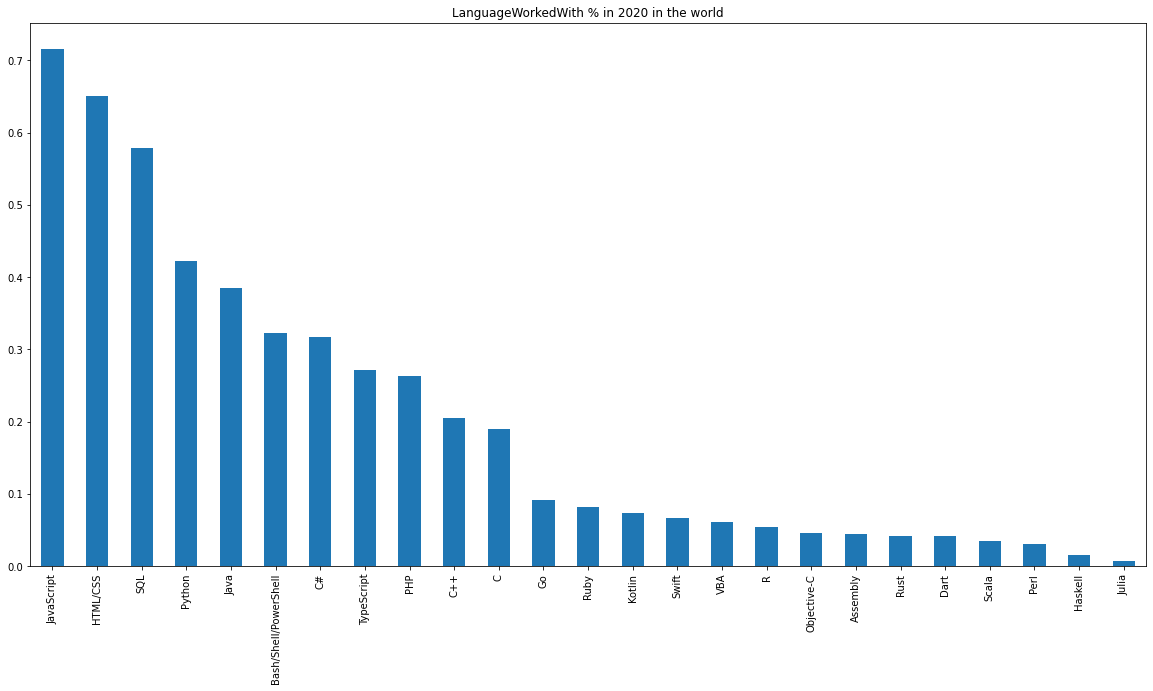

processing yearly data for year 2020 and LanguageWorkedWith in Europe
null entries for LanguageWorkedWith: 1073
droping nulls of the column: LanguageWorkedWith
updated null entries for LanguageWorkedWith: 0
                   catval  total_catvals
0              JavaScript          12847
1                HTML/CSS          11515
2                     SQL          10693
3                  Python           7865
4                    Java           7307
5   Bash/Shell/PowerShell           7239
6                      C#           6425
7              TypeScript           5495
8                     PHP           4847
9                     C++           3915
10                      C           3265
11                     Go           1773
12                 Kotlin           1627
13                   Ruby           1279
14                    VBA           1201
15                   Rust           1059
16                      R           1040
17               Assembly           1022
18            

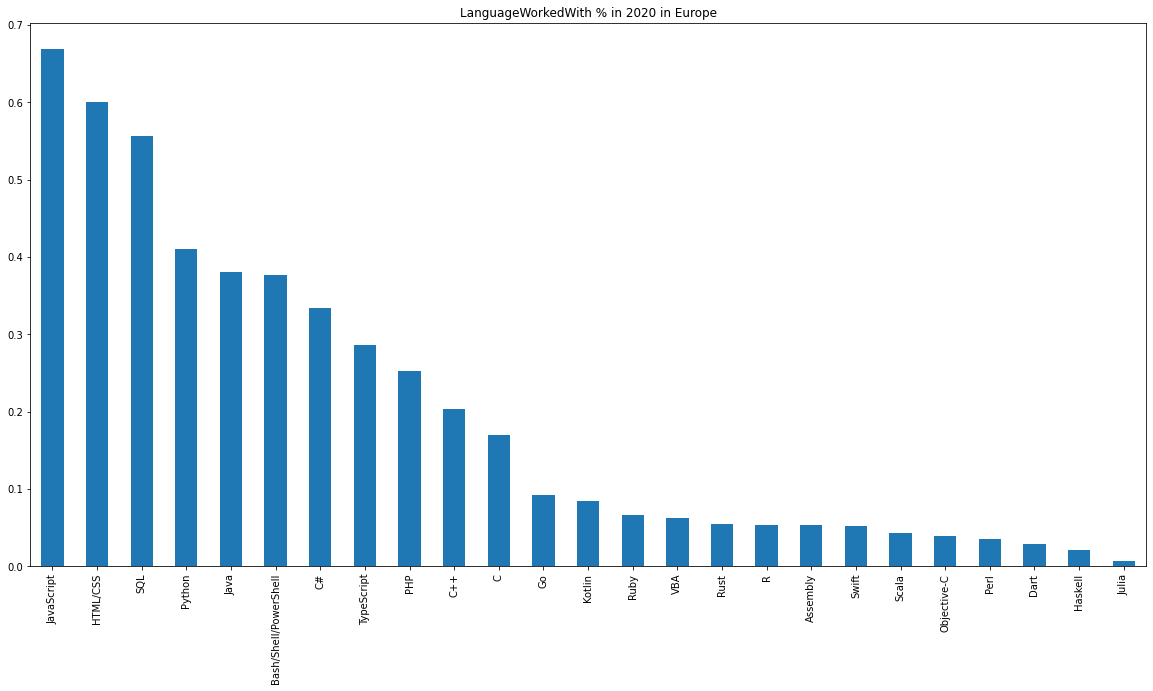

                   catval      2020  Europe 2020      diff
0              JavaScript  0.715891     0.669463  0.046428
1                HTML/CSS  0.650168     0.600052  0.050116
2                     SQL  0.579196     0.557217  0.021979
3                  Python  0.421691     0.409849  0.011842
4                    Java  0.384726     0.380771  0.003955
5   Bash/Shell/PowerShell  0.322959     0.377228 -0.054269
6                      C#  0.316749     0.334810 -0.018061
7              TypeScript  0.272169     0.286347 -0.014178
8                     PHP  0.263705     0.252579  0.011125
9                     C++  0.205005     0.204013  0.000992
10                      C  0.190182     0.170141  0.020042
11                     Go  0.092300     0.092392 -0.000092
12                   Ruby  0.082061     0.084784 -0.002723
13                 Kotlin  0.074373     0.066649  0.007723
14                  Swift  0.066684     0.062585  0.004099
15                    VBA  0.060991     0.055185  0.0058

(                   catval  total_catvals
 0              JavaScript          19367
 1                HTML/CSS          17589
 2                     SQL          15669
 3                  Python          11408
 4                    Java          10408
 5   Bash/Shell/PowerShell           8737
 6                      C#           8569
 7              TypeScript           7363
 8                     PHP           7134
 9                     C++           5546
 10                      C           5145
 11                     Go           2497
 12                   Ruby           2220
 13                 Kotlin           2012
 14                  Swift           1804
 15                    VBA           1650
 16                      R           1457
 17            Objective-C           1267
 18               Assembly           1216
 19                   Rust           1140
 20                   Dart           1138
 21                  Scala            950
 22                   Perl        

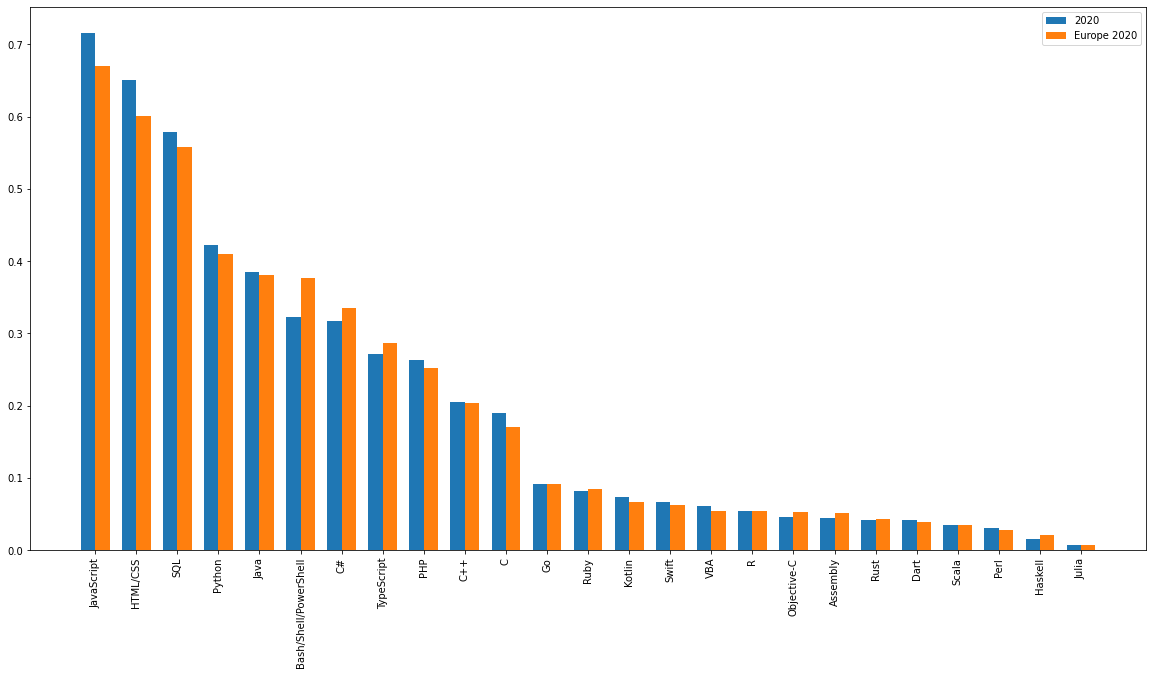

In [63]:
process_and_compare_col_global_local(df_2020, df_2020_eu, "LanguageWorkedWith", year=2020, country="Europe")

processing yearly data for year 2020 and WebframeWorkedWith
null entries for WebframeWorkedWith: 2791
droping nulls of the column: WebframeWorkedWith
updated null entries for WebframeWorkedWith: 0
           catval  total_catvals
0          jQuery           7710
1        React.js           7104
2         ASP.NET           4897
3         Angular           4872
4         Express           4785
5    ASP.NET Core           4016
6      Angular.js           3348
7          Vue.js           3050
8           Flask           2645
9          Django           2451
10         Spring           2426
11        Laravel           1964
12  Ruby on Rails           1274
13         Gatsby            819
14         Drupal            557
15        Symfony            526


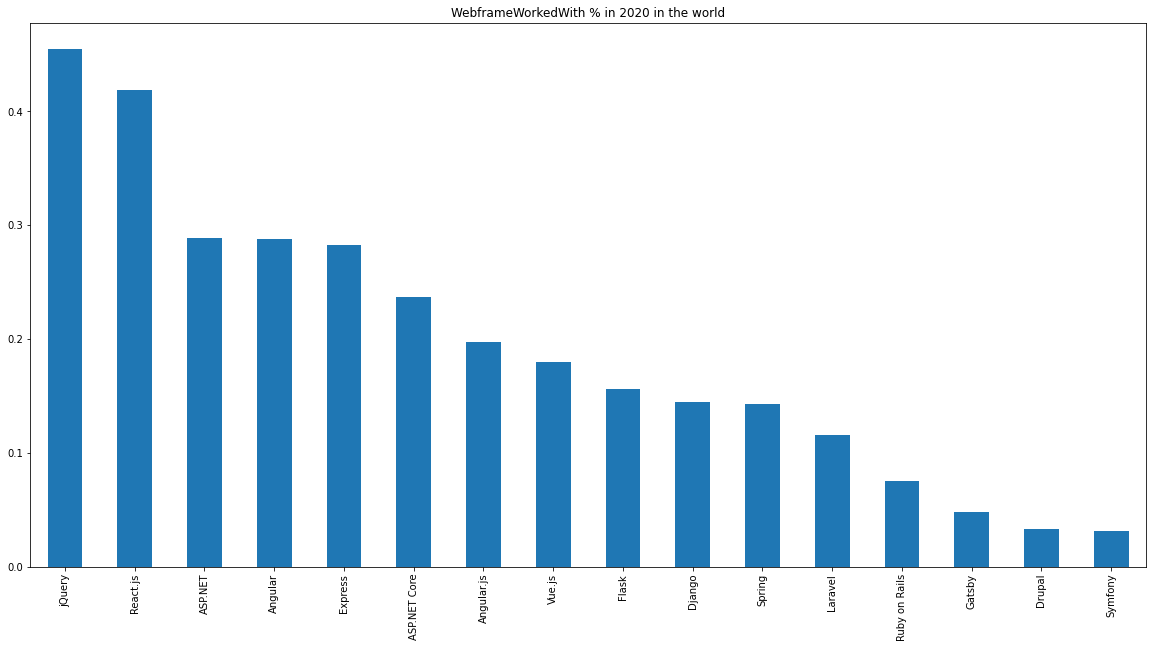

processing yearly data for year 2020 and WebframeWorkedWith in Europe
null entries for WebframeWorkedWith: 2424
droping nulls of the column: WebframeWorkedWith
updated null entries for WebframeWorkedWith: 0
           catval  total_catvals
0          jQuery           4648
1        React.js           4182
2         Angular           3158
3         ASP.NET           3124
4    ASP.NET Core           3118
5         Express           2444
6          Vue.js           2246
7      Angular.js           1857
8          Spring           1848
9           Flask           1493
10         Django           1277
11        Laravel            963
12        Symfony            708
13  Ruby on Rails            640
14         Gatsby            512
15         Drupal            356


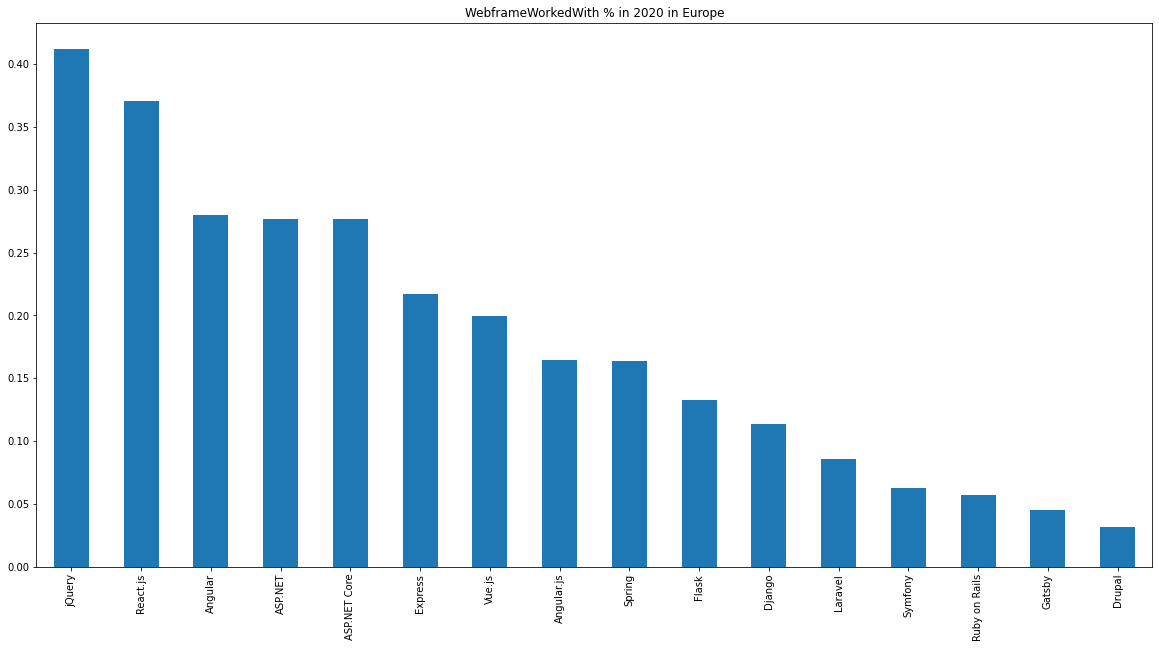

           catval      2020  Europe 2020      diff
0          jQuery  0.454894     0.412166  0.042728
1        React.js  0.419140     0.370843  0.048296
2         ASP.NET  0.288926     0.280039  0.008887
3         Angular  0.287451     0.277024  0.010427
4         Express  0.282318     0.276492  0.005826
5    ASP.NET Core  0.236946     0.216724  0.020222
6      Angular.js  0.197534     0.199166 -0.001633
7          Vue.js  0.179952     0.164671  0.015280
8           Flask  0.156056     0.163873 -0.007817
9          Django  0.144610     0.132393  0.012217
10         Spring  0.143135     0.113239  0.029896
11        Laravel  0.115877     0.085395  0.030482
12  Ruby on Rails  0.075167     0.062783  0.012384
13         Gatsby  0.048321     0.056753 -0.008431
14         Drupal  0.032863     0.045402 -0.012539
15        Symfony  0.031034     0.031569 -0.000534


(           catval  total_catvals
 0          jQuery           7710
 1        React.js           7104
 2         ASP.NET           4897
 3         Angular           4872
 4         Express           4785
 5    ASP.NET Core           4016
 6      Angular.js           3348
 7          Vue.js           3050
 8           Flask           2645
 9          Django           2451
 10         Spring           2426
 11        Laravel           1964
 12  Ruby on Rails           1274
 13         Gatsby            819
 14         Drupal            557
 15        Symfony            526,            catval  total_catvals
 0          jQuery           4648
 1        React.js           4182
 2         Angular           3158
 3         ASP.NET           3124
 4    ASP.NET Core           3118
 5         Express           2444
 6          Vue.js           2246
 7      Angular.js           1857
 8          Spring           1848
 9           Flask           1493
 10         Django           1277
 11        Lar

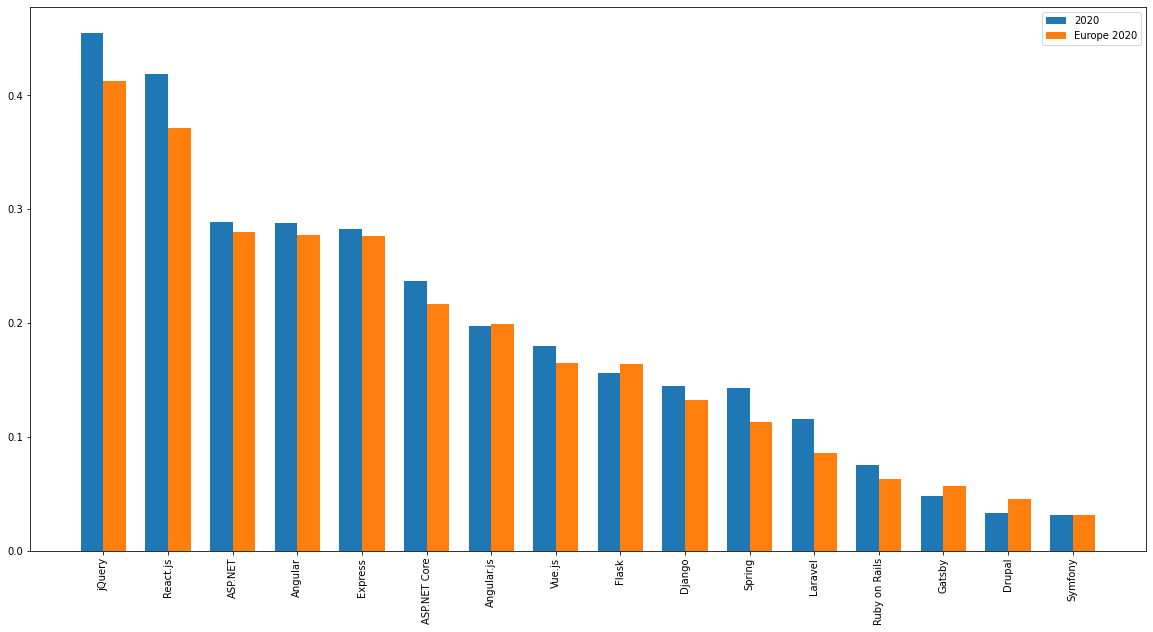

In [65]:
process_and_compare_col_global_local(df_2020, df_2020_eu, "WebframeWorkedWith", year=2020, country="Europe")

processing yearly data for year 2020 and DatabaseWorkedWith
null entries for DatabaseWorkedWith: 682
droping nulls of the column: DatabaseWorkedWith
updated null entries for DatabaseWorkedWith: 0
                  catval  total_catvals
0                  MySQL           9332
1   Microsoft SQL Server           6890
2             PostgreSQL           6351
3                MongoDB           5561
4                 SQLite           5201
5                  Redis           3795
6               Firebase           2996
7                 Oracle           2687
8                MariaDB           2585
9          Elasticsearch           2562
10              DynamoDB           1646
11             Cassandra            615
12               IBM DB2            486
13             Couchbase            380


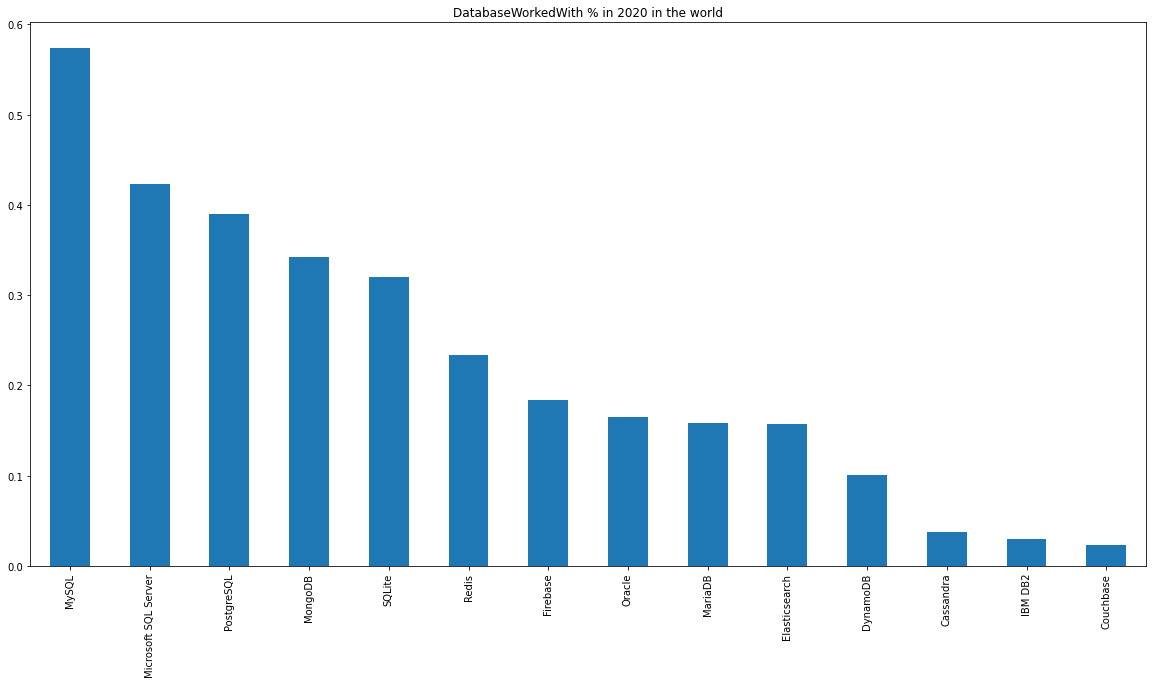

processing yearly data for year 2020 and DatabaseWorkedWith in Europe
null entries for DatabaseWorkedWith: 542
droping nulls of the column: DatabaseWorkedWith
updated null entries for DatabaseWorkedWith: 0
                  catval  total_catvals
0                  MySQL           5497
1             PostgreSQL           4554
2   Microsoft SQL Server           4421
3                 SQLite           3403
4                MongoDB           3382
5                  Redis           2664
6                MariaDB           2322
7          Elasticsearch           2227
8                 Oracle           1765
9               Firebase           1305
10              DynamoDB            866
11             Cassandra            410
12               IBM DB2            287
13             Couchbase            276


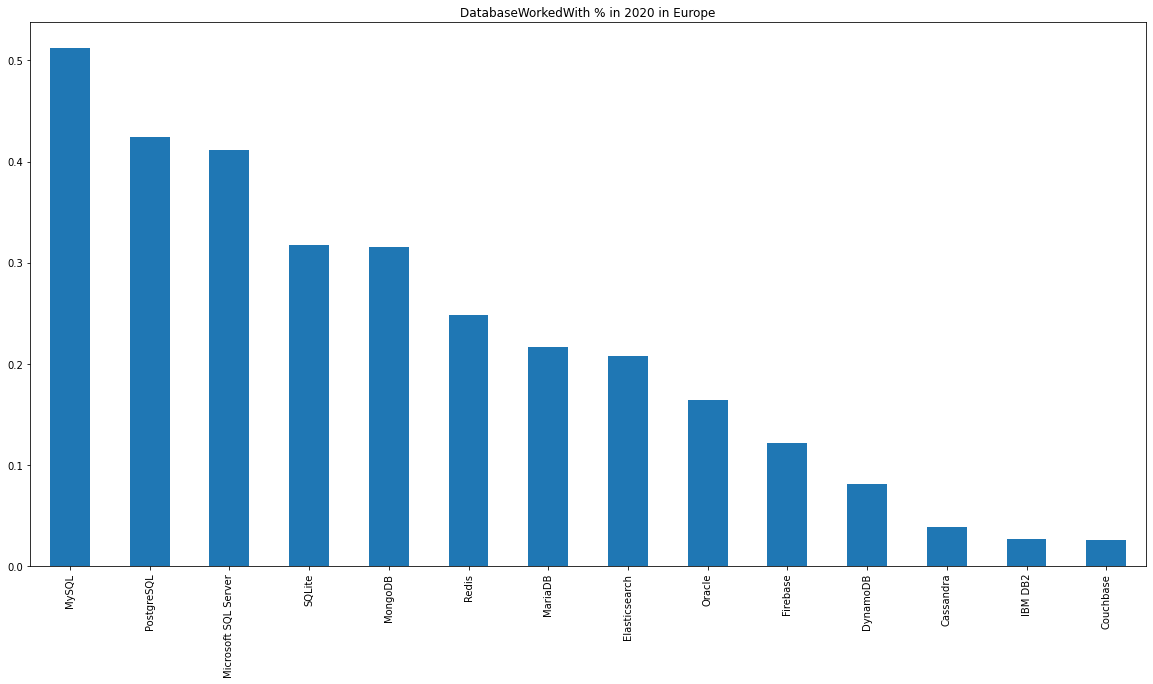

                  catval      2020  Europe 2020      diff
0                  MySQL  0.573677     0.512063  0.061613
1   Microsoft SQL Server  0.423557     0.424220 -0.000663
2             PostgreSQL  0.390422     0.411830 -0.021408
3                MongoDB  0.341858     0.317000  0.024857
4                 SQLite  0.319727     0.315044  0.004683
5                  Redis  0.233294     0.248160 -0.014866
6               Firebase  0.184177     0.216302 -0.032125
7                 Oracle  0.165181     0.207452 -0.042271
8                MariaDB  0.158911     0.164415 -0.005505
9          Elasticsearch  0.157497     0.121565  0.035932
10              DynamoDB  0.101186     0.080671  0.020516
11             Cassandra  0.037807     0.038193 -0.000386
12               IBM DB2  0.029876     0.026735  0.003141
13             Couchbase  0.023360     0.025710 -0.002350


(                  catval  total_catvals
 0                  MySQL           9332
 1   Microsoft SQL Server           6890
 2             PostgreSQL           6351
 3                MongoDB           5561
 4                 SQLite           5201
 5                  Redis           3795
 6               Firebase           2996
 7                 Oracle           2687
 8                MariaDB           2585
 9          Elasticsearch           2562
 10              DynamoDB           1646
 11             Cassandra            615
 12               IBM DB2            486
 13             Couchbase            380,
                   catval  total_catvals
 0                  MySQL           5497
 1             PostgreSQL           4554
 2   Microsoft SQL Server           4421
 3                 SQLite           3403
 4                MongoDB           3382
 5                  Redis           2664
 6                MariaDB           2322
 7          Elasticsearch           2227
 8             

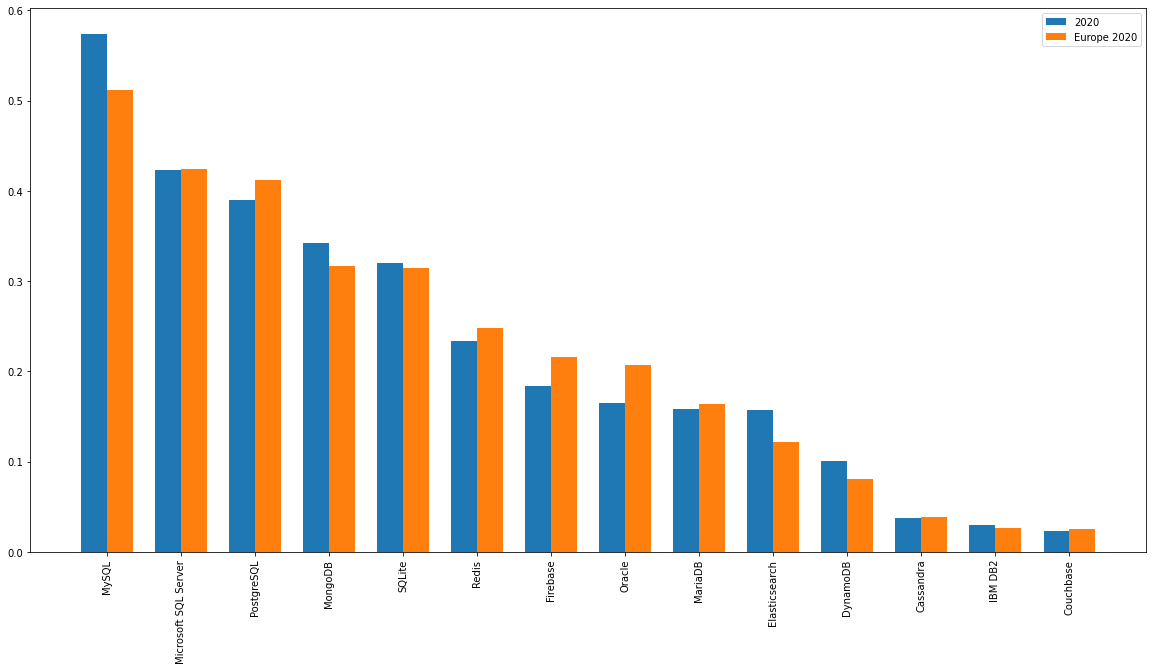

In [66]:
process_and_compare_col_global_local(df_2020, df_2020_eu, "DatabaseWorkedWith", year=2020, country="Europe")

processing yearly data for year 2020 and PlatformWorkedWith
null entries for PlatformWorkedWith: 470
droping nulls of the column: PlatformWorkedWith
updated null entries for PlatformWorkedWith: 0
                         catval  total_catvals
0                       Windows           8772
1                         Linux           8677
2                        Docker           6481
3                           AWS           6173
4                       Android           4572
5                         MacOS           4483
6               Microsoft Azure           3322
7         Google Cloud Platform           3007
8                     WordPress           2785
9                        Heroku           2630
10                 Raspberry Pi           2277
11                          iOS           2253
12                   Kubernetes           2231
13  Slack Apps and Integrations           1694
14                      Arduino           1549
15          IBM Cloud or Watson            374


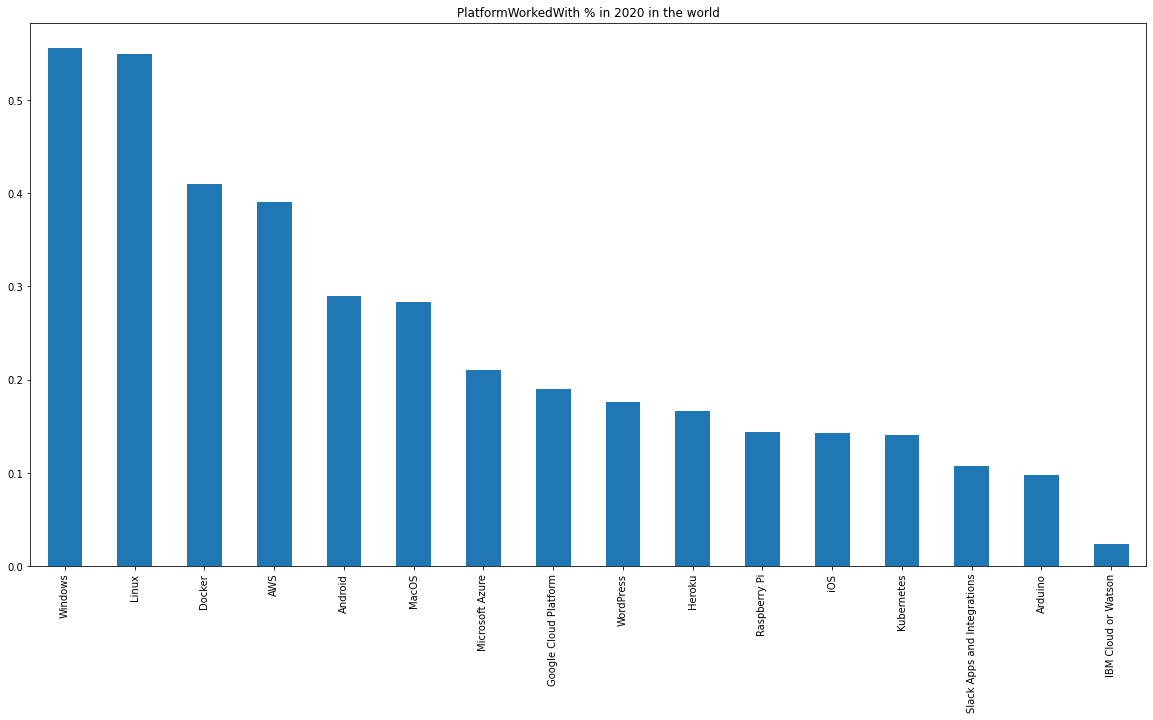

processing yearly data for year 2020 and PlatformWorkedWith in Europe
null entries for PlatformWorkedWith: 223
droping nulls of the column: PlatformWorkedWith
updated null entries for PlatformWorkedWith: 0
                         catval  total_catvals
0                         Linux           6109
1                       Windows           5986
2                        Docker           5431
3                           AWS           3217
4                         MacOS           2757
5                       Android           2712
6               Microsoft Azure           2468
7                  Raspberry Pi           2000
8                    Kubernetes           1810
9                     WordPress           1690
10        Google Cloud Platform           1671
11                          iOS           1334
12                       Heroku           1246
13                      Arduino           1098
14  Slack Apps and Integrations            965
15          IBM Cloud or Watson           

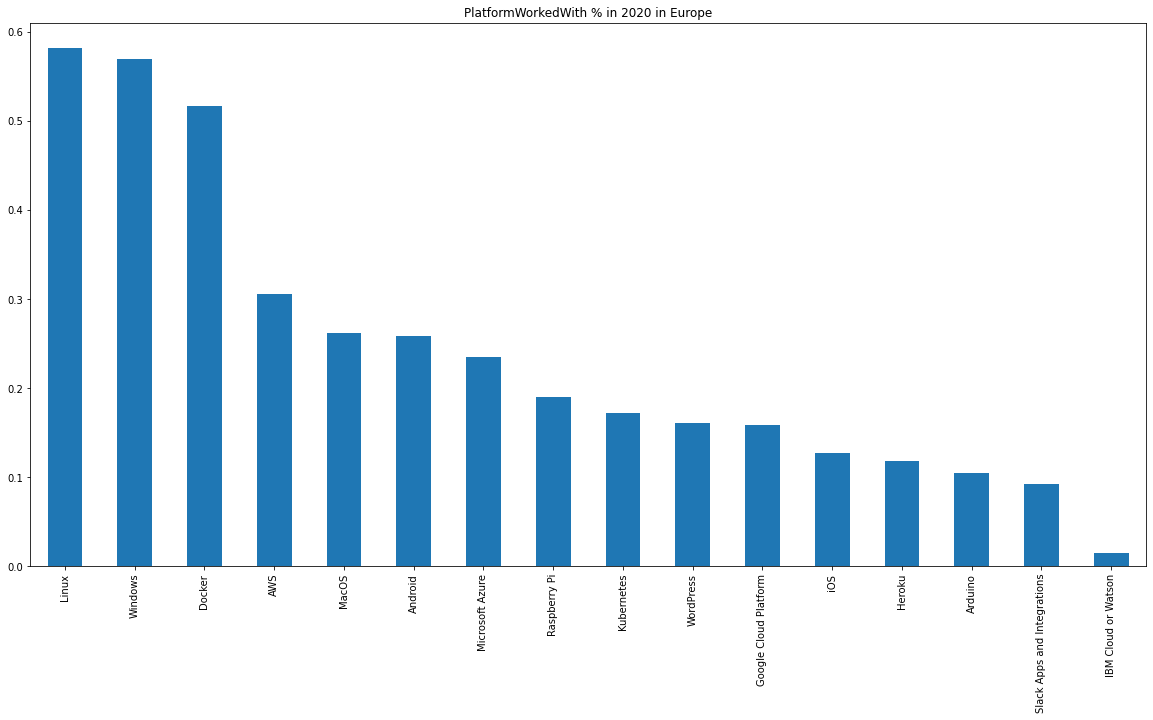

                         catval      2020  Europe 2020      diff
0                       Windows  0.555295     0.581145 -0.025850
1                         Linux  0.549282     0.569444 -0.020163
2                        Docker  0.410268     0.516648 -0.106380
3                           AWS  0.390770     0.306031  0.084739
4                       Android  0.289422     0.262272  0.027150
5                         MacOS  0.283788     0.257991  0.025797
6               Microsoft Azure  0.210293     0.234779 -0.024486
7         Google Cloud Platform  0.190353     0.190259  0.000094
8                     WordPress  0.176299     0.172184  0.004115
9                        Heroku  0.166487     0.160769  0.005719
10                 Raspberry Pi  0.144141     0.158961 -0.014820
11                          iOS  0.142622     0.126903  0.015719
12                   Kubernetes  0.141229     0.118531  0.022698
13  Slack Apps and Integrations  0.107236     0.104452  0.002783
14                      A

(                         catval  total_catvals
 0                       Windows           8772
 1                         Linux           8677
 2                        Docker           6481
 3                           AWS           6173
 4                       Android           4572
 5                         MacOS           4483
 6               Microsoft Azure           3322
 7         Google Cloud Platform           3007
 8                     WordPress           2785
 9                        Heroku           2630
 10                 Raspberry Pi           2277
 11                          iOS           2253
 12                   Kubernetes           2231
 13  Slack Apps and Integrations           1694
 14                      Arduino           1549
 15          IBM Cloud or Watson            374,
                          catval  total_catvals
 0                         Linux           6109
 1                       Windows           5986
 2                        Docker       

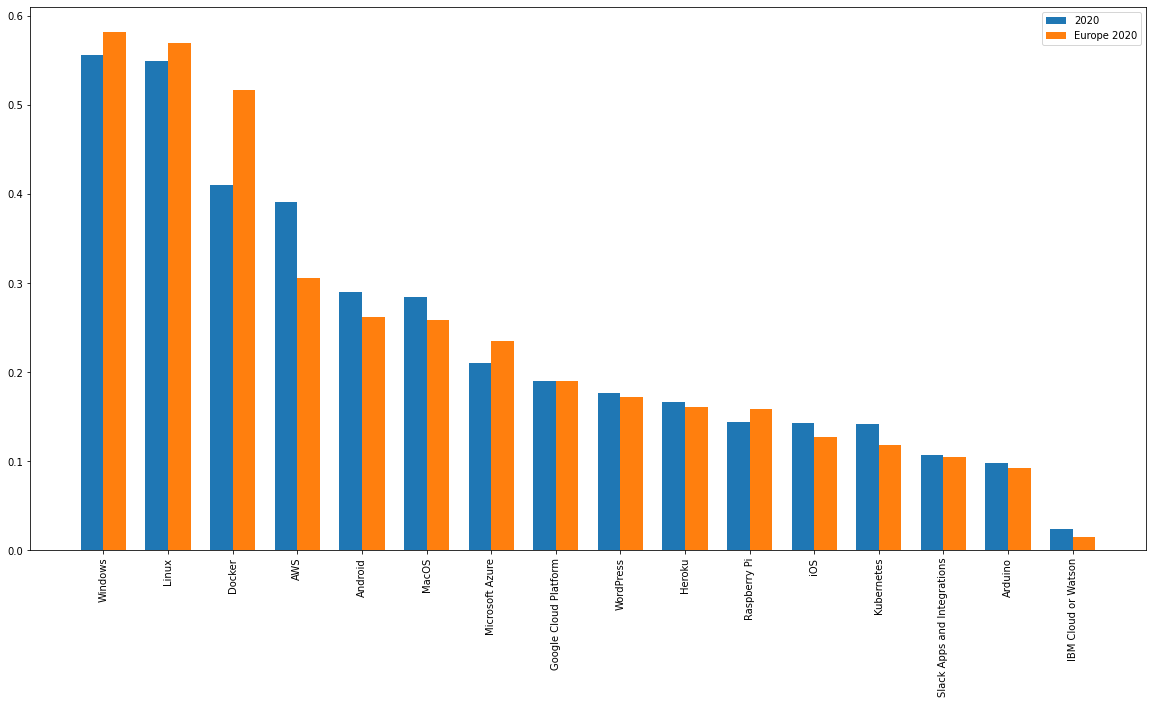

In [67]:
process_and_compare_col_global_local(df_2020, df_2020_eu, "PlatformWorkedWith", year=2020, country="Europe")

processing yearly data for year 2020 and MiscTechWorkedWith
null entries for MiscTechWorkedWith: 7313
droping nulls of the column: MiscTechWorkedWith
updated null entries for MiscTechWorkedWith: 0
           catval  total_catvals
0         Node.js          10654
1            .NET           6943
2       .NET Core           5196
3          Pandas           3060
4    React Native           2671
5      TensorFlow           2058
6        Unity 3D           1626
7         Flutter           1507
8         Cordova           1310
9         Ansible           1298
10       Teraform           1269
11        Xamarin           1154
12   Apache Spark           1118
13          Keras           1068
14         Hadoop           1000
15  Torch/PyTorch            836
16  Unreal Engine            469
17         Puppet            459
18           Chef            430


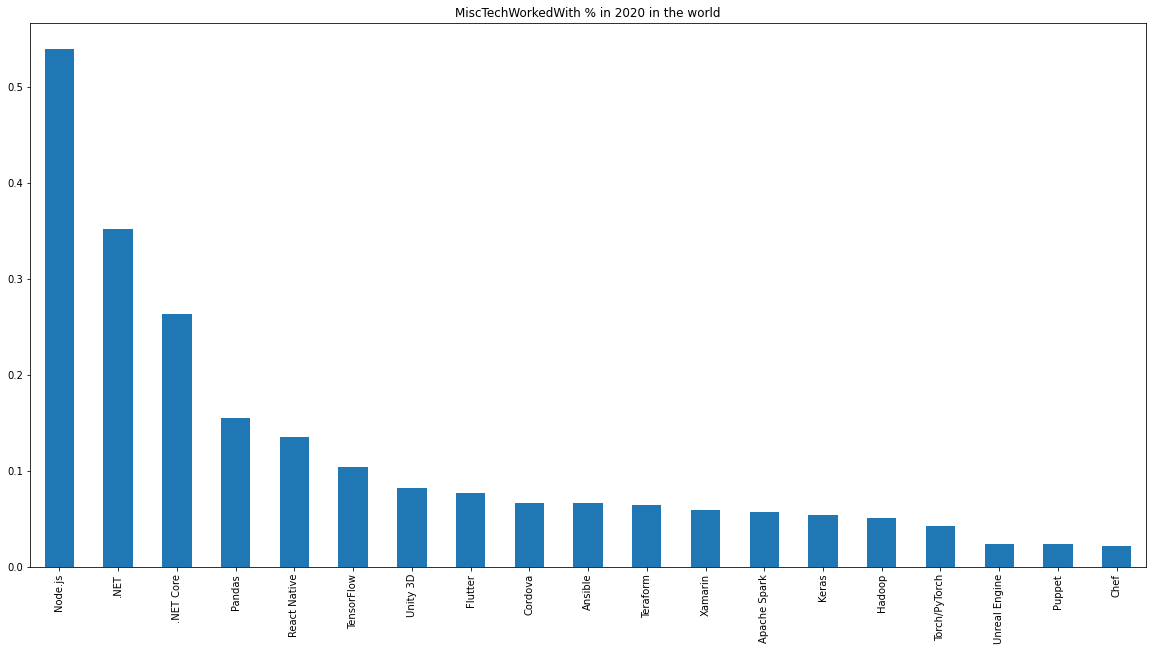

processing yearly data for year 2020 and MiscTechWorkedWith in Europe
null entries for MiscTechWorkedWith: 5489
droping nulls of the column: MiscTechWorkedWith
updated null entries for MiscTechWorkedWith: 0
           catval  total_catvals
0         Node.js           6722
1            .NET           5097
2       .NET Core           4112
3          Pandas           1853
4         Ansible           1408
5        Unity 3D           1343
6      TensorFlow           1336
7    React Native           1272
8        Teraform           1066
9         Xamarin            832
10        Cordova            818
11          Keras            745
12        Flutter            712
13   Apache Spark            677
14         Hadoop            550
15  Torch/PyTorch            504
16  Unreal Engine            397
17         Puppet            384
18           Chef            238


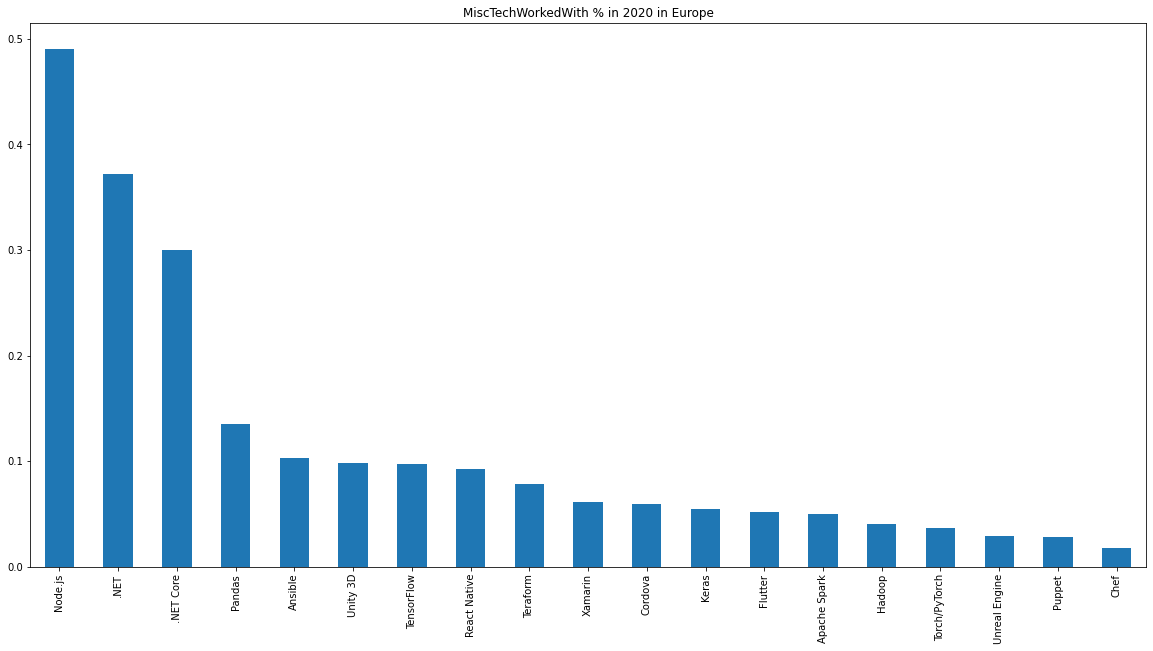

           catval      2020  Europe 2020      diff
0         Node.js  0.539716     0.490621  0.049095
1            .NET  0.351722     0.372017 -0.020294
2       .NET Core  0.263222     0.300124 -0.036902
3          Pandas  0.155015     0.135246  0.019770
4    React Native  0.135309     0.102766  0.032543
5      TensorFlow  0.104255     0.098022  0.006233
6        Unity 3D  0.082371     0.097511 -0.015140
7         Flutter  0.076342     0.092840 -0.016497
8         Cordova  0.066363     0.077805 -0.011442
9         Ansible  0.065755     0.060725  0.005029
10       Teraform  0.064286     0.059704  0.004582
11        Xamarin  0.058460     0.054376  0.004084
12   Apache Spark  0.056636     0.051967  0.004669
13          Keras  0.054103     0.049412  0.004691
14         Hadoop  0.050659     0.040143  0.010516
15  Torch/PyTorch  0.042351     0.036786  0.005565
16  Unreal Engine  0.023759     0.028976 -0.005217
17         Puppet  0.023252     0.028027 -0.004775
18           Chef  0.021783    

(           catval  total_catvals
 0         Node.js          10654
 1            .NET           6943
 2       .NET Core           5196
 3          Pandas           3060
 4    React Native           2671
 5      TensorFlow           2058
 6        Unity 3D           1626
 7         Flutter           1507
 8         Cordova           1310
 9         Ansible           1298
 10       Teraform           1269
 11        Xamarin           1154
 12   Apache Spark           1118
 13          Keras           1068
 14         Hadoop           1000
 15  Torch/PyTorch            836
 16  Unreal Engine            469
 17         Puppet            459
 18           Chef            430,            catval  total_catvals
 0         Node.js           6722
 1            .NET           5097
 2       .NET Core           4112
 3          Pandas           1853
 4         Ansible           1408
 5        Unity 3D           1343
 6      TensorFlow           1336
 7    React Native           1272
 8        Tera

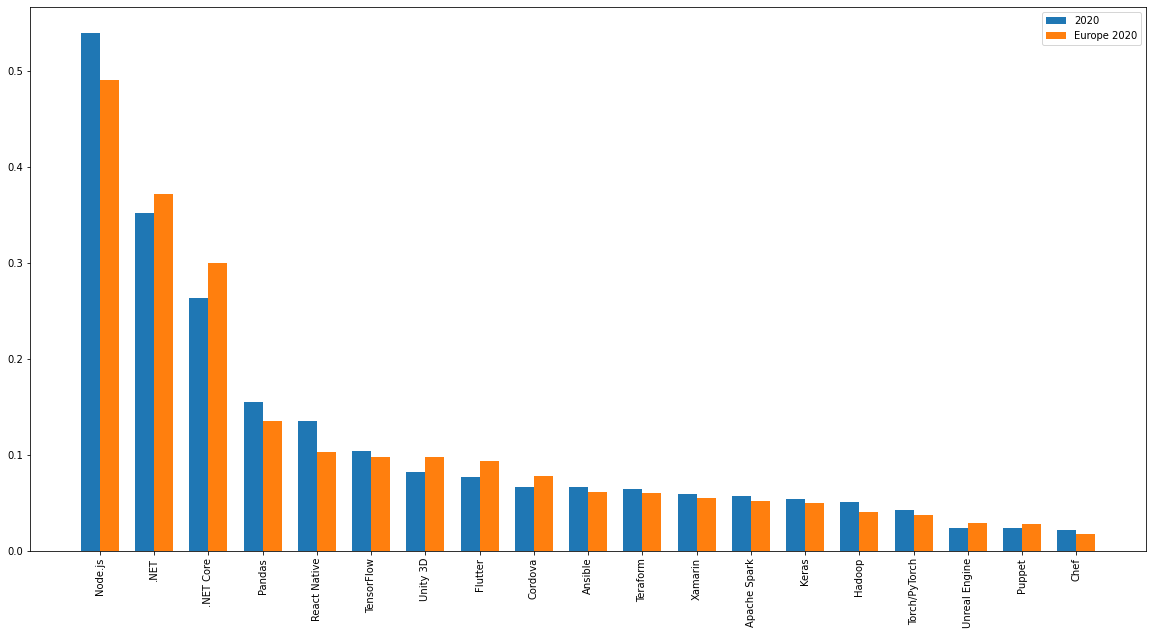

In [64]:
process_and_compare_col_global_local(df_2020, df_2020_eu, "MiscTechWorkedWith", year=2020, country="Europe")

processing yearly data for year 2020 and NEWCollabToolsWorkedWith
null entries for NEWCollabToolsWorkedWith: 403
droping nulls of the column: NEWCollabToolsWorkedWith
updated null entries for NEWCollabToolsWorkedWith: 0
                            catval  total_catvals
0                           Github          13292
1                            Slack           9171
2                             Jira           7863
3   Google Suite (Docs, Meet, etc)           7306
4                           Gitlab           5738
5                           Trello           5410
6                       Confluence           5062
7                  Microsoft Teams           4524
8                  Microsoft Azure           3230
9         Stack Overflow for Teams           1129
10              Facebook Workplace            558


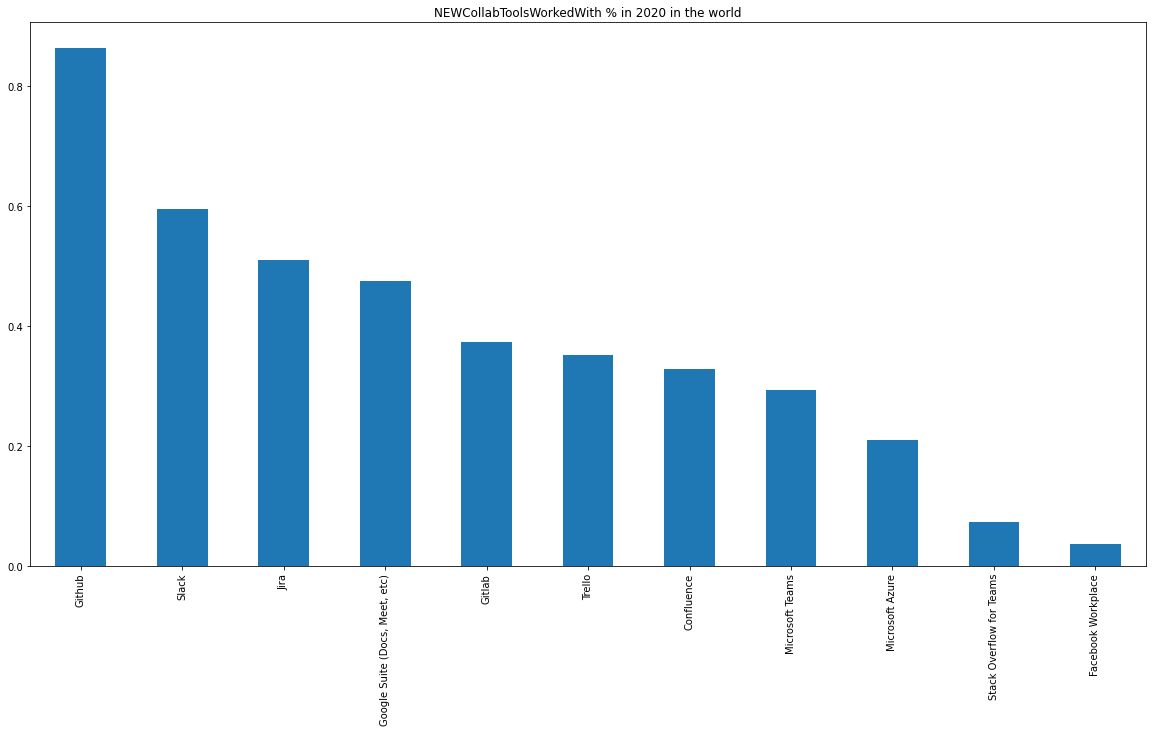

processing yearly data for year 2020 and NEWCollabToolsWorkedWith in Europe
null entries for NEWCollabToolsWorkedWith: 224
droping nulls of the column: NEWCollabToolsWorkedWith
updated null entries for NEWCollabToolsWorkedWith: 0
                            catval  total_catvals
0                           Github           8506
1                            Slack           6187
2                             Jira           6064
3                           Gitlab           4697
4                       Confluence           4407
5   Google Suite (Docs, Meet, etc)           4315
6                           Trello           3664
7                  Microsoft Teams           3617
8                  Microsoft Azure           2440
9         Stack Overflow for Teams            346
10              Facebook Workplace            285


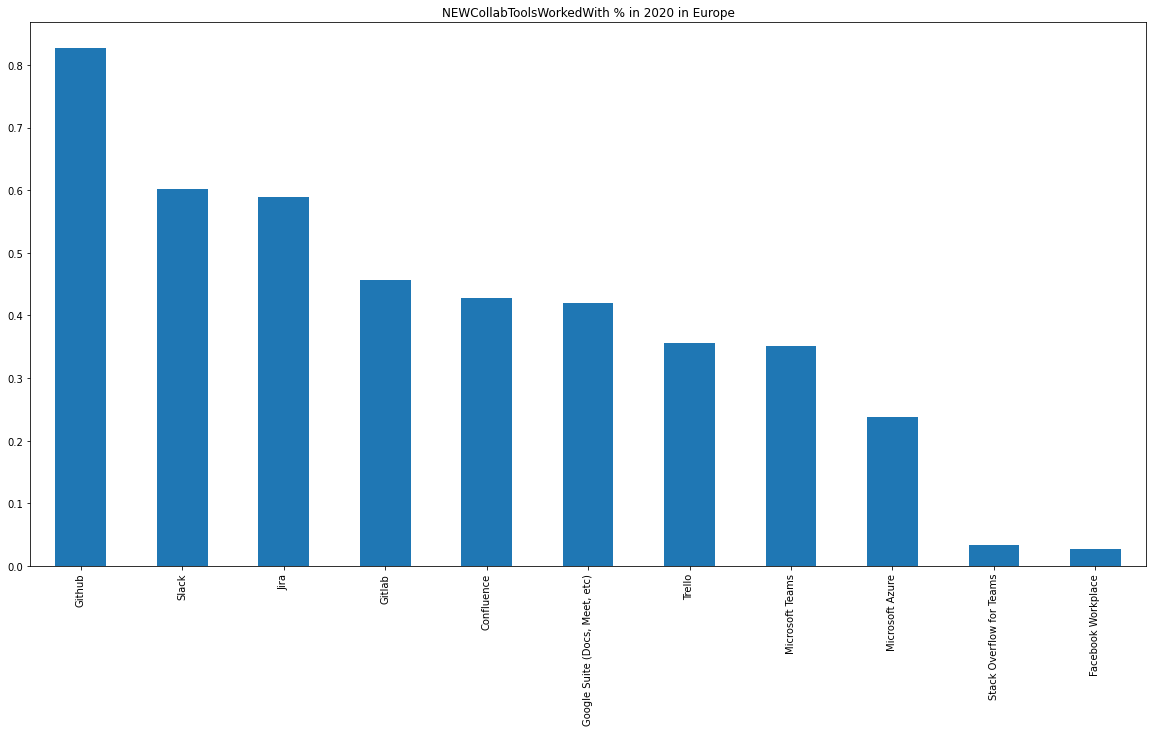

                            catval      2020  Europe 2020      diff
0                           Github  0.863453     0.826788  0.036665
1                            Slack  0.595752     0.601380 -0.005629
2                             Jira  0.510783     0.589425 -0.078641
3   Google Suite (Docs, Meet, etc)  0.474600     0.456551  0.018049
4                           Gitlab  0.372743     0.428363 -0.055621
5                           Trello  0.351436     0.419421 -0.067985
6                       Confluence  0.328829     0.356143 -0.027314
7                  Microsoft Teams  0.293881     0.351575 -0.057694
8                  Microsoft Azure  0.209822     0.237170 -0.027348
9         Stack Overflow for Teams  0.073340     0.033631  0.039709
10              Facebook Workplace  0.036248     0.027702  0.008546


(                            catval  total_catvals
 0                           Github          13292
 1                            Slack           9171
 2                             Jira           7863
 3   Google Suite (Docs, Meet, etc)           7306
 4                           Gitlab           5738
 5                           Trello           5410
 6                       Confluence           5062
 7                  Microsoft Teams           4524
 8                  Microsoft Azure           3230
 9         Stack Overflow for Teams           1129
 10              Facebook Workplace            558,
                             catval  total_catvals
 0                           Github           8506
 1                            Slack           6187
 2                             Jira           6064
 3                           Gitlab           4697
 4                       Confluence           4407
 5   Google Suite (Docs, Meet, etc)           4315
 6                           T

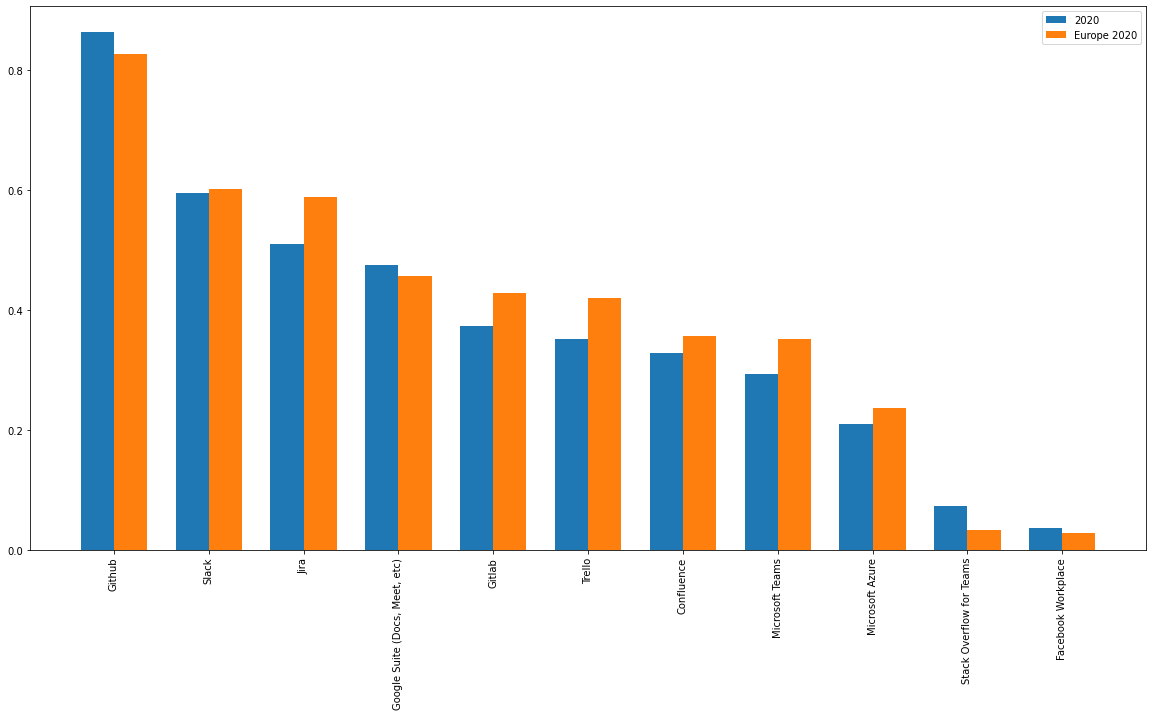

In [68]:
process_and_compare_col_global_local(df_2020, df_2020_eu, "NEWCollabToolsWorkedWith", year=2020, country="Europe")

# Normalize data over past 4 years

In [ ]:
#     'Respondent', //kept 2018, 2019, 2020
#     'Professional', // DevType partially 2018, 2019, 2020
#     'ProgramHobby', // Hobby partially 2018, Hobbyist 2019, 2020
#     'Country', //kept 2018, 2019, 2020
#     'EmploymentStatus', //Employment 2018, 2019, 2020
#     'FormalEducation', //kept 2018, EdLevel 2019, 2020
#     'MajorUndergrad', //UndergradMajor overlap 2018, 2019, 2020
#     'YearsProgram', // YearsCoding somehow 2018, YearsCode 2019, 2020
#     'YearsCodedJob', // YearsCodingProf 2018, YearsCodePro 2019, 2020
#     'YearsCodedJobPast', // YearsCodingProf 2018, YearsCodePro 2019, 2020
#     'DeveloperType', // DevType 2018, 2019, 2020
#     'JobSatisfaction', // kept 2018, JobSat 2019, 2020
#     'JobSeekingStatus', // JobSearchStatus 2018, JobSeek 2019, 2020
#     'AssessJobIndustry', // AssessJob1 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobDept', // AssessJob3 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobTech', // AssessJob4 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobCompensation', // AssessJob5 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobOffice', // AssessJob6 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobRemote', // AssessJob7 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobProfDevel', // AssessJob8 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobDiversity', // AssessJob9 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'AssessJobProduct', // AssessJob10 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'ImportantBenefits', // AssessBenefits1 - 2018, JobFactors 2019 partially - top 3, JobFactors 2020
#     'Currency', // kept 2018, CurrencySymbol and CurrencyDesc 2019, same 2020
#     'HaveWorkedLanguage', // LanguageWorkedWith 2018, 2019, 2020
#     'WantWorkLanguage', // LanguageDesireNextYear 2018, 2019, 2020
#     'HaveWorkedFramework', // FrameworkWorkedWith 2018, WebFrameWorkedWith 2019, 2020
#     'WantWorkFramework', // FrameworkDesireNextYear 2018, WebFrameDesireNextYear 2019, 2020
#     'HaveWorkedDatabase', // DatabaseWorkedWith 2018, 2019, 2020
#     'WantWorkDatabase', // DatabaseDesireNextYear 2018, 2019, 2020
#     'HaveWorkedPlatform', // PlatformWorkedWith 2018, 2019, 2020
#     'WantWorkPlatform', // PlatformDesireNextYear 2018, 2019, 2020
#     'StackOverflowCommunity', // StackOverflowConsiderMember 2018, SOComm 2019, 2020
#     'Gender', // kept 2018, 2019, 2020
#     'Race', // RaceEthnicity 2018, Ethnicity 2019, 2020
#     'SurveyLong', // SurveyTooLong partially 2018, SurveyLength 2019, 2020
#     'Salary', // kept 2018, CompTotal, CompFreq and/or ConvertedComp 2019, 2020
#     'Year' // kept 2018, 2019, 2020

# df_final = pd.DataFrame(columns=[])
# df_final.shape

In [ ]:
print(df_2017_es.shape)
# only keep entries that have a salary as that is what we want to track
df_2017_es_reduced = df_2017_es.dropna(subset=["Salary"], axis=0)
df_2017_es_reduced.shape

In [ ]:
# check available currencies and normalize the data
df_2017_es_reduced.Currency.value_counts()

In [ ]:
df_2017_es_reduced.isnull()['Currency'].mean()

In [ ]:
df_2017_es['Salary_EUR'] = None

# convert non euro salaries to euros. conversion rates USD -> EURO 0,84 ; GBP -> EURO 1,08 for 13.09.2020
def convert_salary(row):
    # print(f"currency:|{row['Currency']}|")
    if row['Currency'] == "Euros (€)":
        return row["Salary"]
    elif row['Currency'] == "U.S. dollars ($)":
        return row["Salary"] * 0.84
    elif row['Currency'] == "British pounds sterling (£)":
        return row["Salary"] * 1.08
    else: # unknown currency
        return None

df_2017_es_reduced['final_Salary_EUR'] = df_2017_es_reduced.apply(lambda row: convert_salary(row), axis=1)

In [ ]:
df_2017_es_reduced.describe()

In [ ]:
df_2017_es_reduced['Professional'].value_counts()

In [ ]:
# it is safe to drop the Professional column as it has only one value for this subset of data
df_2017_es_reduced = df_2017_es_reduced.drop('Professional', axis=1)

In [ ]:
df_merged_es = df_2017_es[[]].copy()

# Spain - Case Study

## 1. Evolution of salary over past 5 years in Spain

## 2. Salary predictions for the 2 years in Spain

## 3. Development language impact on salary

## 4. What kind of development work is being done in Spain

## 5. Important development centers in Spain